#**Job Performance Analysis**
# Project 1


# **Introduction**

A study is being conducted to evaluate the job performance of employees in a technology sector company, based on the data collected from the management carried out during the last year (2022). The objective is to analyze the individual performance of each employee objectively and optimize the company's decision-making regarding personnel to enhance productivity and maximize expected results.

# **Objectives**



The main objective of this project is to conduct a study on the job performance of employees in a technology sector company, through the analysis of data associated with the management carried out during the year 2022. The goal is to optimize decision-making regarding the company's personnel.

The specific objectives of this project are:

2.1. Analysis of the impact of factors on performance

2.2. Proper management of human resources

2.3. Optimization of personnel costs


# **Methodology**

To carry out the performance analysis, the KDD (Knowledge Discovery in Databases) methodology will be implemented.

Perform the selection, preprocessing, and modeling of data using the libraries, functions, and methods seen.

Apply performance evaluation to the personnel and conduct an analysis of the results.

Generate data visualizations based on the techniques and knowledge learned to explain the conclusions obtained.











# **Data Sources**


The data to be used corresponds to the records of activities carried out by employees during 2022. Additionally, other datasets were used to complement the initial dataset and add value to the analysis. These additional datasets contain descriptive data of the employees and information about the employees' involvement in the projects they worked on.


# **Data Analysis**

# 1. Import Libraries and Modules


Initially I imported the libraries and modules required to work with the data.

Additionally, the FeatureSelector class is imported, a file that is attached to the practice. FeatureSelector allows you to analyze missing values, evaluate the importance of variables, identify the value of correlations, etc.

In [108]:
# carga de datos
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.tools as tls
from plotly.offline import init_notebook_mode, iplot, plot
import plotly.graph_objs as go
import seaborn as sns
import pandas as pd
import io
from google.colab import files

# manipulación y visualización
import matplotlib.pyplot as plt
import numpy as np
import itertools
import seaborn as sns
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np

# machine learning
from Feature_selector import FeatureSelector # Nos va a ayudar a realizar el número de missings, correlaciones, importancia de las variables, etc.

# machine learning

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

#Import models from scikit learn module:
from sklearn import ensemble
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score


from sklearn.utils import resample,shuffle#

# 2. Load Data

We load the data into the environment as a dataframe to be able to work with it with the functionalities that Google Colab allows us.

In [109]:
def upload_files ():
  uploaded = files.upload()
  for fn in uploaded.keys():
    print('User uploaded file "{name}" with length {length} bytes'.format(
        name=fn, length=len(uploaded[fn])))
    df = pd.read_csv(io.StringIO(uploaded[fn].decode('utf-8')))
    return df

In [110]:
Data = upload_files()
Data.head()

Saving 1. Employees.csv to 1. Employees (1).csv
User uploaded file "1. Employees (1).csv" with length 190838 bytes


Id_employee First_name Last_name        Full_name Genre   Birthdate  Age  \
0         1001       LIAM     SMITH       LIAM SMITH     M  17/03/1978   45   
1         1002       NOAH   JOHNSON     NOAH JOHNSON     M  04/07/1998   25   
2         1003     OLIVER  WILLIAMS  OLIVER WILLIAMS     M  30/05/1978   45   
3         1004     ELIJAH     BROWN     ELIJAH BROWN     M  06/09/1985   38   
4         1005    WILLIAM     JONES    WILLIAM JONES     M  21/02/1977   46   

               Location  Civil_status    Phone                       Email  
0  Basilea, Switzerland              S  9505405       LIAM SMITH@gmail.com  
1   Zurich, Switzerland              C  9734761     NOAH JOHNSON@gmail.com  
2          Lyon, France              S  9593611  OLIVER WILLIAMS@gmail.com  
3          Lyon, France              C  9466722     ELIJAH BROWN@gmail.com  
4       Touluse, France              C  9621580    WILLIAM JONES@gmail.com

In [111]:
Data['First_name'] = Data['First_name'].astype(str)
Data['Last_name'] = Data['Last_name'].astype(str)
Data['Full_name'] = Data.apply(lambda row: row['First_name'] + " " + row['Last_name'], axis=1)

In [112]:
column_names = Data.columns
new_order = column_names[:2].tolist() + column_names[-1:].tolist() + column_names[2:-1].tolist()
Data = Data[new_order]
print(Data)

      Id_employee First_name                        Email   Last_name  \
0            1001       LIAM         LIAM SMITH@gmail.com       SMITH   
1            1002       NOAH       NOAH JOHNSON@gmail.com     JOHNSON   
2            1003     OLIVER    OLIVER WILLIAMS@gmail.com    WILLIAMS   
3            1004     ELIJAH       ELIJAH BROWN@gmail.com       BROWN   
4            1005    WILLIAM      WILLIAM JONES@gmail.com       JONES   
...           ...        ...                          ...         ...   
1838         2839   MADALYNN     MADALYNN CERNA@gmail.com       CERNA   
1839         2840     MELANI  MELANI VIRAMONTES@gmail.com  VIRAMONTES   
1840         2841    LAYLANI   LAYLANI GALDAMEZ@gmail.com    GALDAMEZ   
1841         2842   MAZIKEEN    MAZIKEEN OLIVER@gmail.com      OLIVER   
1842         2843      BELLE     BELLE ANDERSON@gmail.com    ANDERSON   

              Full_name Genre   Birthdate  Age              Location  \
0            LIAM SMITH     M  17/03/1978   45  Bas

I query the variable formats using info(). It is observed that the majority of the attributes are of numerical type.

At this point I review the attributes of the loaded table,


In [113]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1843 entries, 0 to 1842
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Id_employee     1843 non-null   int64 
 1   First_name      1843 non-null   object
 2   Email           1843 non-null   object
 3   Last_name       1843 non-null   object
 4   Full_name       1843 non-null   object
 5   Genre           1843 non-null   object
 6   Birthdate       1843 non-null   object
 7   Age             1843 non-null   int64 
 8   Location        1843 non-null   object
 9    Civil_status   1843 non-null   object
 10   Phone          1843 non-null   int64 
dtypes: int64(3), object(8)
memory usage: 158.5+ KB


In [114]:
print(Data.shape)

(1843, 11)


In [115]:
print(Data.dtypes)

Id_employee        int64
First_name        object
Email             object
Last_name         object
Full_name         object
Genre             object
Birthdate         object
Age                int64
Location          object
 Civil_status     object
 Phone             int64
dtype: object


In [116]:
Data.columns

Index(['Id_employee', 'First_name', 'Email', 'Last_name', 'Full_name', 'Genre',
       'Birthdate', 'Age', 'Location', ' Civil_status ', ' Phone '],
      dtype='object')

In [117]:
df_numeric = Data.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
print(numeric_cols)

['Id_employee' 'Age' ' Phone ']


In [118]:
df_non_numeric = Data.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values
print(non_numeric_cols)

['First_name' 'Email' 'Last_name' 'Full_name' 'Genre' 'Birthdate'
 'Location' ' Civil_status ']


In [119]:
Data.duplicated().value_counts()

False    1843
dtype: int64

In [120]:
Data.isnull().sum()

Id_employee       0
First_name        0
Email             0
Last_name         0
Full_name         0
Genre             0
Birthdate         0
Age               0
Location          0
 Civil_status     0
 Phone            0
dtype: int64

Another method to analyze null values ​​is through a heatmap, in which the columns that present missing values ​​are displayed in different colors.

<Axes: >

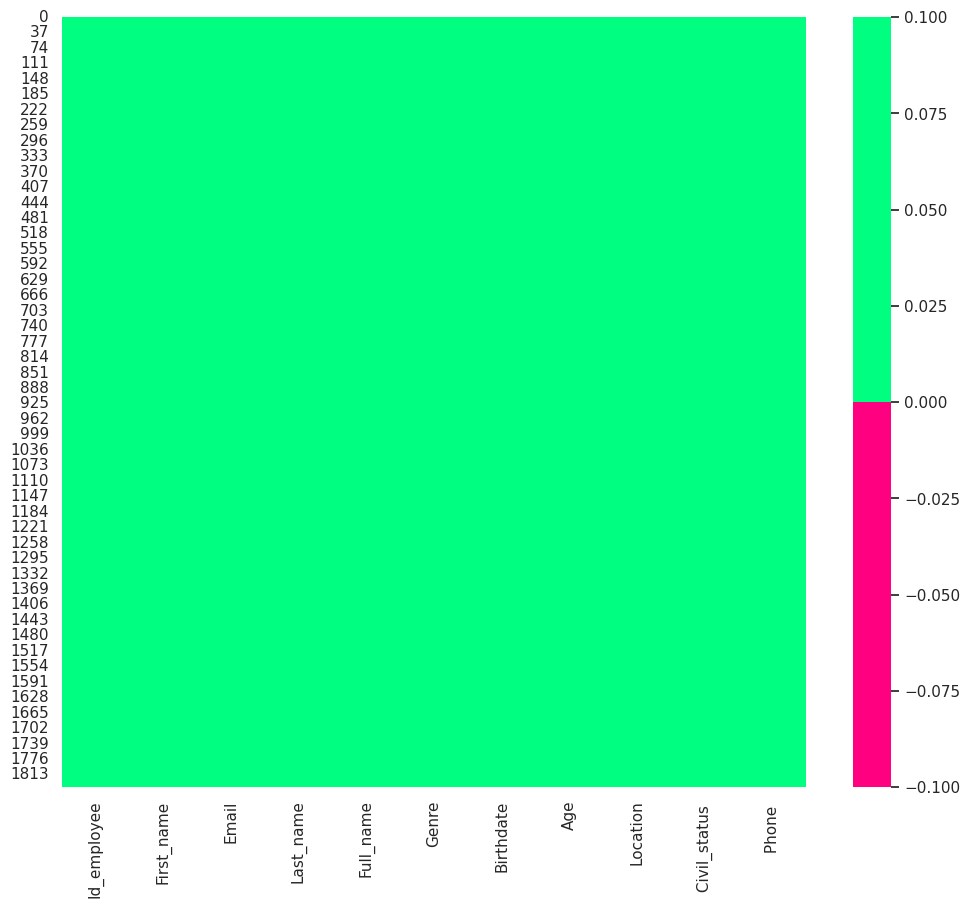

In [121]:
cols = Data.columns[:15] # primeras 15 columnas
colours = ['#ff0080', '#00ff80'] # especificamos los colores - rosa es no missing, verde es missing
sns.heatmap(Data[cols].isnull(), cmap=sns.color_palette(colours))

Id_employee - 0%
First_name - 0%
Email - 0%
Last_name - 0%
Full_name - 0%
Genre - 0%
Birthdate - 0%
Age - 0%
Location - 0%
 Civil_status  - 0%
 Phone  - 0%


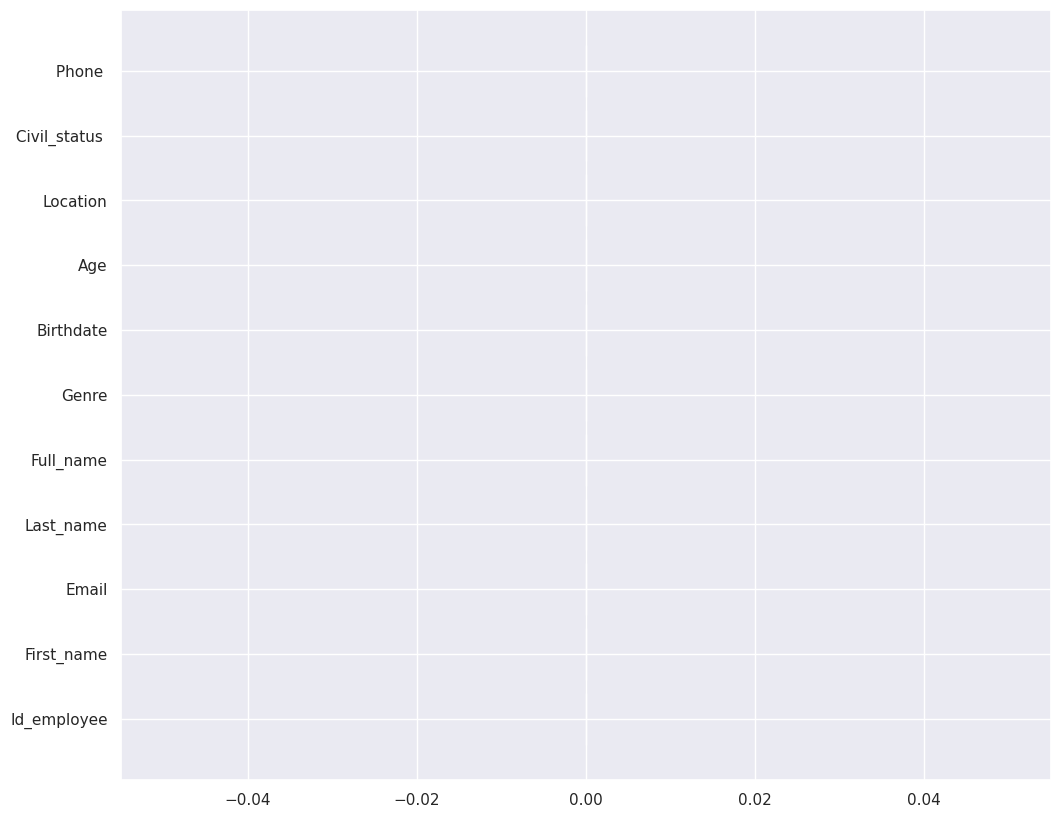

In [122]:
for col in Data.columns:
    pct_missing = np.mean(Data[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))
    plt.barh(col, round(pct_missing*100))

I use feature selector to identify the number of missing values ​​for each attribute and if there are attributes that exceed 80% missing values ​​in their records.

In [123]:
fs = FeatureSelector(data = Data, labels = Data.columns)
fs.identify_missing(missing_threshold=0.8)

0 features with greater than 0.80 missing values.



In [124]:
fs.missing_stats

missing_fraction
Id_employee                  0.0
First_name                   0.0
Email                        0.0
Last_name                    0.0
Full_name                    0.0
Genre                        0.0
Birthdate                    0.0
Age                          0.0
Location                     0.0
 Civil_status                0.0
 Phone                       0.0

I checked if the data is balanced, so i grouped them by genre, which shows me that the data is indeed balanced since there is an equitable distribution in the number of employees in each branch.

In [125]:
Data.groupby(['Genre'])['Genre'].count()

Genre
F    866
M    977
Name: Genre, dtype: int64

<Axes: >

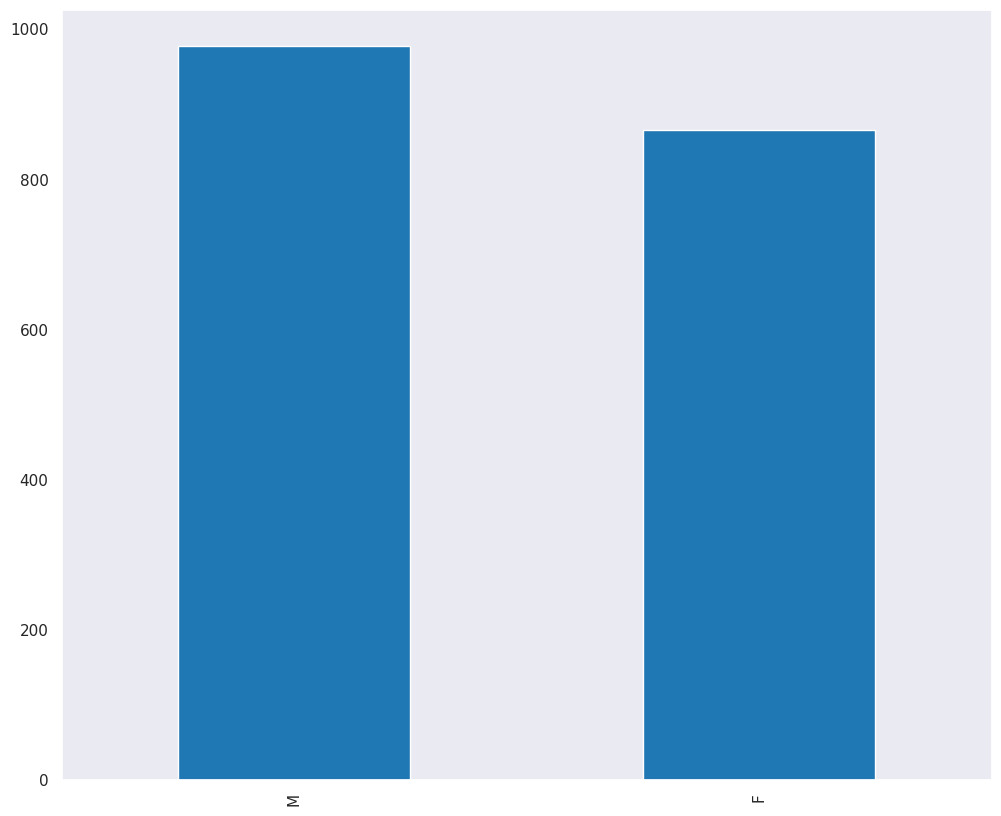

In [126]:
Data['Genre'].value_counts().plot.bar()

# 3. Select Data

I proceed to load the other datasets to be used in order to add value to the performance analysis and additionally obtain a better result in the modeling phase.

I use this function to have a complete display of all the attributes of the dataset.

In [127]:
pd.set_option('display.max_columns', None)

In [128]:
Contracts = upload_files()
Contracts.head()

Saving 2. Contracts.csv to 2. Contracts (1).csv
User uploaded file "2. Contracts (1).csv" with length 118636 bytes


Id_contract  Id_employee    Id_job Type_contract Modality  Workdays  \
0       H-001         1001  ASII1001    Indefinite   Remote         5   
1       H-002         1002  ISII1002     Temporary  On-Site         5   
2       H-003         1003  ASII1003     Temporary   Hybrid         5   
3       H-004         1004    ES1004     Temporary   Remote         5   
4       H-005         1005  ASII1005    Indefinite   Remote         5   

   Worktime  Branch Hiring_date Termination_date  
0        40       2  28/12/2012              NaN  
1        40       5  15/05/2020       15/05/2021  
2        40       5  20/02/2007       20/02/2008  
3        40       3  11/10/2019       10/10/2020  
4        40       4  01/11/2013              NaN

In [129]:
print(Contracts.dtypes)

Id_contract         object
Id_employee          int64
Id_job              object
Type_contract       object
Modality            object
Workdays             int64
Worktime             int64
Branch               int64
Hiring_date         object
Termination_date    object
dtype: object


I proceed to join the datasets taking advantage of the fact that the "Id_employee" attribute exists in both dataframes, so I perform the crossing through a left join on the main table (Data)

In [130]:
Data=Data.merge(Contracts, on='Id_employee', how='left')
Data

Id_employee First_name                        Email   Last_name  \
0            1001       LIAM         LIAM SMITH@gmail.com       SMITH   
1            1002       NOAH       NOAH JOHNSON@gmail.com     JOHNSON   
2            1003     OLIVER    OLIVER WILLIAMS@gmail.com    WILLIAMS   
3            1004     ELIJAH       ELIJAH BROWN@gmail.com       BROWN   
4            1005    WILLIAM      WILLIAM JONES@gmail.com       JONES   
...           ...        ...                          ...         ...   
1838         2839   MADALYNN     MADALYNN CERNA@gmail.com       CERNA   
1839         2840     MELANI  MELANI VIRAMONTES@gmail.com  VIRAMONTES   
1840         2841    LAYLANI   LAYLANI GALDAMEZ@gmail.com    GALDAMEZ   
1841         2842   MAZIKEEN    MAZIKEEN OLIVER@gmail.com      OLIVER   
1842         2843      BELLE     BELLE ANDERSON@gmail.com    ANDERSON   

              Full_name Genre   Birthdate  Age              Location  \
0            LIAM SMITH     M  17/03/1978   45  Basilea, Switzerland   
1          NOAH JOHNSON     M  04/07/1998   25   Zurich, Switzerland   
2       OLIVER WILLIAMS     M  30/05/1978   45          Lyon, France   
3          ELIJAH BROWN     M  06/09/1985   38          Lyon, France   
4         WILLIAM JONES     M  21/02/1977   46       Touluse, France   
...                 ...   ...         ...  ...                   ...   
1838     MADALYNN CERNA     F  27/02/1999   24         Madrid, Spain   
1839  MELANI VIRAMONTES     F  12/12/1994   29   Zurich, Switzerland   
1840   LAYLANI GALDAMEZ     F  24/05/1998   25         Madrid, Spain   
1841    MAZIKEEN OLIVER     F  03/09/2002   21       Touluse, France   
1842     BELLE ANDERSON     F  22/07/2001   22  Ginebra, Switzerland   

      Civil_status    Phone  Id_contract    Id_job Type_contract Modality  \
0                 S  9505405       H-001  ASII1001    Indefinite   Remote   
1                 C  9734761       H-002  ISII1002     Temporary  On-Site   
2                 S  9593611       H-003  ASII1003     Temporary   Hybrid   
3                 C  9466722       H-004    ES1004     Temporary   Remote   
4                 C  9621580       H-005  ASII1005    Indefinite   Remote   
...             ...      ...         ...       ...           ...      ...   
1838              C  8829509      H-1839    ES2839     Temporary   Remote   
1839              C  9877030      H-1840  ISII2840    Indefinite   Hybrid   
1840              O  9237633      H-1841    ES2841     Temporary   Hybrid   
1841              S  9378389      H-1842  ISII2842     Temporary   Hybrid   
1842              O  8887108      H-1843  DSII2843     Temporary   Hybrid   

      Workdays  Worktime  Branch Hiring_date Termination_date  
0            5        40       2  28/12/2012              NaN  
1            5        40       5  15/05/2020       15/05/2021  
2            5        40       5  20/02/2007       20/02/2008  
3            5        40       3  11/10/2019       10/10/2020  
4            5        40       4  01/11/2013              NaN  
...        ...       ...     ...         ...              ...  
1838         5        40       2  01/10/2020       01/10/2021  
1839         5        40       3  17/01/2007              NaN  
1840         5        40       2  02/03/2017       02/03/2018  
1841         5        40       6  24/02/2009       24/02/2010  
1842         5        40       3  23/05/2005       23/05/2006  

[1843 rows x 20 columns]

In [131]:
Jobs = upload_files()
Jobs.head()

Saving 3. Jobs.csv to 3. Jobs (1).csv
User uploaded file "3. Jobs (1).csv" with length 99593 bytes


Id_job                   Job   Salary Job level Id_department  \
0  ASII1001    Software Architect  $60,000    Senior        SFT102   
1  ISII1002  Software Engineer II  $36,000    Senior        SFT103   
2  ASII1003    Software Architect  $36,000    Senior        SFT102   
3    ES1004   Software Specialist  $36,000    Senior        SFT102   
4  ASII1005    Software Architect  $36,000    Senior        SFT102   

   Description  
0          NaN  
1          NaN  
2          NaN  
3          NaN  
4          NaN

In [132]:
print(Jobs.dtypes)

Id_job            object
Job               object
 Salary           object
Job level         object
Id_department     object
Description      float64
dtype: object


I proceed to join the datasets taking advantage of the fact that the "Id_employee" attribute exists in both dataframes, so I perform the crossing through a left join on the main table (Data)

In [133]:
Data=Data.merge(Jobs, on='Id_job', how='left')
Data

Id_employee First_name                        Email   Last_name  \
0            1001       LIAM         LIAM SMITH@gmail.com       SMITH   
1            1002       NOAH       NOAH JOHNSON@gmail.com     JOHNSON   
2            1003     OLIVER    OLIVER WILLIAMS@gmail.com    WILLIAMS   
3            1004     ELIJAH       ELIJAH BROWN@gmail.com       BROWN   
4            1005    WILLIAM      WILLIAM JONES@gmail.com       JONES   
...           ...        ...                          ...         ...   
1838         2839   MADALYNN     MADALYNN CERNA@gmail.com       CERNA   
1839         2840     MELANI  MELANI VIRAMONTES@gmail.com  VIRAMONTES   
1840         2841    LAYLANI   LAYLANI GALDAMEZ@gmail.com    GALDAMEZ   
1841         2842   MAZIKEEN    MAZIKEEN OLIVER@gmail.com      OLIVER   
1842         2843      BELLE     BELLE ANDERSON@gmail.com    ANDERSON   

              Full_name Genre   Birthdate  Age              Location  \
0            LIAM SMITH     M  17/03/1978   45  Basilea, Switzerland   
1          NOAH JOHNSON     M  04/07/1998   25   Zurich, Switzerland   
2       OLIVER WILLIAMS     M  30/05/1978   45          Lyon, France   
3          ELIJAH BROWN     M  06/09/1985   38          Lyon, France   
4         WILLIAM JONES     M  21/02/1977   46       Touluse, France   
...                 ...   ...         ...  ...                   ...   
1838     MADALYNN CERNA     F  27/02/1999   24         Madrid, Spain   
1839  MELANI VIRAMONTES     F  12/12/1994   29   Zurich, Switzerland   
1840   LAYLANI GALDAMEZ     F  24/05/1998   25         Madrid, Spain   
1841    MAZIKEEN OLIVER     F  03/09/2002   21       Touluse, France   
1842     BELLE ANDERSON     F  22/07/2001   22  Ginebra, Switzerland   

      Civil_status    Phone  Id_contract    Id_job Type_contract Modality  \
0                 S  9505405       H-001  ASII1001    Indefinite   Remote   
1                 C  9734761       H-002  ISII1002     Temporary  On-Site   
2                 S  9593611       H-003  ASII1003     Temporary   Hybrid   
3                 C  9466722       H-004    ES1004     Temporary   Remote   
4                 C  9621580       H-005  ASII1005    Indefinite   Remote   
...             ...      ...         ...       ...           ...      ...   
1838              C  8829509      H-1839    ES2839     Temporary   Remote   
1839              C  9877030      H-1840  ISII2840    Indefinite   Hybrid   
1840              O  9237633      H-1841    ES2841     Temporary   Hybrid   
1841              S  9378389      H-1842  ISII2842     Temporary   Hybrid   
1842              O  8887108      H-1843  DSII2843     Temporary   Hybrid   

      Workdays  Worktime  Branch Hiring_date Termination_date  \
0            5        40       2  28/12/2012              NaN   
1            5        40       5  15/05/2020       15/05/2021   
2            5        40       5  20/02/2007       20/02/2008   
3            5        40       3  11/10/2019       10/10/2020   
4            5        40       4  01/11/2013              NaN   
...        ...       ...     ...         ...              ...   
1838         5        40       2  01/10/2020       01/10/2021   
1839         5        40       3  17/01/2007              NaN   
1840         5        40       2  02/03/2017       02/03/2018   
1841         5        40       6  24/02/2009       24/02/2010   
1842         5        40       3  23/05/2005       23/05/2006   

                        Job   Salary Job level Id_department  Description  
0        Software Architect  $60,000    Senior        SFT102          NaN  
1      Software Engineer II  $36,000    Senior        SFT103          NaN  
2        Software Architect  $36,000    Senior        SFT102          NaN  
3       Software Specialist  $36,000    Senior        SFT102          NaN  
4        Software Architect  $36,000    Senior        SFT102          NaN  
...                     ...      ...       ...           ...          ...  
1838    Software Specialis

In [134]:
Projects = upload_files()
Projects.head()

Saving 4. Projects_performance.csv to 4. Projects_performance (1).csv
User uploaded file "4. Projects_performance (1).csv" with length 97675 bytes


Id_project  Id_employee  Compliance   Effectiveness  Quality  Satisfaction  \
0           5         1001        18.20           0.15    10.81          0.85   
1           2         1002        31.75           0.07    25.45          0.74   
2           3         1003        39.71           0.14    28.69          0.76   
3           1         1004        23.23           0.06    13.20          0.75   
4           1         1005         5.41           0.19     9.44          0.89   

   Productivity  Workteam     Complaints  
0          0.81      0.48  99 Complaints  
1          0.83      0.69  63 Complaints  
2          0.74      0.52  66 Complaints  
3          0.82      0.54  19 Complaints  
4          0.86      0.50  16 Complaints

In [135]:
print(Projects.dtypes)

Id_project         int64
Id_employee        int64
Compliance       float64
Effectiveness    float64
Quality          float64
Satisfaction     float64
Productivity     float64
Workteam         float64
Complaints        object
dtype: object


In [136]:
Data=Data.merge(Projects, on='Id_employee', how='left')
Data

Id_employee First_name                        Email   Last_name  \
0            1001       LIAM         LIAM SMITH@gmail.com       SMITH   
1            1002       NOAH       NOAH JOHNSON@gmail.com     JOHNSON   
2            1003     OLIVER    OLIVER WILLIAMS@gmail.com    WILLIAMS   
3            1004     ELIJAH       ELIJAH BROWN@gmail.com       BROWN   
4            1005    WILLIAM      WILLIAM JONES@gmail.com       JONES   
...           ...        ...                          ...         ...   
1838         2839   MADALYNN     MADALYNN CERNA@gmail.com       CERNA   
1839         2840     MELANI  MELANI VIRAMONTES@gmail.com  VIRAMONTES   
1840         2841    LAYLANI   LAYLANI GALDAMEZ@gmail.com    GALDAMEZ   
1841         2842   MAZIKEEN    MAZIKEEN OLIVER@gmail.com      OLIVER   
1842         2843      BELLE     BELLE ANDERSON@gmail.com    ANDERSON   

              Full_name Genre   Birthdate  Age              Location  \
0            LIAM SMITH     M  17/03/1978   45  Basilea, Switzerland   
1          NOAH JOHNSON     M  04/07/1998   25   Zurich, Switzerland   
2       OLIVER WILLIAMS     M  30/05/1978   45          Lyon, France   
3          ELIJAH BROWN     M  06/09/1985   38          Lyon, France   
4         WILLIAM JONES     M  21/02/1977   46       Touluse, France   
...                 ...   ...         ...  ...                   ...   
1838     MADALYNN CERNA     F  27/02/1999   24         Madrid, Spain   
1839  MELANI VIRAMONTES     F  12/12/1994   29   Zurich, Switzerland   
1840   LAYLANI GALDAMEZ     F  24/05/1998   25         Madrid, Spain   
1841    MAZIKEEN OLIVER     F  03/09/2002   21       Touluse, France   
1842     BELLE ANDERSON     F  22/07/2001   22  Ginebra, Switzerland   

      Civil_status    Phone  Id_contract    Id_job Type_contract Modality  \
0                 S  9505405       H-001  ASII1001    Indefinite   Remote   
1                 C  9734761       H-002  ISII1002     Temporary  On-Site   
2                 S  9593611       H-003  ASII1003     Temporary   Hybrid   
3                 C  9466722       H-004    ES1004     Temporary   Remote   
4                 C  9621580       H-005  ASII1005    Indefinite   Remote   
...             ...      ...         ...       ...           ...      ...   
1838              C  8829509      H-1839    ES2839     Temporary   Remote   
1839              C  9877030      H-1840  ISII2840    Indefinite   Hybrid   
1840              O  9237633      H-1841    ES2841     Temporary   Hybrid   
1841              S  9378389      H-1842  ISII2842     Temporary   Hybrid   
1842              O  8887108      H-1843  DSII2843     Temporary   Hybrid   

      Workdays  Worktime  Branch Hiring_date Termination_date  \
0            5        40       2  28/12/2012              NaN   
1            5        40       5  15/05/2020       15/05/2021   
2            5        40       5  20/02/2007       20/02/2008   
3            5        40       3  11/10/2019       10/10/2020   
4            5        40       4  01/11/2013              NaN   
...        ...       ...     ...         ...              ...   
1838         5        40       2  01/10/2020       01/10/2021   
1839         5        40       3  17/01/2007              NaN   
1840         5        40       2  02/03/2017       02/03/2018   
1841         5        40       6  24/02/2009       24/02/2010   
1842         5        40       3  23/05/2005       23/05/2006   

                        Job   Salary Job level Id_department  Description  \
0        Software Architect  $60,000    Senior        SFT102          NaN   
1      Software Engineer II  $36,000    Senior        SFT103          NaN   
2        Software Architect  $36,000    Senior        SFT102          NaN   
3       Software Specialist  $36,000    Senior        SFT102          NaN   
4        Software Architect  $36,000    Senior        SFT102          NaN   
...                     ...      ...       ...           ...          ...   
1838    Software Sp

In [137]:
tasks = upload_files()
tasks.head()

Saving 5. Tasks.csv to 5. Tasks (1).csv
User uploaded file "5. Tasks (1).csv" with length 37891 bytes


Id_employee  High_difficulty  Medium_difficulty  Low_difficulty
0         1001             0.85               0.06            0.09
1         1002             0.57               0.00            0.43
2         1003             0.65               0.11            0.24
3         1004             0.57               0.00            0.43
4         1005             0.55               0.11            0.34

In [138]:
print(tasks.dtypes)

Id_employee            int64
High_difficulty      float64
Medium_difficulty    float64
Low_difficulty       float64
dtype: object


In [139]:
Data=Data.merge(tasks, on='Id_employee', how='left')
Data

Id_employee First_name                        Email   Last_name  \
0            1001       LIAM         LIAM SMITH@gmail.com       SMITH   
1            1002       NOAH       NOAH JOHNSON@gmail.com     JOHNSON   
2            1003     OLIVER    OLIVER WILLIAMS@gmail.com    WILLIAMS   
3            1004     ELIJAH       ELIJAH BROWN@gmail.com       BROWN   
4            1005    WILLIAM      WILLIAM JONES@gmail.com       JONES   
...           ...        ...                          ...         ...   
1838         2839   MADALYNN     MADALYNN CERNA@gmail.com       CERNA   
1839         2840     MELANI  MELANI VIRAMONTES@gmail.com  VIRAMONTES   
1840         2841    LAYLANI   LAYLANI GALDAMEZ@gmail.com    GALDAMEZ   
1841         2842   MAZIKEEN    MAZIKEEN OLIVER@gmail.com      OLIVER   
1842         2843      BELLE     BELLE ANDERSON@gmail.com    ANDERSON   

              Full_name Genre   Birthdate  Age              Location  \
0            LIAM SMITH     M  17/03/1978   45  Basilea, Switzerland   
1          NOAH JOHNSON     M  04/07/1998   25   Zurich, Switzerland   
2       OLIVER WILLIAMS     M  30/05/1978   45          Lyon, France   
3          ELIJAH BROWN     M  06/09/1985   38          Lyon, France   
4         WILLIAM JONES     M  21/02/1977   46       Touluse, France   
...                 ...   ...         ...  ...                   ...   
1838     MADALYNN CERNA     F  27/02/1999   24         Madrid, Spain   
1839  MELANI VIRAMONTES     F  12/12/1994   29   Zurich, Switzerland   
1840   LAYLANI GALDAMEZ     F  24/05/1998   25         Madrid, Spain   
1841    MAZIKEEN OLIVER     F  03/09/2002   21       Touluse, France   
1842     BELLE ANDERSON     F  22/07/2001   22  Ginebra, Switzerland   

      Civil_status    Phone  Id_contract    Id_job Type_contract Modality  \
0                 S  9505405       H-001  ASII1001    Indefinite   Remote   
1                 C  9734761       H-002  ISII1002     Temporary  On-Site   
2                 S  9593611       H-003  ASII1003     Temporary   Hybrid   
3                 C  9466722       H-004    ES1004     Temporary   Remote   
4                 C  9621580       H-005  ASII1005    Indefinite   Remote   
...             ...      ...         ...       ...           ...      ...   
1838              C  8829509      H-1839    ES2839     Temporary   Remote   
1839              C  9877030      H-1840  ISII2840    Indefinite   Hybrid   
1840              O  9237633      H-1841    ES2841     Temporary   Hybrid   
1841              S  9378389      H-1842  ISII2842     Temporary   Hybrid   
1842              O  8887108      H-1843  DSII2843     Temporary   Hybrid   

      Workdays  Worktime  Branch Hiring_date Termination_date  \
0            5        40       2  28/12/2012              NaN   
1            5        40       5  15/05/2020       15/05/2021   
2            5        40       5  20/02/2007       20/02/2008   
3            5        40       3  11/10/2019       10/10/2020   
4            5        40       4  01/11/2013              NaN   
...        ...       ...     ...         ...              ...   
1838         5        40       2  01/10/2020       01/10/2021   
1839         5        40       3  17/01/2007              NaN   
1840         5        40       2  02/03/2017       02/03/2018   
1841         5        40       6  24/02/2009       24/02/2010   
1842         5        40       3  23/05/2005       23/05/2006   

                        Job   Salary Job level Id_department  Description  \
0        Software Architect  $60,000    Senior        SFT102          NaN   
1      Software Engineer II  $36,000    Senior        SFT103          NaN   
2        Software Architect  $36,000    Senior        SFT102          NaN   
3       Software Specialist  $36,000    Senior        SFT102          NaN   
4        Software Architect  $36,000    Senior        SFT102          NaN   
...                     ...      ...       ...           ...          ...   
1838    Software Sp

I repeat the process carried out with the first dataset to validate the attributes of the consolidated dataset.

In [140]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1843 entries, 0 to 1842
Data columns (total 36 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Id_employee        1843 non-null   int64  
 1   First_name         1843 non-null   object 
 2   Email              1843 non-null   object 
 3   Last_name          1843 non-null   object 
 4   Full_name          1843 non-null   object 
 5   Genre              1843 non-null   object 
 6   Birthdate          1843 non-null   object 
 7   Age                1843 non-null   int64  
 8   Location           1843 non-null   object 
 9    Civil_status      1843 non-null   object 
 10   Phone             1843 non-null   int64  
 11  Id_contract        1843 non-null   object 
 12  Id_job             1843 non-null   object 
 13  Type_contract      1843 non-null   object 
 14  Modality           1843 non-null   object 
 15  Workdays           1843 non-null   int64  
 16  Worktime           1843 

In [141]:
print(Data.shape)

(1843, 36)


In [142]:
print(Data.dtypes)

Id_employee            int64
First_name            object
Email                 object
Last_name             object
Full_name             object
Genre                 object
Birthdate             object
Age                    int64
Location              object
 Civil_status         object
 Phone                 int64
Id_contract           object
Id_job                object
Type_contract         object
Modality              object
Workdays               int64
Worktime               int64
Branch                 int64
Hiring_date           object
Termination_date      object
Job                   object
 Salary               object
Job level             object
Id_department         object
Description          float64
Id_project             int64
Compliance           float64
Effectiveness        float64
Quality              float64
Satisfaction         float64
Productivity         float64
Workteam             float64
Complaints            object
High_difficulty      float64
Medium_difficu

In [143]:
print(Data.shape)

(1843, 36)


In [144]:
Data.columns

Index(['Id_employee', 'First_name', 'Email', 'Last_name', 'Full_name', 'Genre',
       'Birthdate', 'Age', 'Location', ' Civil_status ', ' Phone ',
       'Id_contract', 'Id_job', 'Type_contract', 'Modality', 'Workdays',
       'Worktime', 'Branch', 'Hiring_date', 'Termination_date', 'Job',
       ' Salary', 'Job level', 'Id_department', 'Description', 'Id_project',
       'Compliance ', 'Effectiveness', 'Quality', 'Satisfaction',
       'Productivity', 'Workteam', 'Complaints', 'High_difficulty',
       'Medium_difficulty', 'Low_difficulty'],
      dtype='object')

In [145]:
df_numeric = Data.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
print(numeric_cols)

['Id_employee' 'Age' ' Phone ' 'Workdays' 'Worktime' 'Branch'
 'Description' 'Id_project' 'Compliance ' 'Effectiveness' 'Quality'
 'Satisfaction' 'Productivity' 'Workteam' 'High_difficulty'
 'Medium_difficulty' 'Low_difficulty']


In [146]:
df_non_numeric = Data.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values
print(non_numeric_cols)

['First_name' 'Email' 'Last_name' 'Full_name' 'Genre' 'Birthdate'
 'Location' ' Civil_status ' 'Id_contract' 'Id_job' 'Type_contract'
 'Modality' 'Hiring_date' 'Termination_date' 'Job' ' Salary' 'Job level'
 'Id_department' 'Complaints']


In [147]:
Data.duplicated().value_counts()

False    1843
dtype: int64

# 4. Data Preprocessing

At this point, the cleaning and transformation of attributes is carried out with the aim of preparing the data before its analysis. For which data cleaning, data transformation and data reduction were carried out. This allowed the data to be used in a better way and generate a more complete analysis.

In [148]:
Data

Id_employee First_name                        Email   Last_name  \
0            1001       LIAM         LIAM SMITH@gmail.com       SMITH   
1            1002       NOAH       NOAH JOHNSON@gmail.com     JOHNSON   
2            1003     OLIVER    OLIVER WILLIAMS@gmail.com    WILLIAMS   
3            1004     ELIJAH       ELIJAH BROWN@gmail.com       BROWN   
4            1005    WILLIAM      WILLIAM JONES@gmail.com       JONES   
...           ...        ...                          ...         ...   
1838         2839   MADALYNN     MADALYNN CERNA@gmail.com       CERNA   
1839         2840     MELANI  MELANI VIRAMONTES@gmail.com  VIRAMONTES   
1840         2841    LAYLANI   LAYLANI GALDAMEZ@gmail.com    GALDAMEZ   
1841         2842   MAZIKEEN    MAZIKEEN OLIVER@gmail.com      OLIVER   
1842         2843      BELLE     BELLE ANDERSON@gmail.com    ANDERSON   

              Full_name Genre   Birthdate  Age              Location  \
0            LIAM SMITH     M  17/03/1978   45  Basilea, Switzerland   
1          NOAH JOHNSON     M  04/07/1998   25   Zurich, Switzerland   
2       OLIVER WILLIAMS     M  30/05/1978   45          Lyon, France   
3          ELIJAH BROWN     M  06/09/1985   38          Lyon, France   
4         WILLIAM JONES     M  21/02/1977   46       Touluse, France   
...                 ...   ...         ...  ...                   ...   
1838     MADALYNN CERNA     F  27/02/1999   24         Madrid, Spain   
1839  MELANI VIRAMONTES     F  12/12/1994   29   Zurich, Switzerland   
1840   LAYLANI GALDAMEZ     F  24/05/1998   25         Madrid, Spain   
1841    MAZIKEEN OLIVER     F  03/09/2002   21       Touluse, France   
1842     BELLE ANDERSON     F  22/07/2001   22  Ginebra, Switzerland   

      Civil_status    Phone  Id_contract    Id_job Type_contract Modality  \
0                 S  9505405       H-001  ASII1001    Indefinite   Remote   
1                 C  9734761       H-002  ISII1002     Temporary  On-Site   
2                 S  9593611       H-003  ASII1003     Temporary   Hybrid   
3                 C  9466722       H-004    ES1004     Temporary   Remote   
4                 C  9621580       H-005  ASII1005    Indefinite   Remote   
...             ...      ...         ...       ...           ...      ...   
1838              C  8829509      H-1839    ES2839     Temporary   Remote   
1839              C  9877030      H-1840  ISII2840    Indefinite   Hybrid   
1840              O  9237633      H-1841    ES2841     Temporary   Hybrid   
1841              S  9378389      H-1842  ISII2842     Temporary   Hybrid   
1842              O  8887108      H-1843  DSII2843     Temporary   Hybrid   

      Workdays  Worktime  Branch Hiring_date Termination_date  \
0            5        40       2  28/12/2012              NaN   
1            5        40       5  15/05/2020       15/05/2021   
2            5        40       5  20/02/2007       20/02/2008   
3            5        40       3  11/10/2019       10/10/2020   
4            5        40       4  01/11/2013              NaN   
...        ...       ...     ...         ...              ...   
1838         5        40       2  01/10/2020       01/10/2021   
1839         5        40       3  17/01/2007              NaN   
1840         5        40       2  02/03/2017       02/03/2018   
1841         5        40       6  24/02/2009       24/02/2010   
1842         5        40       3  23/05/2005       23/05/2006   

                        Job   Salary Job level Id_department  Description  \
0        Software Architect  $60,000    Senior        SFT102          NaN   
1      Software Engineer II  $36,000    Senior        SFT103          NaN   
2        Software Architect  $36,000    Senior        SFT102          NaN   
3       Software Specialist  $36,000    Senior        SFT102          NaN   
4        Software Architect  $36,000    Senior        SFT102          NaN   
...                     ...      ...       ...           ...          ...   
1838    Software Sp

To begin preprocessing the data, I initially validate missing values.

In [149]:
Data.isnull().sum()

Id_employee             0
First_name              0
Email                   0
Last_name               0
Full_name               0
Genre                   0
Birthdate               0
Age                     0
Location                0
 Civil_status           0
 Phone                  0
Id_contract             0
Id_job                  0
Type_contract           0
Modality                0
Workdays                0
Worktime                0
Branch                  0
Hiring_date             0
Termination_date      941
Job                     0
 Salary                 0
Job level               0
Id_department           0
Description          1843
Id_project              0
Compliance              0
Effectiveness           0
Quality                 0
Satisfaction            0
Productivity            0
Workteam                0
Complaints              0
High_difficulty         0
Medium_difficulty       0
Low_difficulty          0
dtype: int64

<Axes: >

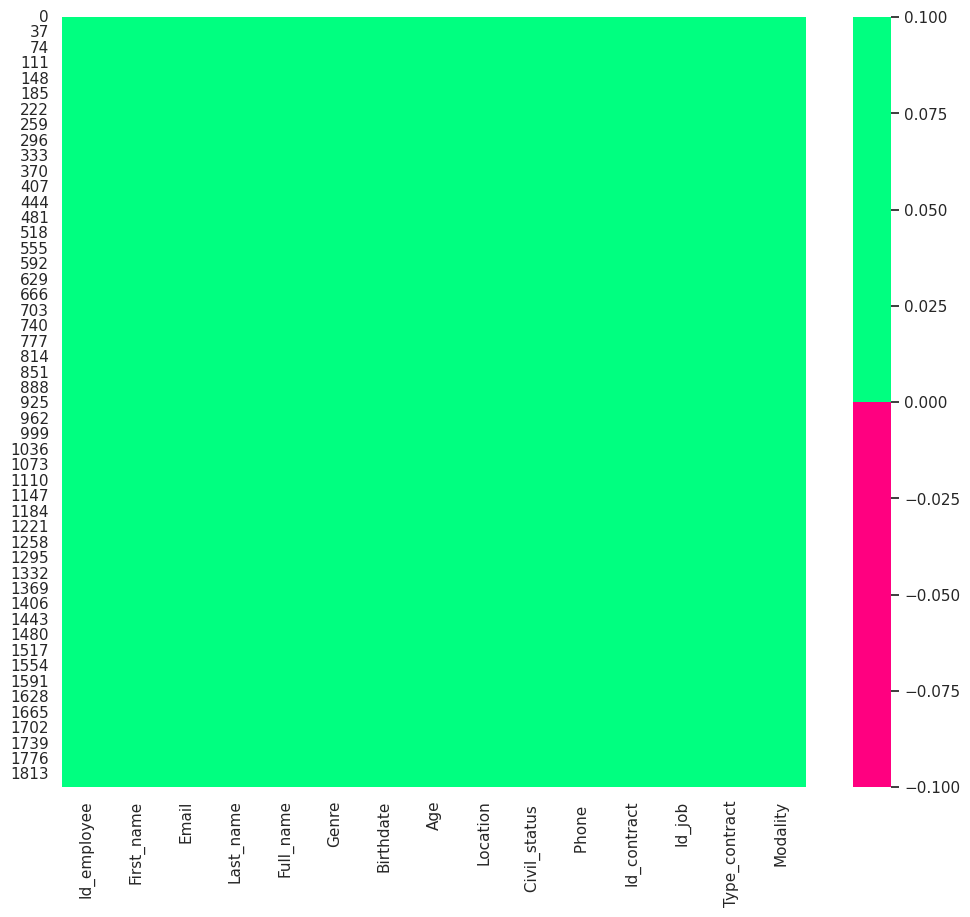

In [150]:
cols = Data.columns[:15] # primeras 15 columnas
colours = ['#ff0080', '#00ff80'] # especificamos los colores - rosa es no missing, verde es missing
sns.heatmap(Data[cols].isnull(), cmap=sns.color_palette(colours))

Id_employee - 0%
First_name - 0%
Email - 0%
Last_name - 0%
Full_name - 0%
Genre - 0%
Birthdate - 0%
Age - 0%
Location - 0%
 Civil_status  - 0%
 Phone  - 0%
Id_contract - 0%
Id_job - 0%
Type_contract - 0%
Modality - 0%
Workdays - 0%
Worktime - 0%
Branch - 0%
Hiring_date - 0%
Termination_date - 51%
Job - 0%
 Salary - 0%
Job level - 0%
Id_department - 0%
Description - 100%
Id_project - 0%
Compliance  - 0%
Effectiveness - 0%
Quality - 0%
Satisfaction - 0%
Productivity - 0%
Workteam - 0%
Complaints - 0%
High_difficulty - 0%
Medium_difficulty - 0%
Low_difficulty - 0%


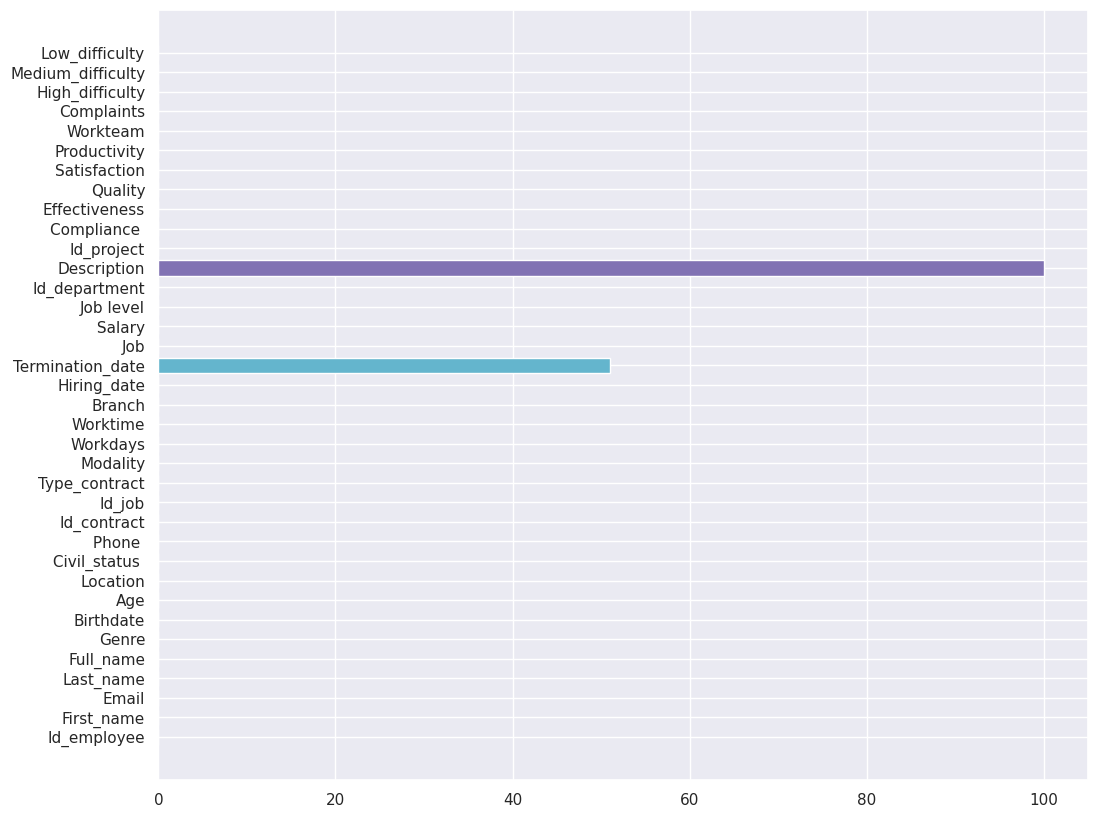

In [151]:
for col in Data.columns:
    pct_missing = np.mean(Data[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))
    plt.barh(col, round(pct_missing*100))

I generate a histogram with the distribution of the missing values.

created missing indicator for: Termination_date
created missing indicator for: Description


<Axes: xlabel='index'>

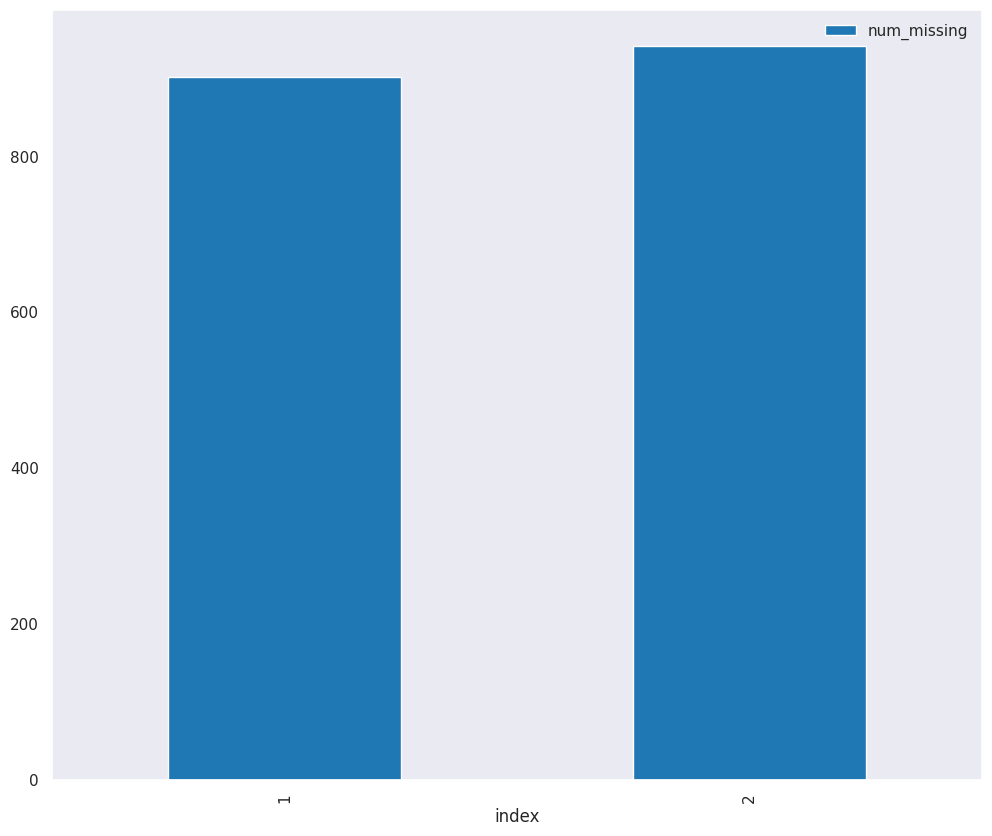

In [152]:
Data_missings=Data.copy()
for col in Data_missings.columns:
    missing = Data_missings[col].isnull()
    num_missing = np.sum(missing)

    if num_missing > 0:
        print('created missing indicator for: {}'.format(col))
        Data_missings['{}_ismissing'.format(col)] = missing


ismissing_cols = [col for col in Data_missings.columns if 'ismissing' in col]

Data_missings['num_missing'] = Data_missings[ismissing_cols].sum(axis=1)

Data_missings['num_missing'].value_counts().reset_index().sort_values(by='index').plot.bar(x='index', y='num_missing')

I check the columns to see if they have many missing values.

In [153]:
#¿Dejar o no dejar la instancia?
# drop rows with a lot of missing values.
ind_missing = Data_missings[Data_missings['num_missing'] > 12].index
df_less_missing_rows = Data_missings.drop(ind_missing, axis=0)
print(df_less_missing_rows.shape)

(1843, 39)


In [154]:
#¿Dejar o no dejar la característica?
def filter_na(datos, nivelna = 0.8): # Porcentaje de missings por el que queremos filtrar
    por_na = datos.isnull().mean() # calculamos la media
    names =list(por_na[por_na < nivelna].index) #elimina las variables <= que ese valor
    return pd.DataFrame(datos.filter(names, axis = 1))

Data=filter_na(Data) #devuelve el dataset filtrado

print(Data.shape)

(1843, 35)


Through this function I confirm that indeed no attribute of the consolidated dataset has more than 80% of missign values.

In [155]:
fs = FeatureSelector(data = Data, labels = Data.columns)
fs.identify_missing(missing_threshold=0.8)

0 features with greater than 0.80 missing values.



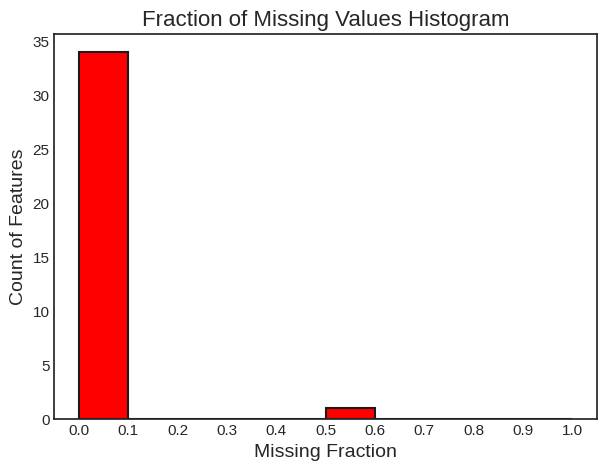

In [156]:
fs.plot_missing()

In [157]:
Data.isnull().mean()*100

Id_employee           0.000000
First_name            0.000000
Email                 0.000000
Last_name             0.000000
Full_name             0.000000
Genre                 0.000000
Birthdate             0.000000
Age                   0.000000
Location              0.000000
 Civil_status         0.000000
 Phone                0.000000
Id_contract           0.000000
Id_job                0.000000
Type_contract         0.000000
Modality              0.000000
Workdays              0.000000
Worktime              0.000000
Branch                0.000000
Hiring_date           0.000000
Termination_date     51.058058
Job                   0.000000
 Salary               0.000000
Job level             0.000000
Id_department         0.000000
Id_project            0.000000
Compliance            0.000000
Effectiveness         0.000000
Quality               0.000000
Satisfaction          0.000000
Productivity          0.000000
Workteam              0.000000
Complaints            0.000000
High_dif

I proceed to manage the existing missing values. I could eliminate them through the "Dropna" function but said employees would be left out of the analysis for which I proceed to impute the null values ​​with 0.

In [158]:
Data['Termination_date'].fillna(0, inplace=True)

In [159]:
Data

Id_employee First_name                        Email   Last_name  \
0            1001       LIAM         LIAM SMITH@gmail.com       SMITH   
1            1002       NOAH       NOAH JOHNSON@gmail.com     JOHNSON   
2            1003     OLIVER    OLIVER WILLIAMS@gmail.com    WILLIAMS   
3            1004     ELIJAH       ELIJAH BROWN@gmail.com       BROWN   
4            1005    WILLIAM      WILLIAM JONES@gmail.com       JONES   
...           ...        ...                          ...         ...   
1838         2839   MADALYNN     MADALYNN CERNA@gmail.com       CERNA   
1839         2840     MELANI  MELANI VIRAMONTES@gmail.com  VIRAMONTES   
1840         2841    LAYLANI   LAYLANI GALDAMEZ@gmail.com    GALDAMEZ   
1841         2842   MAZIKEEN    MAZIKEEN OLIVER@gmail.com      OLIVER   
1842         2843      BELLE     BELLE ANDERSON@gmail.com    ANDERSON   

              Full_name Genre   Birthdate  Age              Location  \
0            LIAM SMITH     M  17/03/1978   45  Basilea, Switzerland   
1          NOAH JOHNSON     M  04/07/1998   25   Zurich, Switzerland   
2       OLIVER WILLIAMS     M  30/05/1978   45          Lyon, France   
3          ELIJAH BROWN     M  06/09/1985   38          Lyon, France   
4         WILLIAM JONES     M  21/02/1977   46       Touluse, France   
...                 ...   ...         ...  ...                   ...   
1838     MADALYNN CERNA     F  27/02/1999   24         Madrid, Spain   
1839  MELANI VIRAMONTES     F  12/12/1994   29   Zurich, Switzerland   
1840   LAYLANI GALDAMEZ     F  24/05/1998   25         Madrid, Spain   
1841    MAZIKEEN OLIVER     F  03/09/2002   21       Touluse, France   
1842     BELLE ANDERSON     F  22/07/2001   22  Ginebra, Switzerland   

      Civil_status    Phone  Id_contract    Id_job Type_contract Modality  \
0                 S  9505405       H-001  ASII1001    Indefinite   Remote   
1                 C  9734761       H-002  ISII1002     Temporary  On-Site   
2                 S  9593611       H-003  ASII1003     Temporary   Hybrid   
3                 C  9466722       H-004    ES1004     Temporary   Remote   
4                 C  9621580       H-005  ASII1005    Indefinite   Remote   
...             ...      ...         ...       ...           ...      ...   
1838              C  8829509      H-1839    ES2839     Temporary   Remote   
1839              C  9877030      H-1840  ISII2840    Indefinite   Hybrid   
1840              O  9237633      H-1841    ES2841     Temporary   Hybrid   
1841              S  9378389      H-1842  ISII2842     Temporary   Hybrid   
1842              O  8887108      H-1843  DSII2843     Temporary   Hybrid   

      Workdays  Worktime  Branch Hiring_date Termination_date  \
0            5        40       2  28/12/2012                0   
1            5        40       5  15/05/2020       15/05/2021   
2            5        40       5  20/02/2007       20/02/2008   
3            5        40       3  11/10/2019       10/10/2020   
4            5        40       4  01/11/2013                0   
...        ...       ...     ...         ...              ...   
1838         5        40       2  01/10/2020       01/10/2021   
1839         5        40       3  17/01/2007                0   
1840         5        40       2  02/03/2017       02/03/2018   
1841         5        40       6  24/02/2009       24/02/2010   
1842         5        40       3  23/05/2005       23/05/2006   

                        Job   Salary Job level Id_department  Id_project  \
0        Software Architect  $60,000    Senior        SFT102           5   
1      Software Engineer II  $36,000    Senior        SFT103           2   
2        Software Architect  $36,000    Senior        SFT102           3   
3       Software Specialist  $36,000    Senior        SFT102           1   
4        Software Architect  $36,000    Senior        SFT102           1   
...                     ...      ...       ...           ...         ...   
1838    Software Specialis

In [160]:
column_names = Data.columns
print(column_names)

Index(['Id_employee', 'First_name', 'Email', 'Last_name', 'Full_name', 'Genre',
       'Birthdate', 'Age', 'Location', ' Civil_status ', ' Phone ',
       'Id_contract', 'Id_job', 'Type_contract', 'Modality', 'Workdays',
       'Worktime', 'Branch', 'Hiring_date', 'Termination_date', 'Job',
       ' Salary', 'Job level', 'Id_department', 'Id_project', 'Compliance ',
       'Effectiveness', 'Quality', 'Satisfaction', 'Productivity', 'Workteam',
       'Complaints', 'High_difficulty', 'Medium_difficulty', 'Low_difficulty'],
      dtype='object')


He eliminated the dollar symbol from the "Salary" attribute, additionally replacing the comma with a period so that the attribute is understood as decimal type and can be worked on.

In [161]:
Data[' Salary'] = Data[' Salary'].str.replace('$', '').str.replace(',', '.').astype(float)

<ipython-input-161-96db62892667>:1: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.



In [162]:
print(Data.dtypes)

Id_employee            int64
First_name            object
Email                 object
Last_name             object
Full_name             object
Genre                 object
Birthdate             object
Age                    int64
Location              object
 Civil_status         object
 Phone                 int64
Id_contract           object
Id_job                object
Type_contract         object
Modality              object
Workdays               int64
Worktime               int64
Branch                 int64
Hiring_date           object
Termination_date      object
Job                   object
 Salary              float64
Job level             object
Id_department         object
Id_project             int64
Compliance           float64
Effectiveness        float64
Quality              float64
Satisfaction         float64
Productivity         float64
Workteam             float64
Complaints            object
High_difficulty      float64
Medium_difficulty    float64
Low_difficulty

In [163]:
Data

Id_employee First_name                        Email   Last_name  \
0            1001       LIAM         LIAM SMITH@gmail.com       SMITH   
1            1002       NOAH       NOAH JOHNSON@gmail.com     JOHNSON   
2            1003     OLIVER    OLIVER WILLIAMS@gmail.com    WILLIAMS   
3            1004     ELIJAH       ELIJAH BROWN@gmail.com       BROWN   
4            1005    WILLIAM      WILLIAM JONES@gmail.com       JONES   
...           ...        ...                          ...         ...   
1838         2839   MADALYNN     MADALYNN CERNA@gmail.com       CERNA   
1839         2840     MELANI  MELANI VIRAMONTES@gmail.com  VIRAMONTES   
1840         2841    LAYLANI   LAYLANI GALDAMEZ@gmail.com    GALDAMEZ   
1841         2842   MAZIKEEN    MAZIKEEN OLIVER@gmail.com      OLIVER   
1842         2843      BELLE     BELLE ANDERSON@gmail.com    ANDERSON   

              Full_name Genre   Birthdate  Age              Location  \
0            LIAM SMITH     M  17/03/1978   45  Basilea, Switzerland   
1          NOAH JOHNSON     M  04/07/1998   25   Zurich, Switzerland   
2       OLIVER WILLIAMS     M  30/05/1978   45          Lyon, France   
3          ELIJAH BROWN     M  06/09/1985   38          Lyon, France   
4         WILLIAM JONES     M  21/02/1977   46       Touluse, France   
...                 ...   ...         ...  ...                   ...   
1838     MADALYNN CERNA     F  27/02/1999   24         Madrid, Spain   
1839  MELANI VIRAMONTES     F  12/12/1994   29   Zurich, Switzerland   
1840   LAYLANI GALDAMEZ     F  24/05/1998   25         Madrid, Spain   
1841    MAZIKEEN OLIVER     F  03/09/2002   21       Touluse, France   
1842     BELLE ANDERSON     F  22/07/2001   22  Ginebra, Switzerland   

      Civil_status    Phone  Id_contract    Id_job Type_contract Modality  \
0                 S  9505405       H-001  ASII1001    Indefinite   Remote   
1                 C  9734761       H-002  ISII1002     Temporary  On-Site   
2                 S  9593611       H-003  ASII1003     Temporary   Hybrid   
3                 C  9466722       H-004    ES1004     Temporary   Remote   
4                 C  9621580       H-005  ASII1005    Indefinite   Remote   
...             ...      ...         ...       ...           ...      ...   
1838              C  8829509      H-1839    ES2839     Temporary   Remote   
1839              C  9877030      H-1840  ISII2840    Indefinite   Hybrid   
1840              O  9237633      H-1841    ES2841     Temporary   Hybrid   
1841              S  9378389      H-1842  ISII2842     Temporary   Hybrid   
1842              O  8887108      H-1843  DSII2843     Temporary   Hybrid   

      Workdays  Worktime  Branch Hiring_date Termination_date  \
0            5        40       2  28/12/2012                0   
1            5        40       5  15/05/2020       15/05/2021   
2            5        40       5  20/02/2007       20/02/2008   
3            5        40       3  11/10/2019       10/10/2020   
4            5        40       4  01/11/2013                0   
...        ...       ...     ...         ...              ...   
1838         5        40       2  01/10/2020       01/10/2021   
1839         5        40       3  17/01/2007                0   
1840         5        40       2  02/03/2017       02/03/2018   
1841         5        40       6  24/02/2009       24/02/2010   
1842         5        40       3  23/05/2005       23/05/2006   

                        Job   Salary Job level Id_department  Id_project  \
0        Software Architect     60.0    Senior        SFT102           5   
1      Software Engineer II     36.0    Senior        SFT103           2   
2        Software Architect     36.0    Senior        SFT102           3   
3       Software Specialist     36.0    Senior        SFT102           1   
4        Software Architect     36.0    Senior        SFT102           1   
...                     ...      ...       ...           ...         ...   
1838    Software Specialis

I eliminate the text that accompanies the data of the "complaints" attribute to leave only the numerical value and I additionally convert the attribute to numerical to be able to work with it.

In [164]:
Data['Complaints'] = Data['Complaints'].str.replace(' Complaints', '')
Data['Complaints']=pd.to_numeric(Data['Complaints'])
Data

Id_employee First_name                        Email   Last_name  \
0            1001       LIAM         LIAM SMITH@gmail.com       SMITH   
1            1002       NOAH       NOAH JOHNSON@gmail.com     JOHNSON   
2            1003     OLIVER    OLIVER WILLIAMS@gmail.com    WILLIAMS   
3            1004     ELIJAH       ELIJAH BROWN@gmail.com       BROWN   
4            1005    WILLIAM      WILLIAM JONES@gmail.com       JONES   
...           ...        ...                          ...         ...   
1838         2839   MADALYNN     MADALYNN CERNA@gmail.com       CERNA   
1839         2840     MELANI  MELANI VIRAMONTES@gmail.com  VIRAMONTES   
1840         2841    LAYLANI   LAYLANI GALDAMEZ@gmail.com    GALDAMEZ   
1841         2842   MAZIKEEN    MAZIKEEN OLIVER@gmail.com      OLIVER   
1842         2843      BELLE     BELLE ANDERSON@gmail.com    ANDERSON   

              Full_name Genre   Birthdate  Age              Location  \
0            LIAM SMITH     M  17/03/1978   45  Basilea, Switzerland   
1          NOAH JOHNSON     M  04/07/1998   25   Zurich, Switzerland   
2       OLIVER WILLIAMS     M  30/05/1978   45          Lyon, France   
3          ELIJAH BROWN     M  06/09/1985   38          Lyon, France   
4         WILLIAM JONES     M  21/02/1977   46       Touluse, France   
...                 ...   ...         ...  ...                   ...   
1838     MADALYNN CERNA     F  27/02/1999   24         Madrid, Spain   
1839  MELANI VIRAMONTES     F  12/12/1994   29   Zurich, Switzerland   
1840   LAYLANI GALDAMEZ     F  24/05/1998   25         Madrid, Spain   
1841    MAZIKEEN OLIVER     F  03/09/2002   21       Touluse, France   
1842     BELLE ANDERSON     F  22/07/2001   22  Ginebra, Switzerland   

      Civil_status    Phone  Id_contract    Id_job Type_contract Modality  \
0                 S  9505405       H-001  ASII1001    Indefinite   Remote   
1                 C  9734761       H-002  ISII1002     Temporary  On-Site   
2                 S  9593611       H-003  ASII1003     Temporary   Hybrid   
3                 C  9466722       H-004    ES1004     Temporary   Remote   
4                 C  9621580       H-005  ASII1005    Indefinite   Remote   
...             ...      ...         ...       ...           ...      ...   
1838              C  8829509      H-1839    ES2839     Temporary   Remote   
1839              C  9877030      H-1840  ISII2840    Indefinite   Hybrid   
1840              O  9237633      H-1841    ES2841     Temporary   Hybrid   
1841              S  9378389      H-1842  ISII2842     Temporary   Hybrid   
1842              O  8887108      H-1843  DSII2843     Temporary   Hybrid   

      Workdays  Worktime  Branch Hiring_date Termination_date  \
0            5        40       2  28/12/2012                0   
1            5        40       5  15/05/2020       15/05/2021   
2            5        40       5  20/02/2007       20/02/2008   
3            5        40       3  11/10/2019       10/10/2020   
4            5        40       4  01/11/2013                0   
...        ...       ...     ...         ...              ...   
1838         5        40       2  01/10/2020       01/10/2021   
1839         5        40       3  17/01/2007                0   
1840         5        40       2  02/03/2017       02/03/2018   
1841         5        40       6  24/02/2009       24/02/2010   
1842         5        40       3  23/05/2005       23/05/2006   

                        Job   Salary Job level Id_department  Id_project  \
0        Software Architect     60.0    Senior        SFT102           5   
1      Software Engineer II     36.0    Senior        SFT103           2   
2        Software Architect     36.0    Senior        SFT102           3   
3       Software Specialist     36.0    Senior        SFT102           1   
4        Software Architect     36.0    Senior        SFT102           1   
...                     ...      ...       ...           ...         ...   
1838    Software Specialis

I separate the data from the "Location" attribute, since I want to work on it independently, so i generate two new attributes called "City" and "Country".

In [165]:
Data[['City', 'Country']] = Data['Location'].str.split(',', expand=True)
Data.drop('Location', axis=1, inplace=True)
print(Data.head())

   Id_employee First_name                      Email Last_name  \
0         1001       LIAM       LIAM SMITH@gmail.com     SMITH   
1         1002       NOAH     NOAH JOHNSON@gmail.com   JOHNSON   
2         1003     OLIVER  OLIVER WILLIAMS@gmail.com  WILLIAMS   
3         1004     ELIJAH     ELIJAH BROWN@gmail.com     BROWN   
4         1005    WILLIAM    WILLIAM JONES@gmail.com     JONES   

         Full_name Genre   Birthdate  Age  Civil_status    Phone  Id_contract  \
0       LIAM SMITH     M  17/03/1978   45              S  9505405       H-001   
1     NOAH JOHNSON     M  04/07/1998   25              C  9734761       H-002   
2  OLIVER WILLIAMS     M  30/05/1978   45              S  9593611       H-003   
3     ELIJAH BROWN     M  06/09/1985   38              C  9466722       H-004   
4    WILLIAM JONES     M  21/02/1977   46              C  9621580       H-005   

     Id_job Type_contract Modality  Workdays  Worktime  Branch Hiring_date  \
0  ASII1001    Indefinite   Remote    

In [166]:
print(Data.dtypes)

Id_employee            int64
First_name            object
Email                 object
Last_name             object
Full_name             object
Genre                 object
Birthdate             object
Age                    int64
 Civil_status         object
 Phone                 int64
Id_contract           object
Id_job                object
Type_contract         object
Modality              object
Workdays               int64
Worktime               int64
Branch                 int64
Hiring_date           object
Termination_date      object
Job                   object
 Salary              float64
Job level             object
Id_department         object
Id_project             int64
Compliance           float64
Effectiveness        float64
Quality              float64
Satisfaction         float64
Productivity         float64
Workteam             float64
Complaints             int64
High_difficulty      float64
Medium_difficulty    float64
Low_difficulty       float64
City          

I export the union of the data sets in an excel file, to save a backup copy of the consolidated data.

In [167]:
Data.to_excel('DataConsolidated.xlsx', index = False)

 I eliminate some descriptive attributes that are not relevant to the analysis.

In [168]:
atributos_a_eliminar = ['First_name', 'Last_name','Email', 'Workdays','Worktime', ' Civil_status ', ' Phone ', "Hiring_date", 'Termination_date', 'Birthdate']
Data = Data.drop(columns=atributos_a_eliminar)

In [169]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1843 entries, 0 to 1842
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Id_employee        1843 non-null   int64  
 1   Full_name          1843 non-null   object 
 2   Genre              1843 non-null   object 
 3   Age                1843 non-null   int64  
 4   Id_contract        1843 non-null   object 
 5   Id_job             1843 non-null   object 
 6   Type_contract      1843 non-null   object 
 7   Modality           1843 non-null   object 
 8   Branch             1843 non-null   int64  
 9   Job                1843 non-null   object 
 10   Salary            1843 non-null   float64
 11  Job level          1843 non-null   object 
 12  Id_department      1843 non-null   object 
 13  Id_project         1843 non-null   int64  
 14  Compliance         1843 non-null   float64
 15  Effectiveness      1843 non-null   float64
 16  Quality            1843 

I analyze the attributes that have a linear correlation greater than 80%.
I identify that there are 2 attributes that are highly correlated.

In [170]:
fs.identify_collinear(correlation_threshold=0.8)

2 features with a correlation magnitude greater than 0.80.



/content/Feature_selector.py:192: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.

/content/Feature_selector.py:222: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/content/Feature_selector.py:222: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Attributes that present a high correlation (as indicated in the table) should be eliminated since it would be redundant to keep them in the dataset. As do attributes that have low importance within the data set.

In [171]:
collinear_features = fs.ops['collinear']
collinear=fs.record_collinear
collinear.sort_values(by='corr_value', ascending=False)

drop_feature     corr_feature  corr_value
0   Effectiveness      Id_employee    0.970872
1  Low_difficulty  High_difficulty   -0.897337

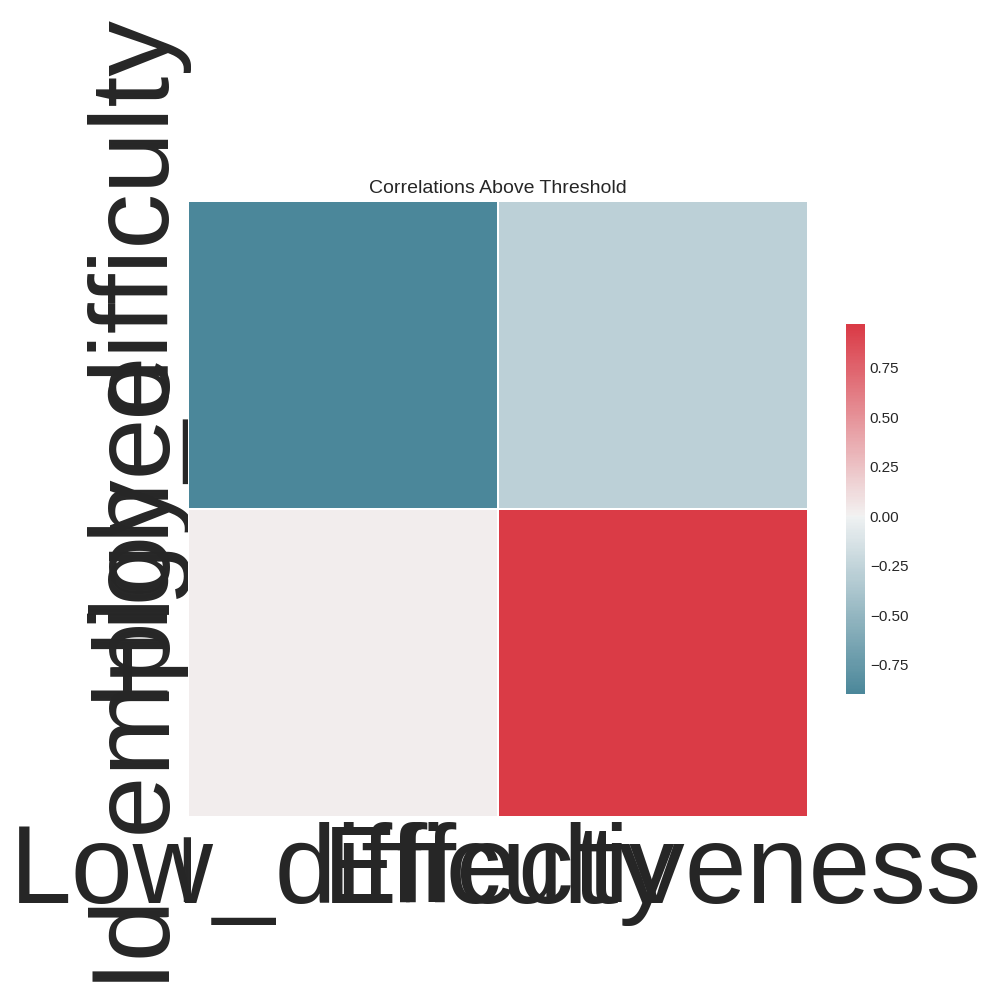

In [172]:
fs.plot_collinear()

In [173]:
Data=Data.drop(['Low_difficulty'], axis=1)
Data

Id_employee          Full_name Genre  Age Id_contract    Id_job  \
0            1001         LIAM SMITH     M   45       H-001  ASII1001   
1            1002       NOAH JOHNSON     M   25       H-002  ISII1002   
2            1003    OLIVER WILLIAMS     M   45       H-003  ASII1003   
3            1004       ELIJAH BROWN     M   38       H-004    ES1004   
4            1005      WILLIAM JONES     M   46       H-005  ASII1005   
...           ...                ...   ...  ...         ...       ...   
1838         2839     MADALYNN CERNA     F   24      H-1839    ES2839   
1839         2840  MELANI VIRAMONTES     F   29      H-1840  ISII2840   
1840         2841   LAYLANI GALDAMEZ     F   25      H-1841    ES2841   
1841         2842    MAZIKEEN OLIVER     F   21      H-1842  ISII2842   
1842         2843     BELLE ANDERSON     F   22      H-1843  DSII2843   

     Type_contract Modality  Branch                    Job   Salary Job level  \
0       Indefinite   Remote       2     Software Architect     60.0    Senior   
1        Temporary  On-Site       5   Software Engineer II     36.0    Senior   
2        Temporary   Hybrid       5     Software Architect     36.0    Senior   
3        Temporary   Remote       3    Software Specialist     36.0    Senior   
4       Indefinite   Remote       4     Software Architect     36.0    Senior   
...            ...      ...     ...                    ...      ...       ...   
1838     Temporary   Remote       2    Software Specialist      9.0    Junior   
1839    Indefinite   Hybrid       3    Software Engineer I      7.0    Junior   
1840     Temporary   Hybrid       2    Software Specialist     13.0    Junior   
1841     Temporary   Hybrid       6    Software Engineer I     13.0    Junior   
1842     Temporary   Hybrid       3  Software Developer II     12.0    Junior   

     Id_department  Id_project  Compliance   Effectiveness  Quality  \
0           SFT102           5        18.20           0.15    10.81   
1           SFT103           2        31.75           0.07    25.45   
2           SFT102           3        39.71           0.14    28.69   
3           SFT102           1        23.23           0.06    13.20   
4           SFT102           1         5.41           0.19     9.44   
...            ...         ...          ...            ...      ...   
1838        SFT102           6        19.07           0.96    11.57   
1839        SFT102           2        24.57           0.91    22.04   
1840        SFT103           3         4.61           0.95     7.81   
1841        SFT101           1        25.53           0.99    21.65   
1842        SFT102           2        22.48           0.98    21.22   

      Satisfaction  Productivity  Workteam  Complaints  High_difficulty  \
0             0.85          0.81      0.48          99             0.85   
1             0.74          0.83      0.69          63             0.57   
2             0.76          0.74      0.52          66             0.65   
3             0.75          0.82      0.54          19             0.57   
4             0.89          0.86      0.50          16             0.55   
...            ...           ...       ...         ...              ...   
1838          0.37          0.39      0.90          80             0.58   
1839          0.43          0.46      0.80          71             0.58   
1840          0.52          0.26      0.70          13             0.58   
1841          0.19          0.87      0.92          41             0.58   
1842          0.44          0.55      0.71          46             0.58   

      Medium_difficulty     City       Country  
0                  0.06  Basilea   Switzerland  
1                  0.00   Zurich   Switzerland  
2                  0.11     Lyon        France  
3                  0.00     Lyon        France  
4                  0.11  Touluse        France  
...                 ...      ...           ...  
1838               0.17   Madrid         Spain  
1839      

In [174]:
print(Data.shape)

(1843, 25)


In [175]:
Data.isnull().sum()

Id_employee          0
Full_name            0
Genre                0
Age                  0
Id_contract          0
Id_job               0
Type_contract        0
Modality             0
Branch               0
Job                  0
 Salary              0
Job level            0
Id_department        0
Id_project           0
Compliance           0
Effectiveness        0
Quality              0
Satisfaction         0
Productivity         0
Workteam             0
Complaints           0
High_difficulty      0
Medium_difficulty    0
City                 0
Country              0
dtype: int64


I export the union of the datasets in an excel file, to save a backup copy of the preprocessed data.

In [176]:
Data.to_excel('DataPreprocessed.xlsx', index = False)

# 5. Exploratory Data Analysis





At this point I perform an exploratory analysis of the data. Different graphs are generated that allow knowing the distribution of the data corresponding to the attributes that make up the dataset. These visualizations are produced using functions from previously imported libraries.


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'Id_employee'),
  Text(1, 0, 'Age'),
  Text(2, 0, 'Branch'),
  Text(3, 0, ' Salary'),
  Text(4, 0, 'Id_project'),
  Text(5, 0, 'Compliance '),
  Text(6, 0, 'Effectiveness'),
  Text(7, 0, 'Quality'),
  Text(8, 0, 'Satisfaction'),
  Text(9, 0, 'Productivity'),
  Text(10, 0, 'Workteam'),
  Text(11, 0, 'Complaints'),
  Text(12, 0, 'High_difficulty'),
  Text(13, 0, 'Medium_difficulty')])

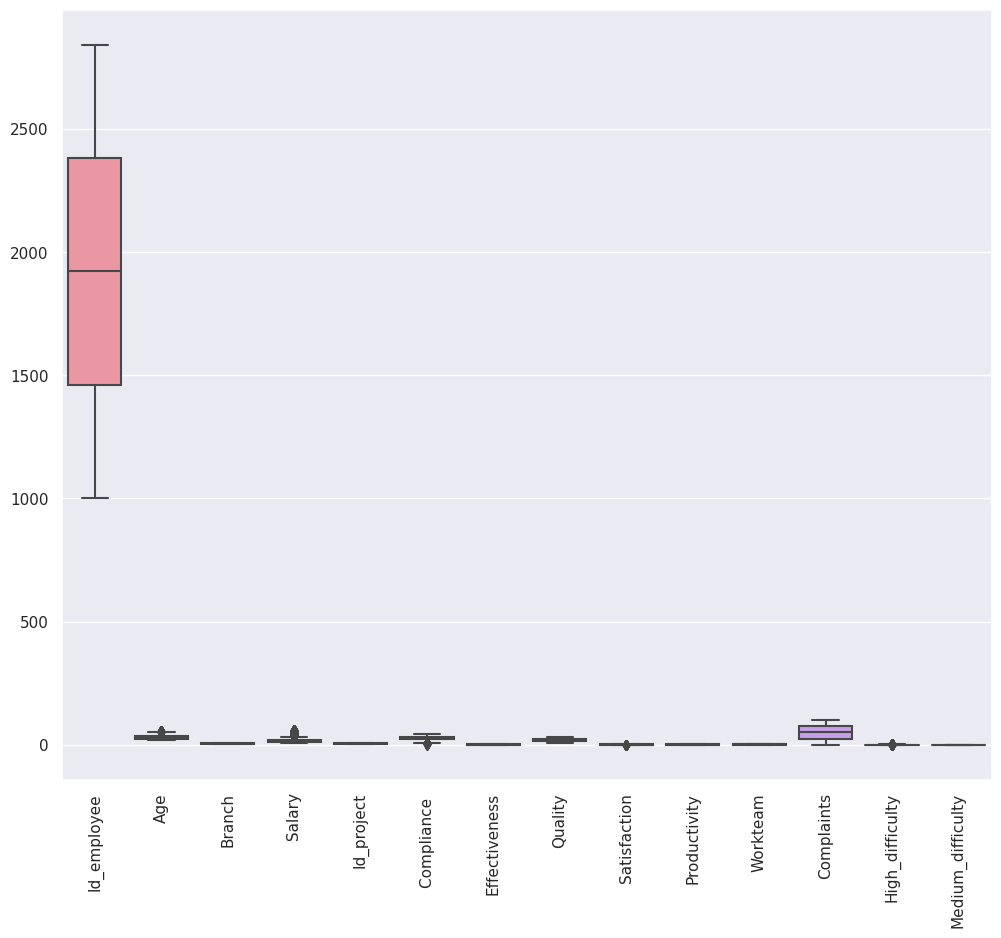

In [177]:
sns.set(rc={'figure.figsize':(12,10)})
sns.boxplot(data=Data)
plt.xticks(rotation=90)

En este punto se generan diferentes de graficos que permiten conocer la distribución de los datos ecorrespodientes a los atributos que conforman el dataset. Estas visualizaciones se producen utilizando funciones de las librerias previamente importadas.

In [178]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1843 entries, 0 to 1842
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Id_employee        1843 non-null   int64  
 1   Full_name          1843 non-null   object 
 2   Genre              1843 non-null   object 
 3   Age                1843 non-null   int64  
 4   Id_contract        1843 non-null   object 
 5   Id_job             1843 non-null   object 
 6   Type_contract      1843 non-null   object 
 7   Modality           1843 non-null   object 
 8   Branch             1843 non-null   int64  
 9   Job                1843 non-null   object 
 10   Salary            1843 non-null   float64
 11  Job level          1843 non-null   object 
 12  Id_department      1843 non-null   object 
 13  Id_project         1843 non-null   int64  
 14  Compliance         1843 non-null   float64
 15  Effectiveness      1843 non-null   float64
 16  Quality            1843 

A descriptive analysis of the attributes that make up the dataset is performed. For numerical attributes, the main measures of centrality and dispersion are generated; While for categorical attributes a list of the values ​​present in the dataset is generated.

In [179]:
def descripcionDatosDataset(datos):
    print("Cantidad de filas:", datos.shape[0])
    print("Cantidad de columnas:", datos.shape[1])
    print('-'*100)
    for columna in datos.columns:
        valoresDescripcion = ''
        tipo = ''
        if datos[columna].dtype == 'float64' or datos[columna].dtype == 'int64':
            tipo = 'numérico'
            valoresDescripcion = datos[columna].agg(['min', 'max', 'mean', 'std', 'median'])
        else:
            tipo = 'nominal' #categórico | string | no-numérico
            valoresDescripcion = {'valoresPresentes' : datos[columna].unique(),
                                  'cantidadNulos' : datos[columna].isna().sum()}
                                 #'conteoValores' : pd.value_counts(datos[columna])}
        print('Columna: ' + columna)
        print('Tipo de datos: ' + tipo)
        print('Descripción de valores:')
        if tipo == 'numérico':
            print(valoresDescripcion)
        else:
            print('-- Valores presentes (10 primeros): ' + str(valoresDescripcion['valoresPresentes'][:10]))
            pctNulos = (valoresDescripcion['cantidadNulos'] / datos.shape[0]) * 100
            print('-- Cantidad de nulos: ' + str(valoresDescripcion['cantidadNulos']) + ' = ' + "{0:.2f}".format(pctNulos) + '%')
        print('-'*100)

In [180]:
descripcionDatosDataset(Data)

Cantidad de filas: 1843
Cantidad de columnas: 25
----------------------------------------------------------------------------------------------------
Columna: Id_employee
Tipo de datos: numérico
Descripción de valores:
min       1001.000000
max       2843.000000
mean      1922.000000
std        532.172591
median    1922.000000
Name: Id_employee, dtype: float64
----------------------------------------------------------------------------------------------------
Columna: Full_name
Tipo de datos: nominal
Descripción de valores:
-- Valores presentes (10 primeros): ['LIAM SMITH' 'NOAH JOHNSON' 'OLIVER WILLIAMS' 'ELIJAH BROWN'
 'WILLIAM JONES' 'JAMES GARCIA' 'BENJAMIN MILLER' 'LUCAS DAVIS'
 'HENRY RODRIGUEZ' 'ALEXANDER MARTINEZ']
-- Cantidad de nulos: 0 = 0.00%
----------------------------------------------------------------------------------------------------
Columna: Genre
Tipo de datos: nominal
Descripción de valores:
-- Valores presentes (10 primeros): ['M' 'F']
-- Cantidad de nulos: 0 = 

<Axes: xlabel='Job level', ylabel='count'>

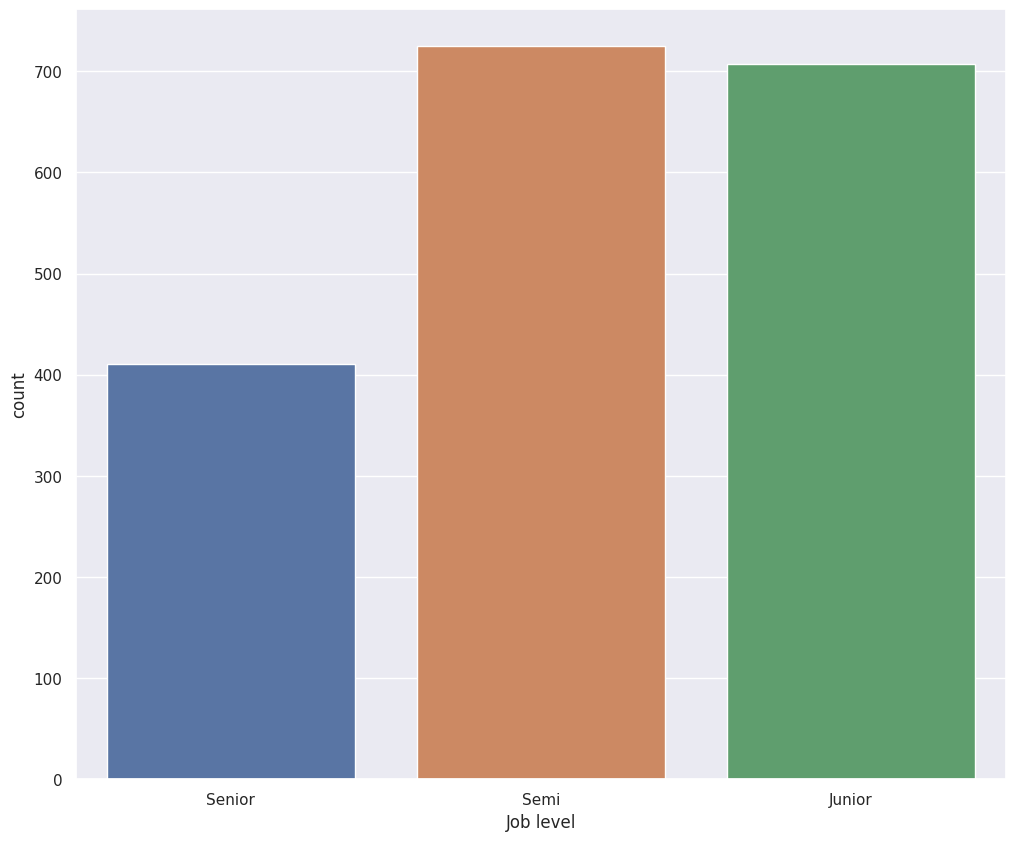

In [181]:
sns.countplot(x="Job level", data=Data)

<Axes: xlabel='Modality', ylabel='count'>

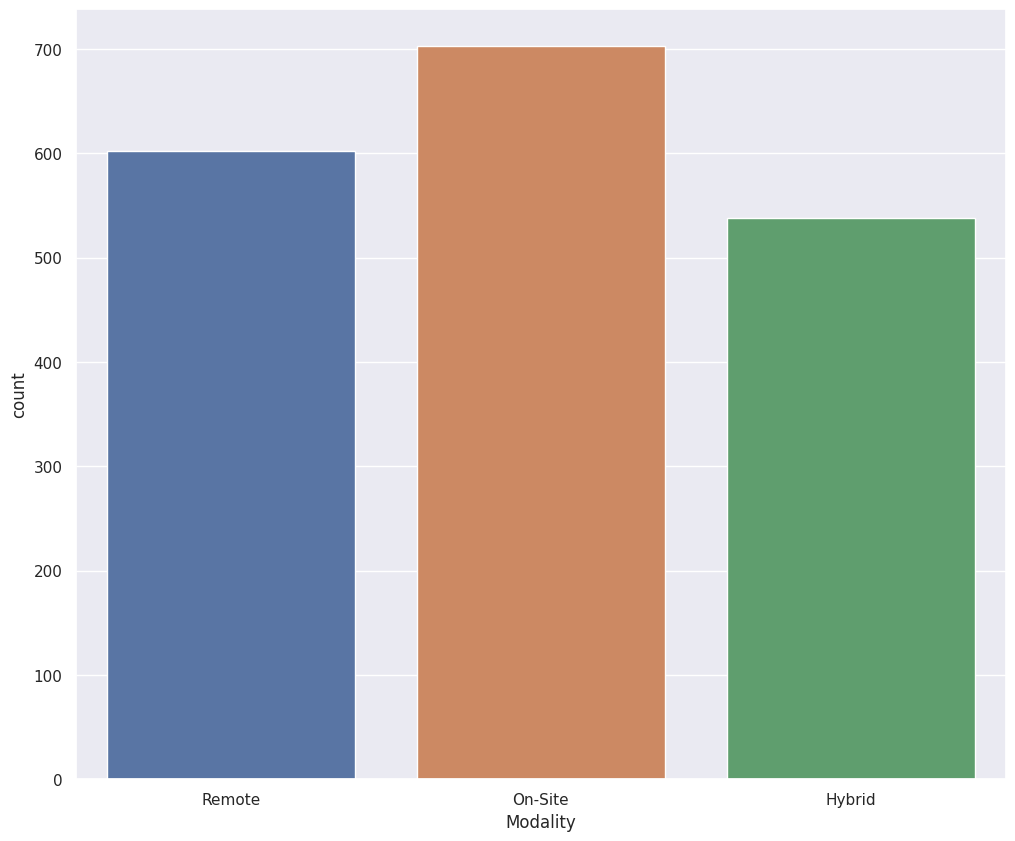

In [182]:
sns.countplot(x="Modality", data=Data)

<Axes: ylabel='Job'>

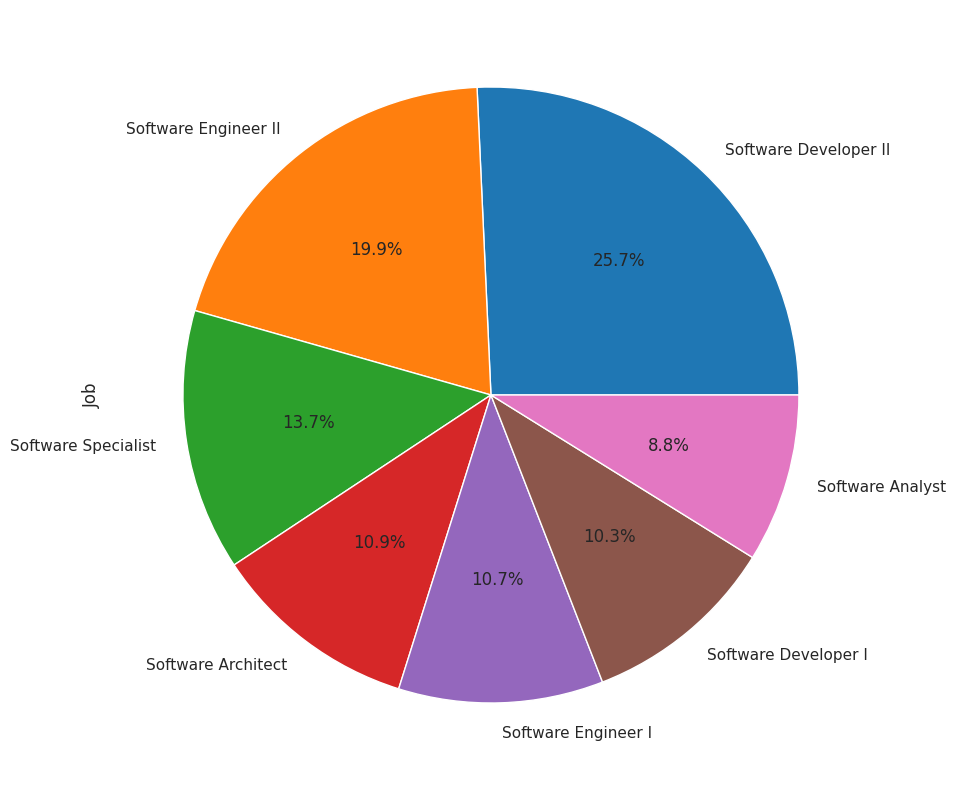

In [183]:
torta1=Data.Job.value_counts()
torta1.plot.pie(autopct="%1.1f%%")

<Axes: xlabel='Type_contract', ylabel='count'>

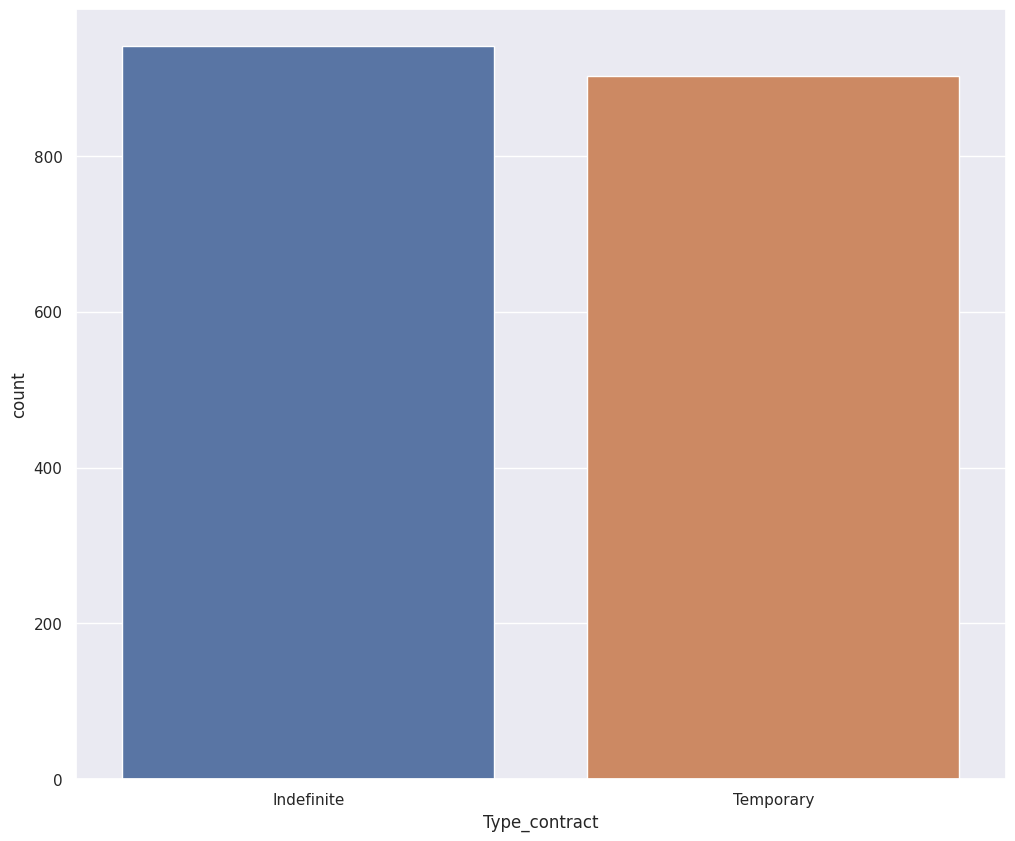

In [184]:
sns.countplot(x="Type_contract", data=Data)

<Axes: ylabel='City'>

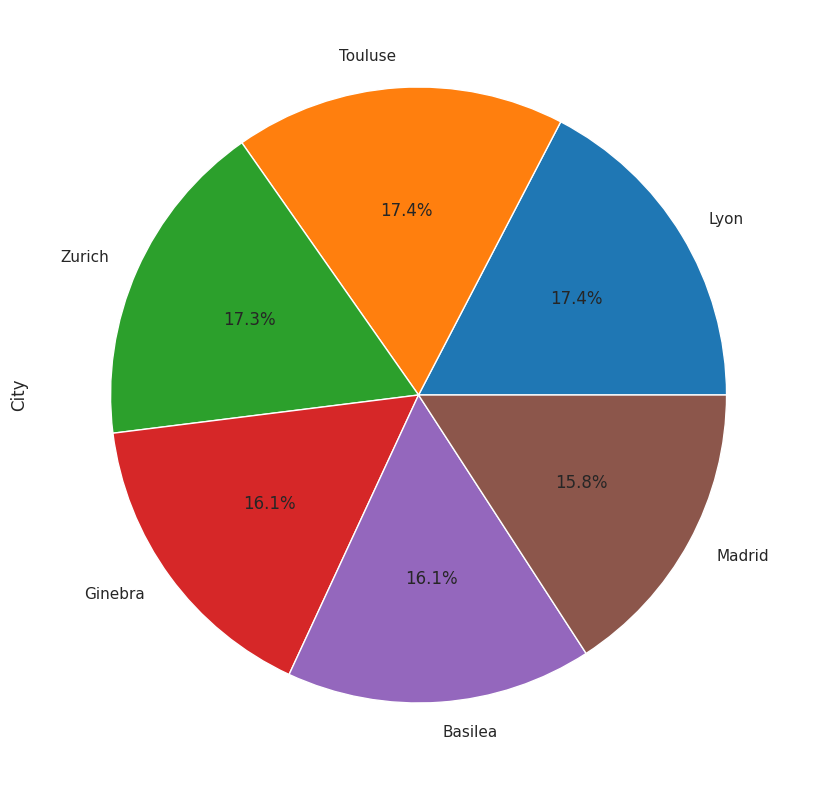

In [185]:
torta=Data.City.value_counts()
torta.plot.pie(autopct="%1.1f%%")

<Axes: xlabel='Age', ylabel='count'>

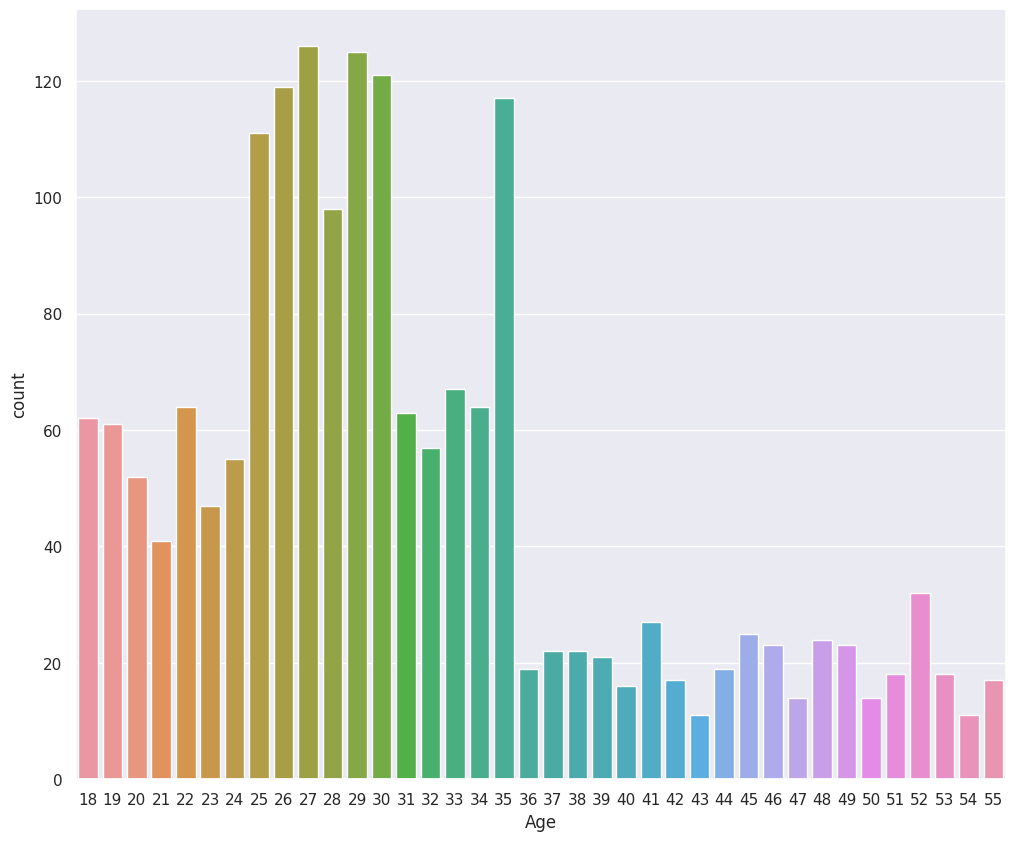

In [186]:
sns.countplot(x="Age", data=Data)

<Axes: xlabel='count', ylabel=' Salary'>

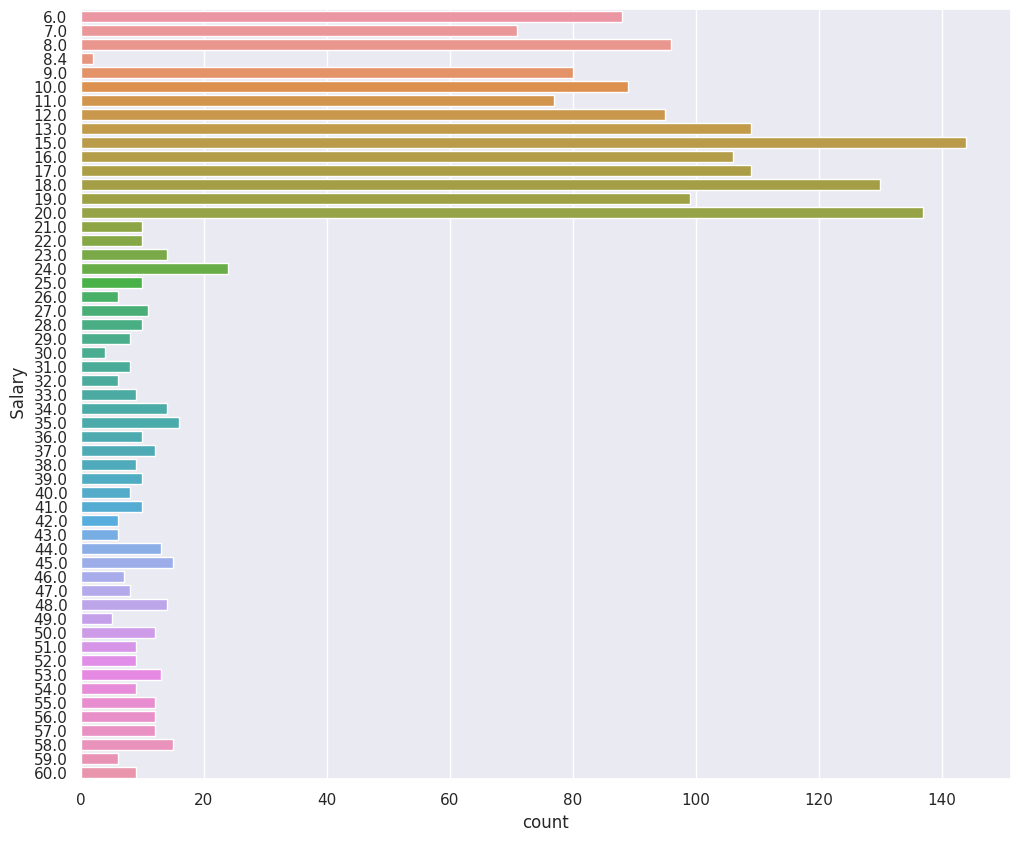

In [187]:
sns.countplot(y=" Salary", data=Data)

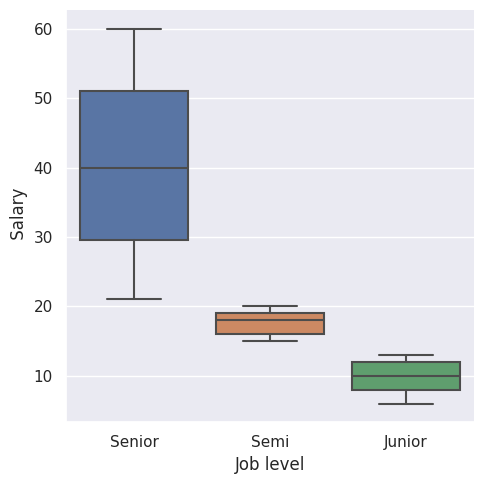

In [188]:
sns.catplot(x="Job level", y=" Salary", data=Data, kind="box")
plt.show()

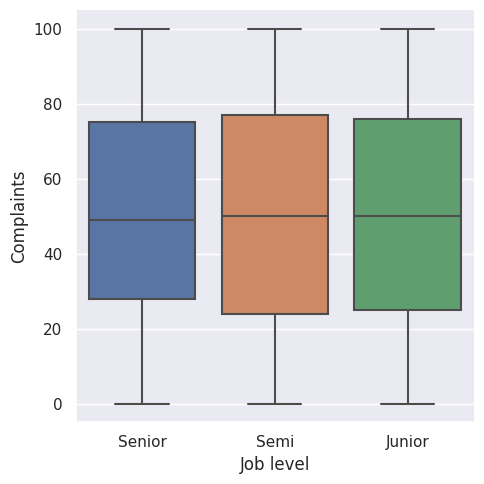

In [189]:
sns.catplot(x="Job level", y="Complaints", data=Data, kind="box")
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: UserWarning:



`distplot` is a dep

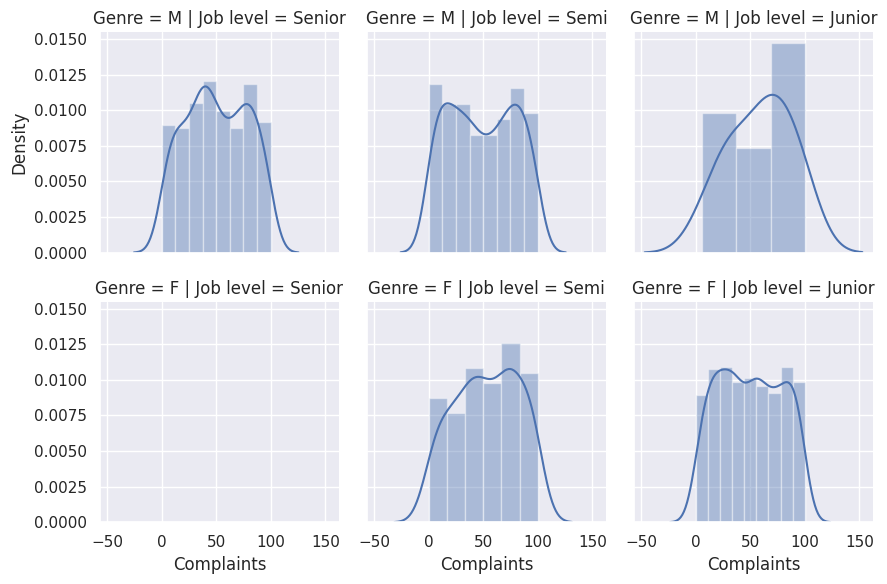

In [190]:
sns.set(font_scale=1)
g = sns.FacetGrid(Data, row='Genre',col='Job level')
g.map(sns.distplot, "Complaints")
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: UserWarning:



`distplot` is a dep

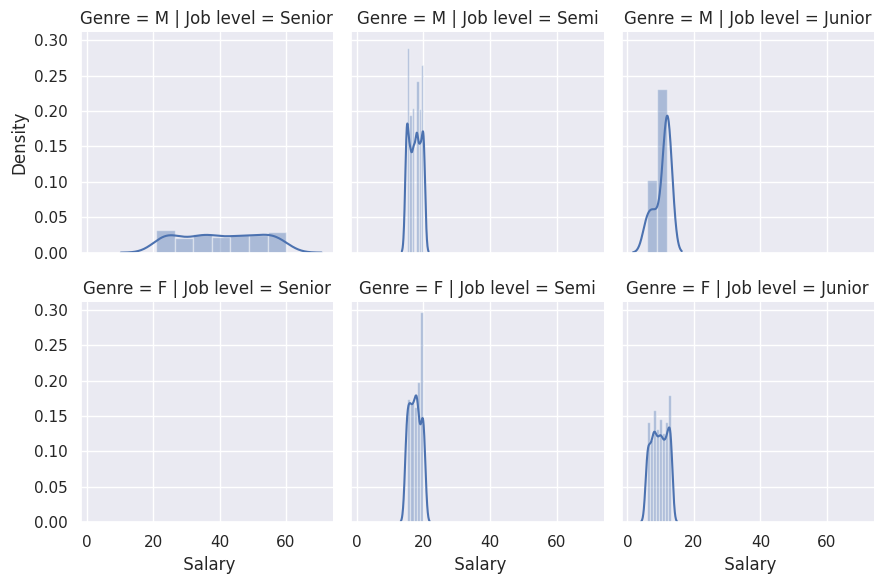

In [191]:
sns.set(font_scale=1)
g = sns.FacetGrid(Data, row='Genre',col='Job level')
g.map(sns.distplot, " Salary")
plt.show()

<Axes: >

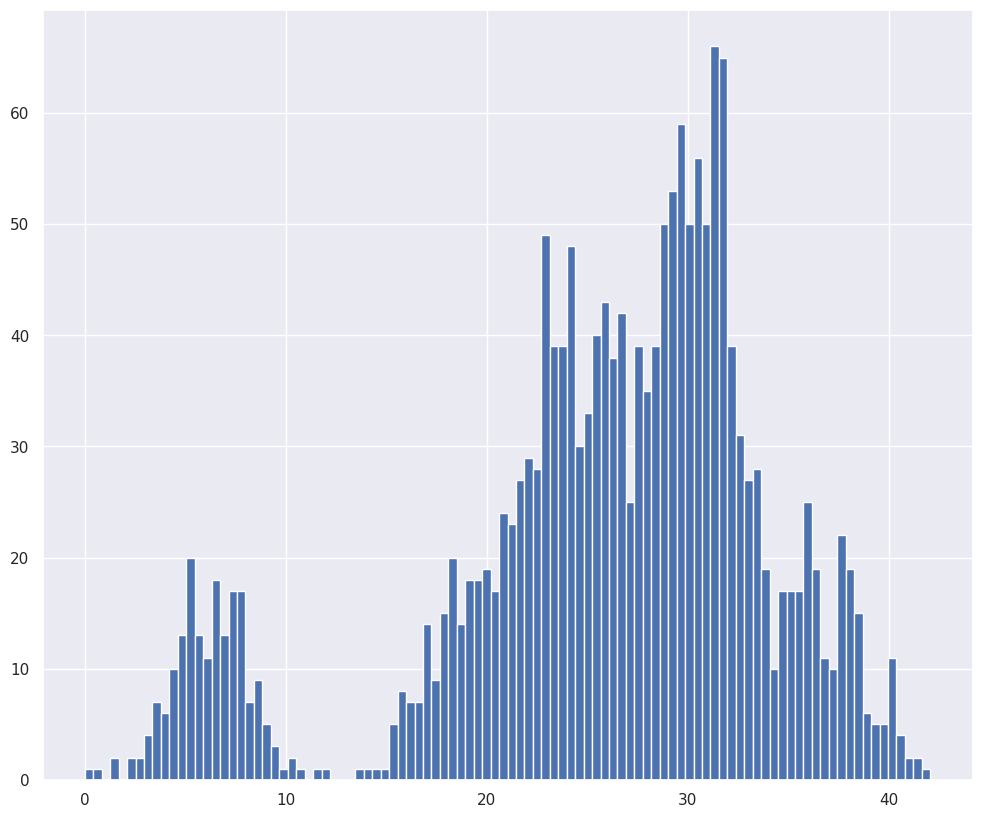

In [192]:
Data['Compliance '].hist(bins=100)

<Axes: >

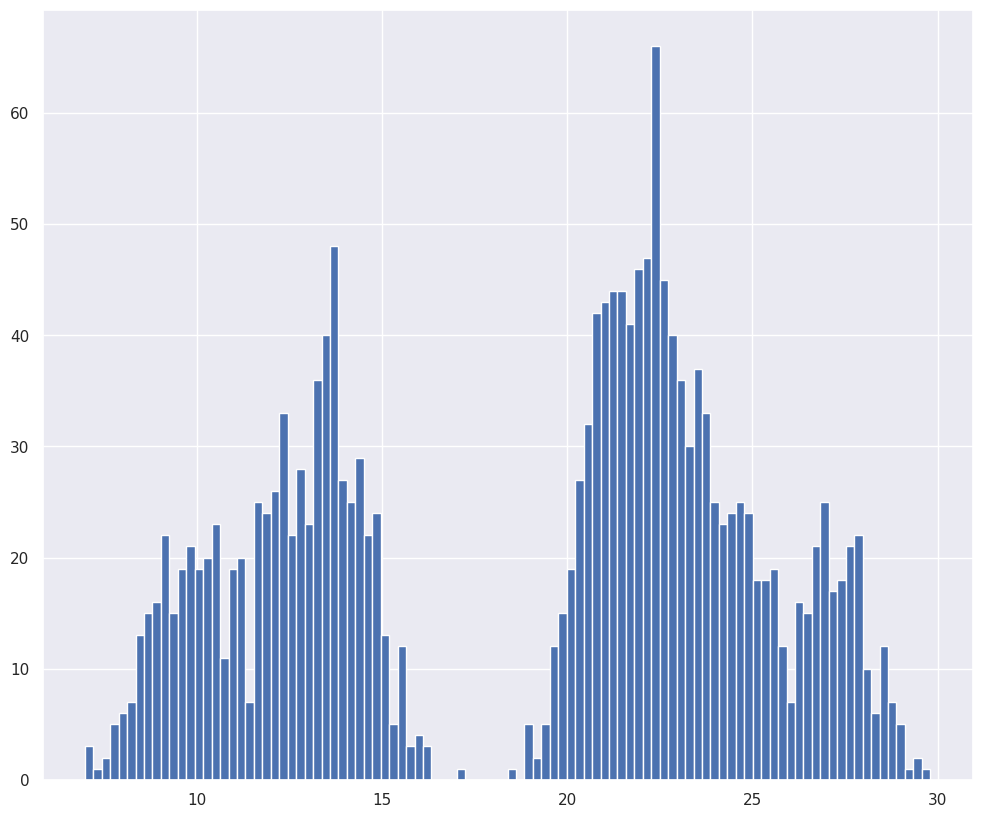

In [193]:
Data['Quality'].hist(bins=100)

<Axes: >

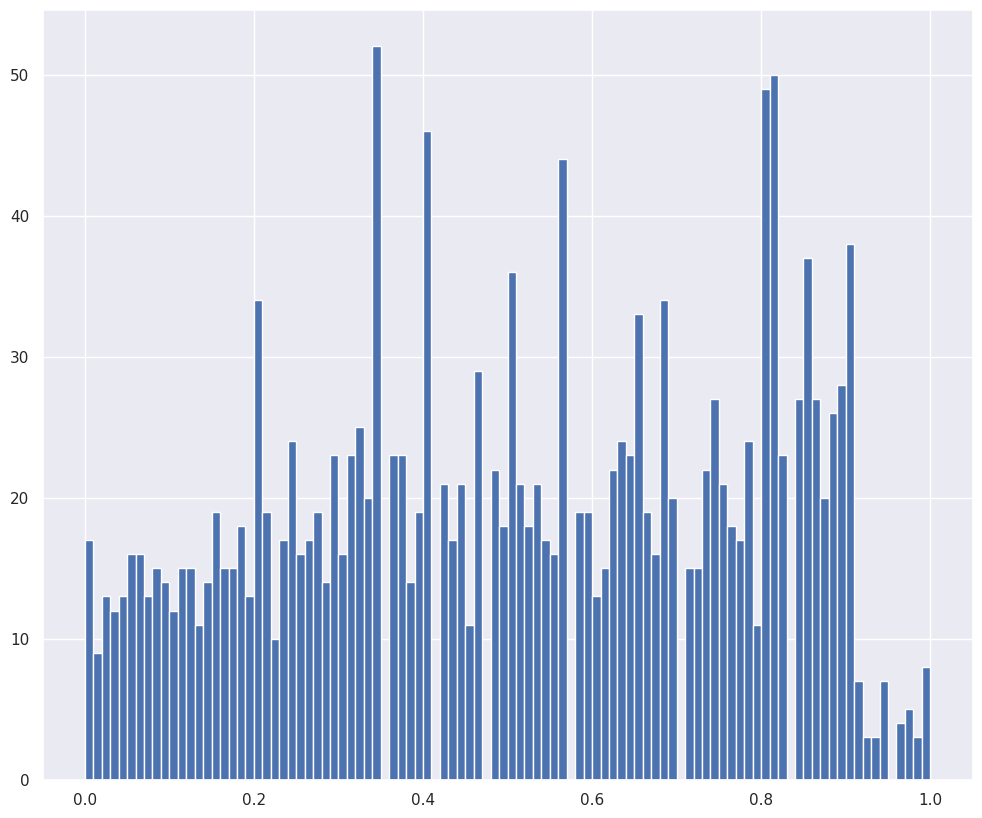

In [194]:
Data['Effectiveness'].hist(bins=100)

<Axes: >

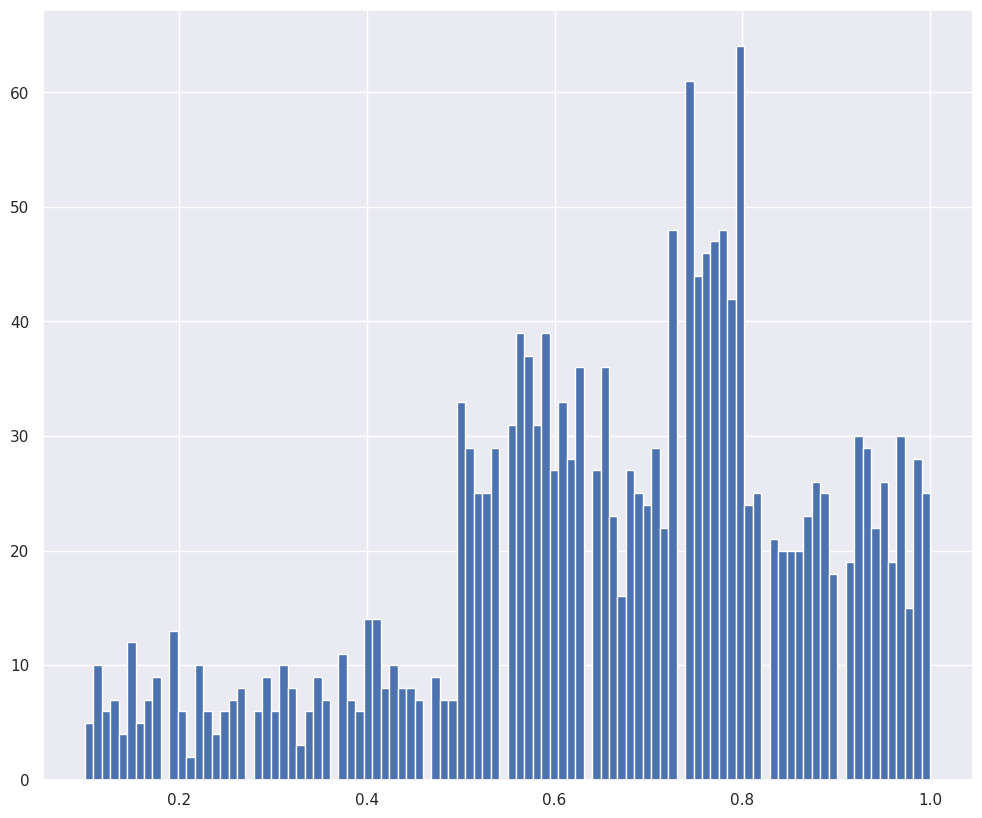

In [195]:
Data['Satisfaction'].hist(bins=100)

<Axes: >

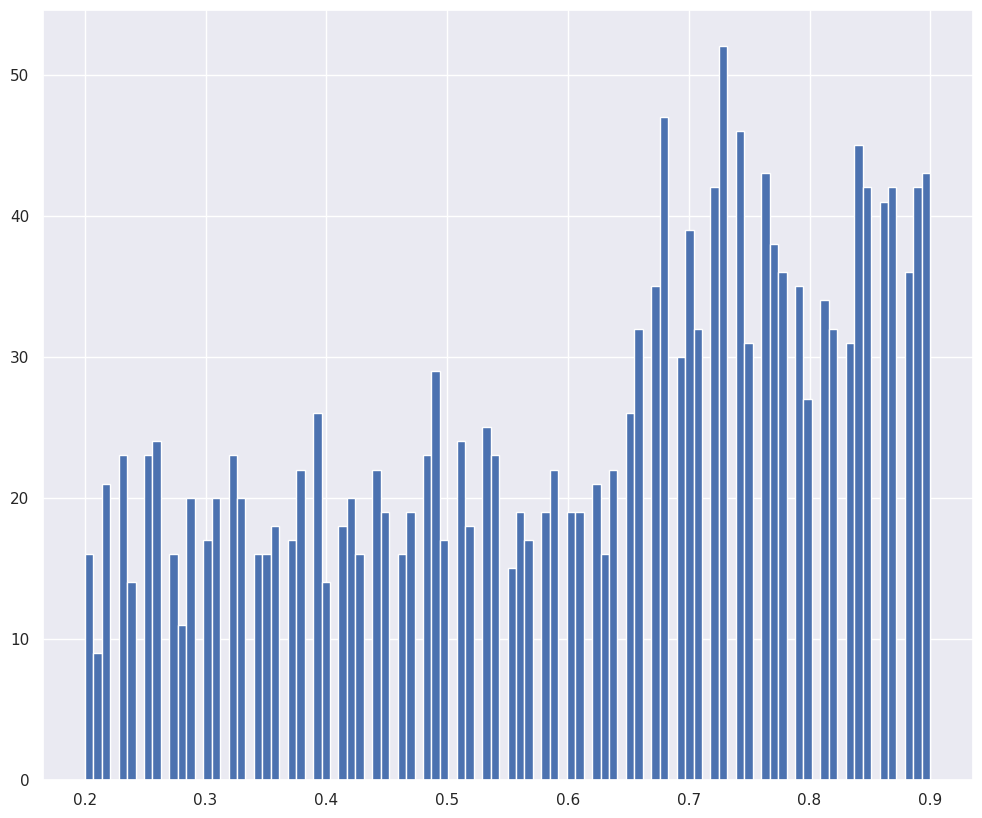

In [196]:
Data['Productivity'].hist(bins=100)

<Axes: >

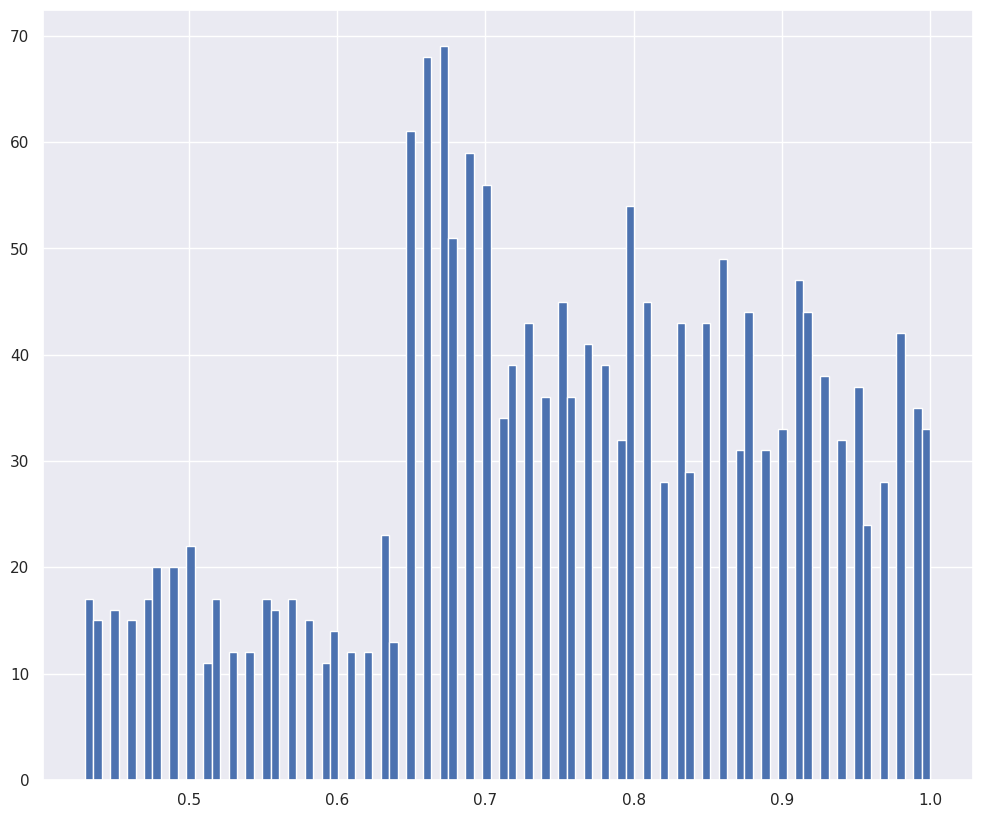

In [197]:
Data['Workteam'].hist(bins=100)

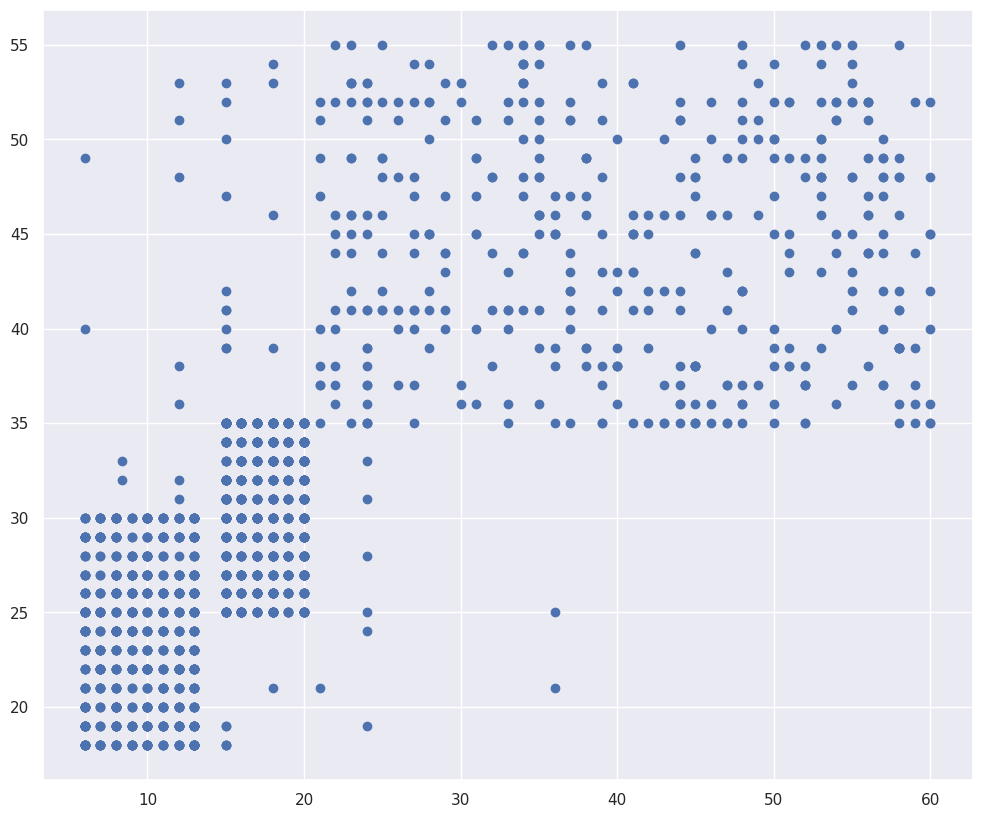

In [198]:
plt.scatter(Data[' Salary'], Data['Age'])
plt.show()

In [199]:
Feat = ['Compliance ', 'Effectiveness', 'Quality',
       'Satisfaction', 'Productivity', 'Workteam']
F = Data[Feat]
F.head()

Compliance   Effectiveness  Quality  Satisfaction  Productivity  Workteam
0        18.20           0.15    10.81          0.85          0.81      0.48
1        31.75           0.07    25.45          0.74          0.83      0.69
2        39.71           0.14    28.69          0.76          0.74      0.52
3        23.23           0.06    13.20          0.75          0.82      0.54
4         5.41           0.19     9.44          0.89          0.86      0.50

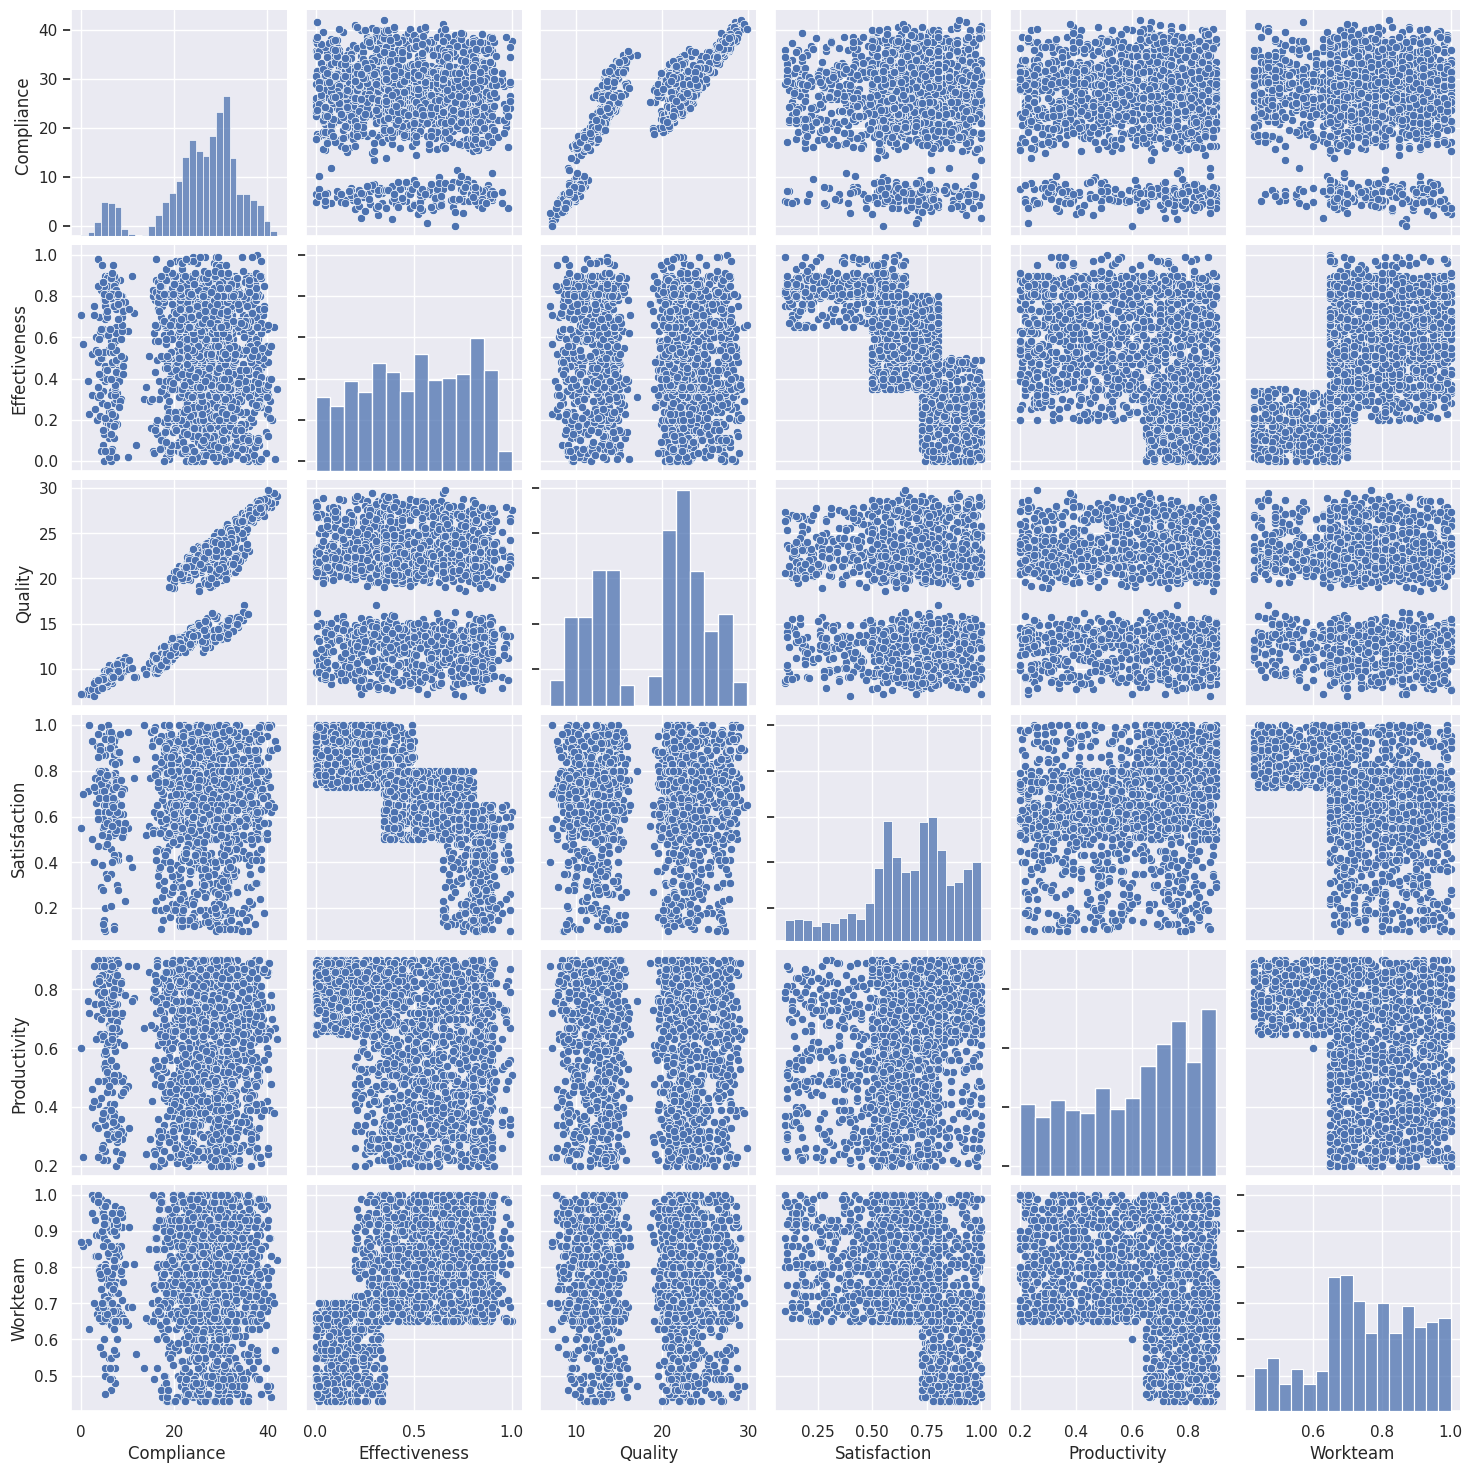

In [200]:
sns.pairplot(F)

<ipython-input-201-d7cd18e8bc7f>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



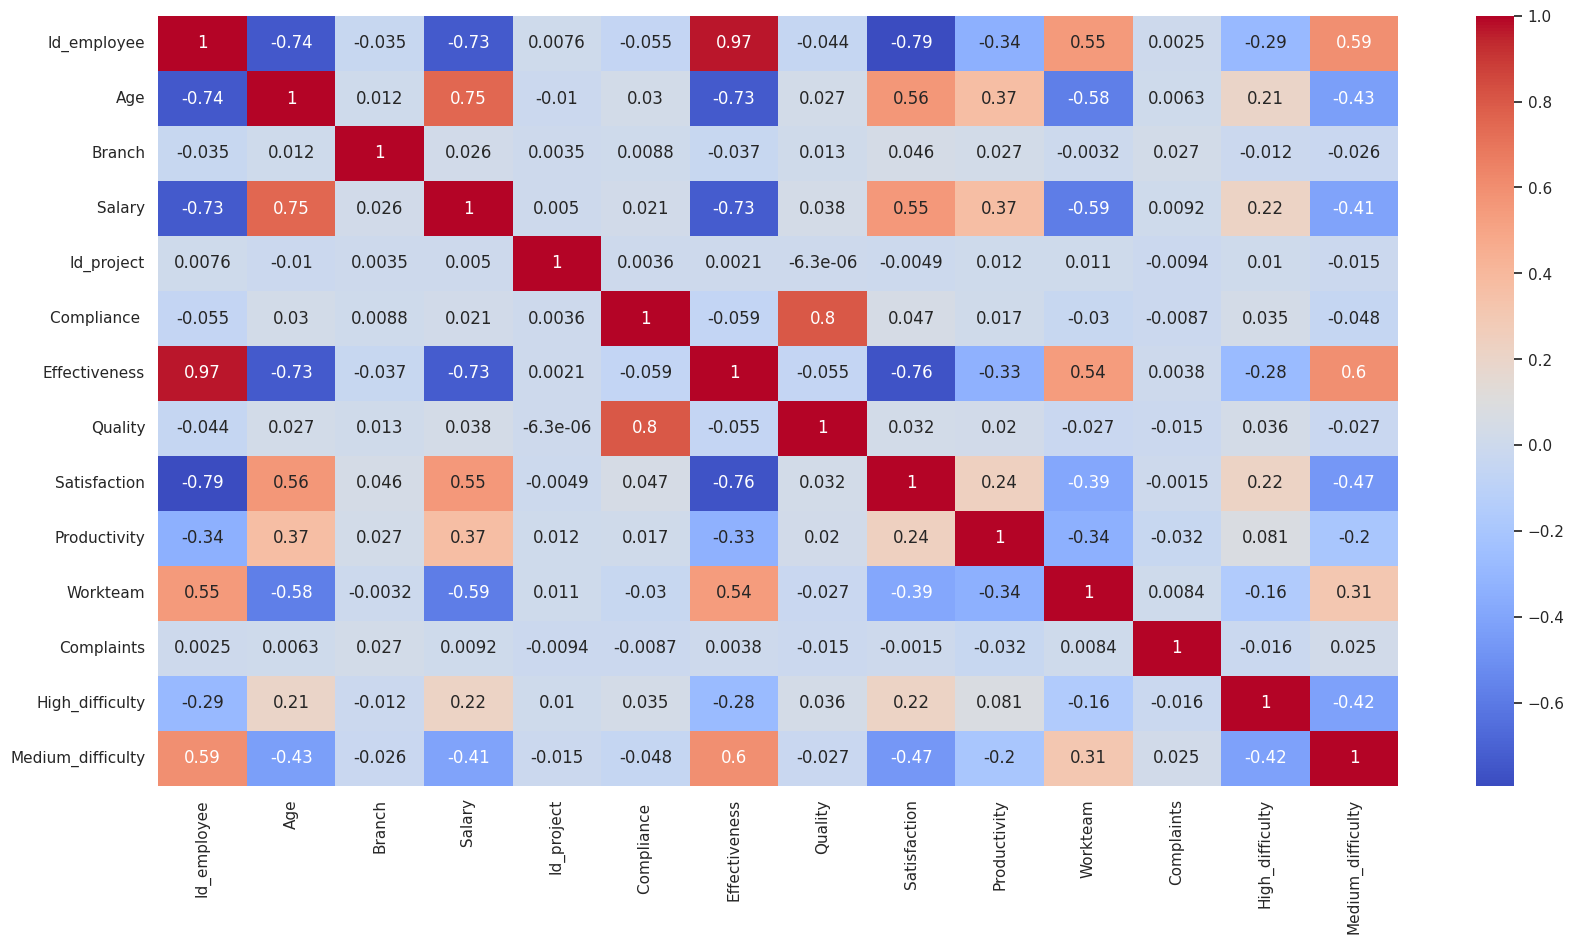

In [201]:
correlation_matrix = Data.corr()
plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

I export the union of the datasets in an excel file, to save a backup copy of the explorated data.

In [202]:
Data.to_excel('DataExplored.xlsx', index = False)

# 6. Data Preprocessing II

I analyze the attributes that have a linear correlation greater than 90%.
I identify that there are no attributes that are highly correlated.

In [203]:
fs.identify_collinear(correlation_threshold=0.90)

1 features with a correlation magnitude greater than 0.90.



/content/Feature_selector.py:192: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.

/content/Feature_selector.py:222: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [204]:
collinear_features = fs.ops['collinear']
collinear=fs.record_collinear
collinear.sort_values(by='corr_value', ascending=False)

drop_feature corr_feature  corr_value
0  Effectiveness  Id_employee    0.970872

In [205]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1843 entries, 0 to 1842
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Id_employee        1843 non-null   int64  
 1   Full_name          1843 non-null   object 
 2   Genre              1843 non-null   object 
 3   Age                1843 non-null   int64  
 4   Id_contract        1843 non-null   object 
 5   Id_job             1843 non-null   object 
 6   Type_contract      1843 non-null   object 
 7   Modality           1843 non-null   object 
 8   Branch             1843 non-null   int64  
 9   Job                1843 non-null   object 
 10   Salary            1843 non-null   float64
 11  Job level          1843 non-null   object 
 12  Id_department      1843 non-null   object 
 13  Id_project         1843 non-null   int64  
 14  Compliance         1843 non-null   float64
 15  Effectiveness      1843 non-null   float64
 16  Quality            1843 

I select some attributes that are not relevant to the analysis and discard them.

In [206]:
Data=Data.drop(columns=['Full_name', 'Id_job','Id_contract', 'Id_project', 'Id_department',  'City',  'Country', 'Job'], axis=1)
Data

Id_employee Genre  Age Type_contract Modality  Branch   Salary  \
0            1001     M   45    Indefinite   Remote       2     60.0   
1            1002     M   25     Temporary  On-Site       5     36.0   
2            1003     M   45     Temporary   Hybrid       5     36.0   
3            1004     M   38     Temporary   Remote       3     36.0   
4            1005     M   46    Indefinite   Remote       4     36.0   
...           ...   ...  ...           ...      ...     ...      ...   
1838         2839     F   24     Temporary   Remote       2      9.0   
1839         2840     F   29    Indefinite   Hybrid       3      7.0   
1840         2841     F   25     Temporary   Hybrid       2     13.0   
1841         2842     F   21     Temporary   Hybrid       6     13.0   
1842         2843     F   22     Temporary   Hybrid       3     12.0   

     Job level  Compliance   Effectiveness  Quality  Satisfaction  \
0       Senior        18.20           0.15    10.81          0.85   
1       Senior        31.75           0.07    25.45          0.74   
2       Senior        39.71           0.14    28.69          0.76   
3       Senior        23.23           0.06    13.20          0.75   
4       Senior         5.41           0.19     9.44          0.89   
...        ...          ...            ...      ...           ...   
1838    Junior        19.07           0.96    11.57          0.37   
1839    Junior        24.57           0.91    22.04          0.43   
1840    Junior         4.61           0.95     7.81          0.52   
1841    Junior        25.53           0.99    21.65          0.19   
1842    Junior        22.48           0.98    21.22          0.44   

      Productivity  Workteam  Complaints  High_difficulty  Medium_difficulty  
0             0.81      0.48          99             0.85               0.06  
1             0.83      0.69          63             0.57               0.00  
2             0.74      0.52          66             0.65               0.11  
3             0.82      0.54          19             0.57               0.00  
4             0.86      0.50          16             0.55               0.11  
...            ...       ...         ...              ...                ...  
1838          0.39      0.90          80             0.58               0.17  
1839          0.46      0.80          71             0.58               0.17  
1840          0.26      0.70          13             0.58               0.17  
1841          0.87      0.92          41             0.58               0.17  
1842          0.55      0.71          46             0.58               0.17  

[1843 rows x 17 columns]

In [207]:
from sklearn.preprocessing import LabelEncoder
columns_to_transform = ['Modality', 'Type_contract']
for column in columns_to_transform:
    label_encoder = LabelEncoder()
    Data[column] = label_encoder.fit_transform(Data[column])
Data

Id_employee Genre  Age  Type_contract  Modality  Branch   Salary  \
0            1001     M   45              0         2       2     60.0   
1            1002     M   25              1         1       5     36.0   
2            1003     M   45              1         0       5     36.0   
3            1004     M   38              1         2       3     36.0   
4            1005     M   46              0         2       4     36.0   
...           ...   ...  ...            ...       ...     ...      ...   
1838         2839     F   24              1         2       2      9.0   
1839         2840     F   29              0         0       3      7.0   
1840         2841     F   25              1         0       2     13.0   
1841         2842     F   21              1         0       6     13.0   
1842         2843     F   22              1         0       3     12.0   

     Job level  Compliance   Effectiveness  Quality  Satisfaction  \
0       Senior        18.20           0.15    10.81          0.85   
1       Senior        31.75           0.07    25.45          0.74   
2       Senior        39.71           0.14    28.69          0.76   
3       Senior        23.23           0.06    13.20          0.75   
4       Senior         5.41           0.19     9.44          0.89   
...        ...          ...            ...      ...           ...   
1838    Junior        19.07           0.96    11.57          0.37   
1839    Junior        24.57           0.91    22.04          0.43   
1840    Junior         4.61           0.95     7.81          0.52   
1841    Junior        25.53           0.99    21.65          0.19   
1842    Junior        22.48           0.98    21.22          0.44   

      Productivity  Workteam  Complaints  High_difficulty  Medium_difficulty  
0             0.81      0.48          99             0.85               0.06  
1             0.83      0.69          63             0.57               0.00  
2             0.74      0.52          66             0.65               0.11  
3             0.82      0.54          19             0.57               0.00  
4             0.86      0.50          16             0.55               0.11  
...            ...       ...         ...              ...                ...  
1838          0.39      0.90          80             0.58               0.17  
1839          0.46      0.80          71             0.58               0.17  
1840          0.26      0.70          13             0.58               0.17  
1841          0.87      0.92          41             0.58               0.17  
1842          0.55      0.71          46             0.58               0.17  

[1843 rows x 17 columns]

In [208]:
Data = pd.get_dummies(Data)
Data

Id_employee  Age  Type_contract  Modality  Branch   Salary  Compliance   \
0            1001   45              0         2       2     60.0        18.20   
1            1002   25              1         1       5     36.0        31.75   
2            1003   45              1         0       5     36.0        39.71   
3            1004   38              1         2       3     36.0        23.23   
4            1005   46              0         2       4     36.0         5.41   
...           ...  ...            ...       ...     ...      ...          ...   
1838         2839   24              1         2       2      9.0        19.07   
1839         2840   29              0         0       3      7.0        24.57   
1840         2841   25              1         0       2     13.0         4.61   
1841         2842   21              1         0       6     13.0        25.53   
1842         2843   22              1         0       3     12.0        22.48   

      Effectiveness  Quality  Satisfaction  Productivity  Workteam  \
0              0.15    10.81          0.85          0.81      0.48   
1              0.07    25.45          0.74          0.83      0.69   
2              0.14    28.69          0.76          0.74      0.52   
3              0.06    13.20          0.75          0.82      0.54   
4              0.19     9.44          0.89          0.86      0.50   
...             ...      ...           ...           ...       ...   
1838           0.96    11.57          0.37          0.39      0.90   
1839           0.91    22.04          0.43          0.46      0.80   
1840           0.95     7.81          0.52          0.26      0.70   
1841           0.99    21.65          0.19          0.87      0.92   
1842           0.98    21.22          0.44          0.55      0.71   

      Complaints  High_difficulty  Medium_difficulty  Genre_F  Genre_M  \
0             99             0.85               0.06        0        1   
1             63             0.57               0.00        0        1   
2             66             0.65               0.11        0        1   
3             19             0.57               0.00        0        1   
4             16             0.55               0.11        0        1   
...          ...              ...                ...      ...      ...   
1838          80             0.58               0.17        1        0   
1839          71             0.58               0.17        1        0   
1840          13             0.58               0.17        1        0   
1841          41             0.58               0.17        1        0   
1842          46             0.58               0.17        1        0   

      Job level_Junior  Job level_Semi  Job level_Senior  
0                    0               0                 1  
1                    0               0                 1  
2                    0               0                 1  
3                    0               0                 1  
4                    0               0                 1  
...                ...             ...               ...  
1838                 1               0                 0  
1839                 1               0                 0  
1840                 1               0                 0  
1841                 1               0                 0  
1842                 1               0                 0  

[1843 rows x 20 columns]

In [209]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1843 entries, 0 to 1842
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Id_employee        1843 non-null   int64  
 1   Age                1843 non-null   int64  
 2   Type_contract      1843 non-null   int64  
 3   Modality           1843 non-null   int64  
 4   Branch             1843 non-null   int64  
 5    Salary            1843 non-null   float64
 6   Compliance         1843 non-null   float64
 7   Effectiveness      1843 non-null   float64
 8   Quality            1843 non-null   float64
 9   Satisfaction       1843 non-null   float64
 10  Productivity       1843 non-null   float64
 11  Workteam           1843 non-null   float64
 12  Complaints         1843 non-null   int64  
 13  High_difficulty    1843 non-null   float64
 14  Medium_difficulty  1843 non-null   float64
 15  Genre_F            1843 non-null   uint8  
 16  Genre_M            1843 

In [210]:
Data.shape

(1843, 20)

In [211]:
Data

Id_employee  Age  Type_contract  Modality  Branch   Salary  Compliance   \
0            1001   45              0         2       2     60.0        18.20   
1            1002   25              1         1       5     36.0        31.75   
2            1003   45              1         0       5     36.0        39.71   
3            1004   38              1         2       3     36.0        23.23   
4            1005   46              0         2       4     36.0         5.41   
...           ...  ...            ...       ...     ...      ...          ...   
1838         2839   24              1         2       2      9.0        19.07   
1839         2840   29              0         0       3      7.0        24.57   
1840         2841   25              1         0       2     13.0         4.61   
1841         2842   21              1         0       6     13.0        25.53   
1842         2843   22              1         0       3     12.0        22.48   

      Effectiveness  Quality  Satisfaction  Productivity  Workteam  \
0              0.15    10.81          0.85          0.81      0.48   
1              0.07    25.45          0.74          0.83      0.69   
2              0.14    28.69          0.76          0.74      0.52   
3              0.06    13.20          0.75          0.82      0.54   
4              0.19     9.44          0.89          0.86      0.50   
...             ...      ...           ...           ...       ...   
1838           0.96    11.57          0.37          0.39      0.90   
1839           0.91    22.04          0.43          0.46      0.80   
1840           0.95     7.81          0.52          0.26      0.70   
1841           0.99    21.65          0.19          0.87      0.92   
1842           0.98    21.22          0.44          0.55      0.71   

      Complaints  High_difficulty  Medium_difficulty  Genre_F  Genre_M  \
0             99             0.85               0.06        0        1   
1             63             0.57               0.00        0        1   
2             66             0.65               0.11        0        1   
3             19             0.57               0.00        0        1   
4             16             0.55               0.11        0        1   
...          ...              ...                ...      ...      ...   
1838          80             0.58               0.17        1        0   
1839          71             0.58               0.17        1        0   
1840          13             0.58               0.17        1        0   
1841          41             0.58               0.17        1        0   
1842          46             0.58               0.17        1        0   

      Job level_Junior  Job level_Semi  Job level_Senior  
0                    0               0                 1  
1                    0               0                 1  
2                    0               0                 1  
3                    0               0                 1  
4                    0               0                 1  
...                ...             ...               ...  
1838                 1               0                 0  
1839                 1               0                 0  
1840                 1               0                 0  
1841                 1               0                 0  
1842                 1               0                 0  

[1843 rows x 20 columns]

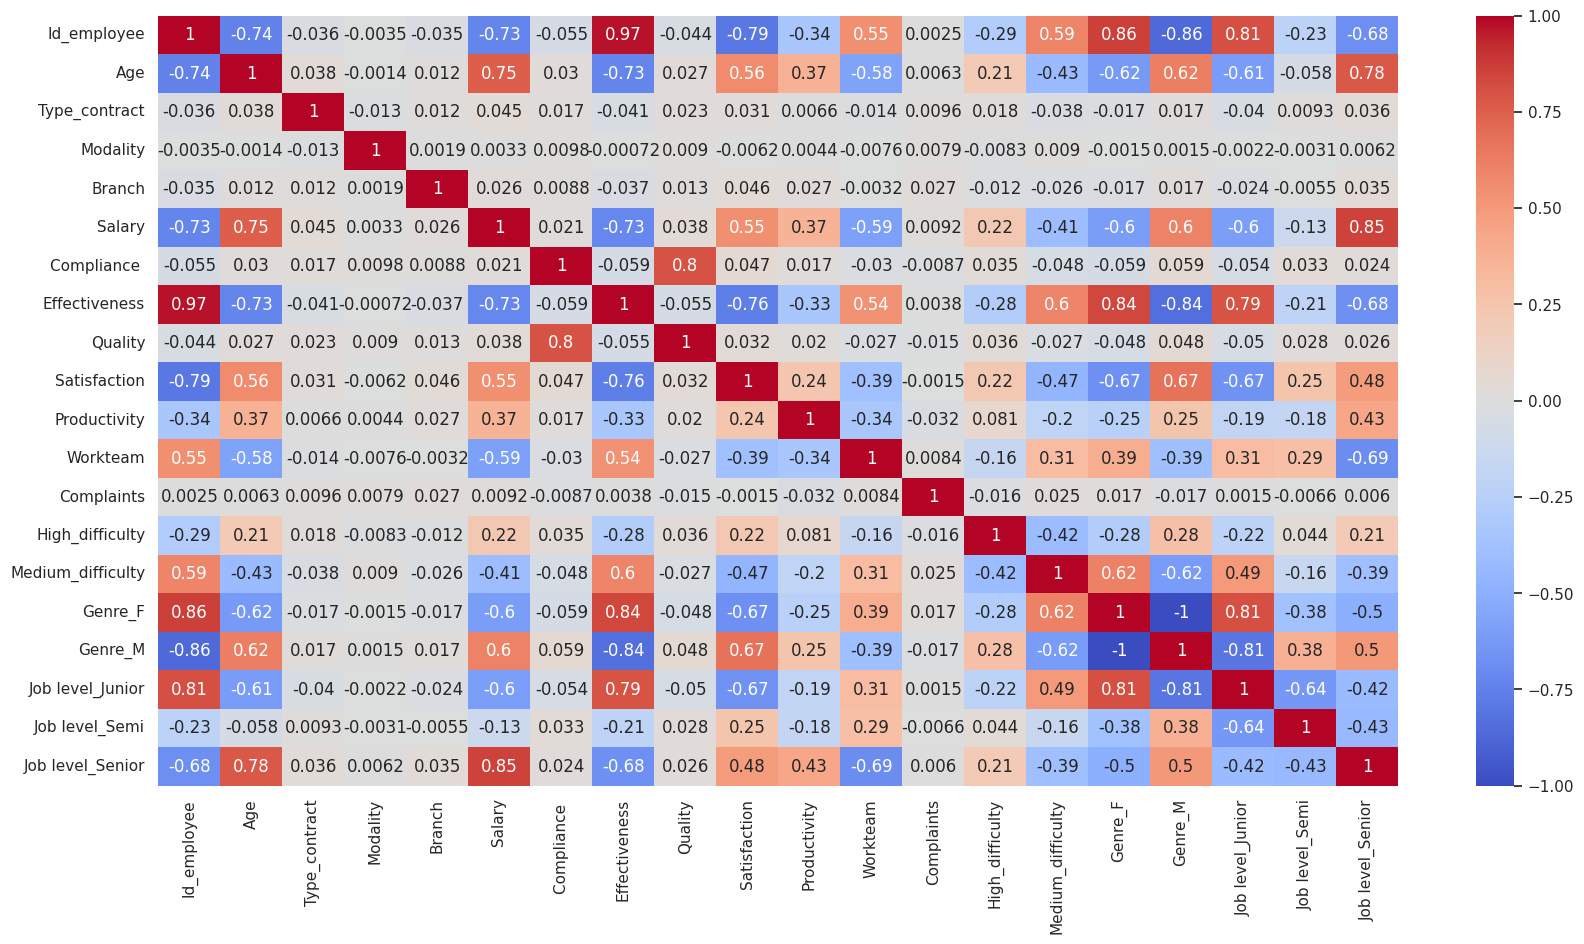

In [212]:
correlation_matrix = Data.corr()
plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

I export the clustered dataset to Excel to have a backup copy of the processed data.


In [213]:
Data.to_excel('DataPrepocessedII.xlsx', index = False)

# 7. Clustering

To reduce the dimensionality of the dataset, I perform principal component analysis (PCA) before performing the clustering.

In [214]:
pca = PCA()
pca.fit(Data)
pca_2 = pca.transform(Data)

I generate the corresponding visualization to see the appropriate number of components to work with

Text(0.5, 1.0, 'PCA')

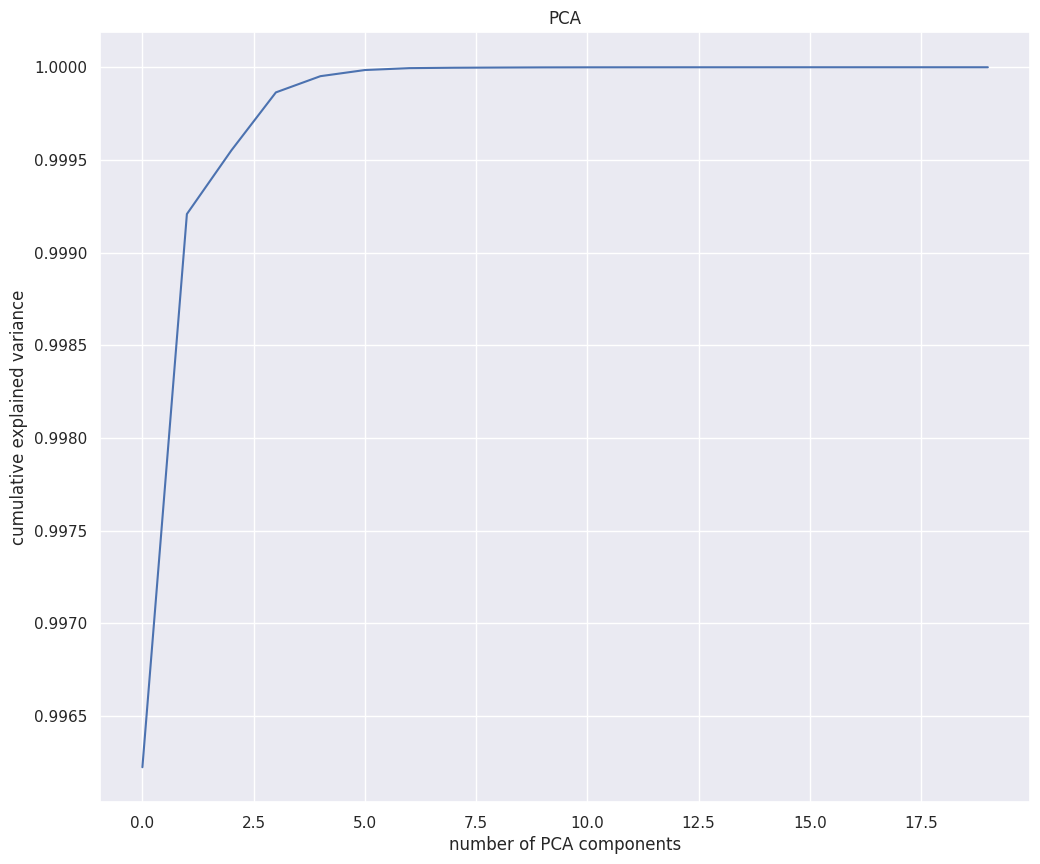

In [215]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of PCA components')
plt.ylabel('cumulative explained variance');
plt.title('PCA')

As a result of the component analysis (PCA), it is defined to use 3 components that represent the consolidated data set.

Next I scale the data to perform PCA with 3 components.

In [216]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(Data)
data_scaled

array([[-1.73111126,  1.5558009 , -0.97905808, ..., -0.78889743,
        -0.8052822 ,  1.86659715],
       [-1.72923166, -0.68317232,  1.02138986, ..., -0.78889743,
        -0.8052822 ,  1.86659715],
       [-1.72735206,  1.5558009 ,  1.02138986, ..., -0.78889743,
        -0.8052822 ,  1.86659715],
       ...,
       [ 1.72735206, -0.68317232,  1.02138986, ...,  1.26759191,
        -0.8052822 , -0.53573424],
       [ 1.72923166, -1.13096697,  1.02138986, ...,  1.26759191,
        -0.8052822 , -0.53573424],
       [ 1.73111126, -1.01901831,  1.02138986, ...,  1.26759191,
        -0.8052822 , -0.53573424]])

In [217]:
pca = PCA(n_components=3)
pca.fit(data_scaled)
data_pca = pca.transform(data_scaled)
df_pca = pd.DataFrame(data=data_pca, columns=['PC1', 'PC2', 'PC3'])

In [218]:
df_pca

PC1       PC2       PC3
0     4.930185 -2.296401  1.544452
1     3.531104 -0.721816 -1.286787
2     3.976553 -1.435488 -2.368620
3     4.117409 -1.534808  0.794824
4     3.926656 -2.203447  2.738541
...        ...       ...       ...
1838 -3.907789 -0.651052  1.207013
1839 -3.413572 -0.803137 -0.415941
1840 -3.418752 -1.114888  2.834084
1841 -3.794664 -1.119203 -0.631585
1842 -3.385574 -1.101410 -0.266608

[1843 rows x 3 columns]

I generate the visualization of the 3 defined components in a 3D graph

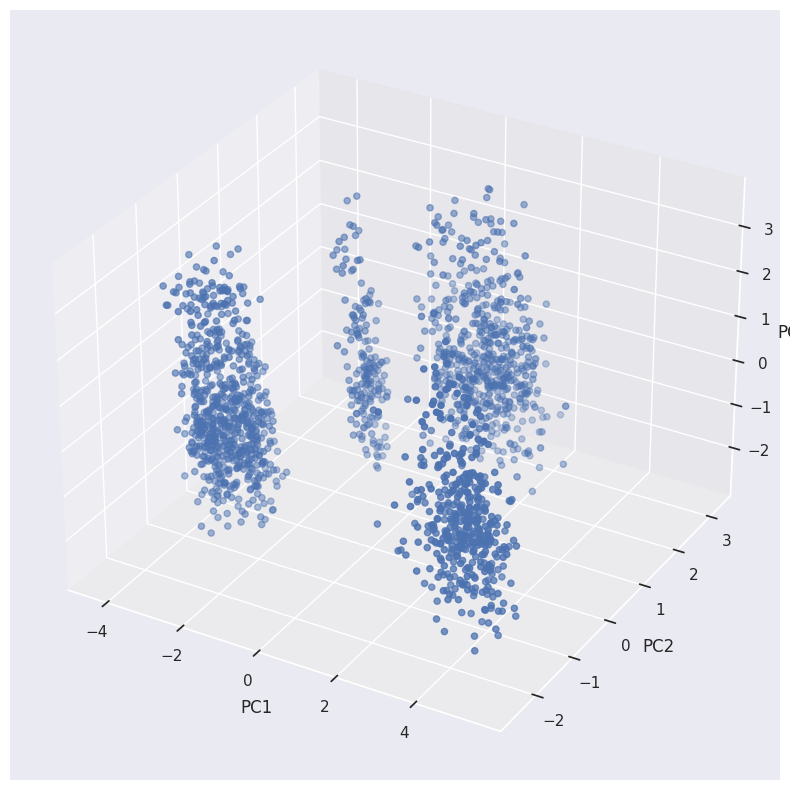

In [219]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_pca['PC1'], df_pca['PC2'], df_pca['PC3'])
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.show()


## Agglomerative hierarchical clustering


I implement agglomerative hierarchical clustering as the first model

I visualize the behavior of the data to be able to fully understand how hierarchical clustering works.

From this point, clustering was performed using the Euclidean distance metric with the “average” method evaluating average dissimilarity.

In [220]:
Z = linkage(df_pca, method="average", metric="euclidean")

In [221]:
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, fcluster
from sklearn.metrics import silhouette_score

# pdist calcula las distancias entre elementos de nuestro dataset usando la
# métrica indicada (euclideana por defecto)
c, coph_dists = cophenet(Z, pdist(df_pca))
print(c)

0.8435524198858766


In [222]:
Z[0]

array([5.86000000e+02, 6.09000000e+02, 1.89115761e-02, 2.00000000e+00])

Vamos a ver las 20 primeras operaciones:

In [223]:
Z[:20]

array([[5.86000000e+02, 6.09000000e+02, 1.89115761e-02, 2.00000000e+00],
       [1.46900000e+03, 1.69100000e+03, 2.67919231e-02, 2.00000000e+00],
       [8.68000000e+02, 8.85000000e+02, 2.90791991e-02, 2.00000000e+00],
       [2.44000000e+02, 4.34000000e+02, 2.95306313e-02, 2.00000000e+00],
       [1.66300000e+03, 1.78300000e+03, 2.95930557e-02, 2.00000000e+00],
       [1.40100000e+03, 1.64400000e+03, 2.99299973e-02, 2.00000000e+00],
       [1.76300000e+03, 1.79900000e+03, 3.25219054e-02, 2.00000000e+00],
       [1.45900000e+03, 1.59900000e+03, 3.35454687e-02, 2.00000000e+00],
       [1.43800000e+03, 1.58300000e+03, 3.38238348e-02, 2.00000000e+00],
       [1.36500000e+03, 1.37800000e+03, 3.40232097e-02, 2.00000000e+00],
       [1.55000000e+03, 1.73600000e+03, 3.58635157e-02, 2.00000000e+00],
       [1.45000000e+02, 3.36000000e+02, 3.64321060e-02, 2.00000000e+00],
       [9.11000000e+02, 9.63000000e+02, 3.65375654e-02, 2.00000000e+00],
       [1.58000000e+03, 1.78900000e+03, 3.70584027e

Let's now look at the dendrogram

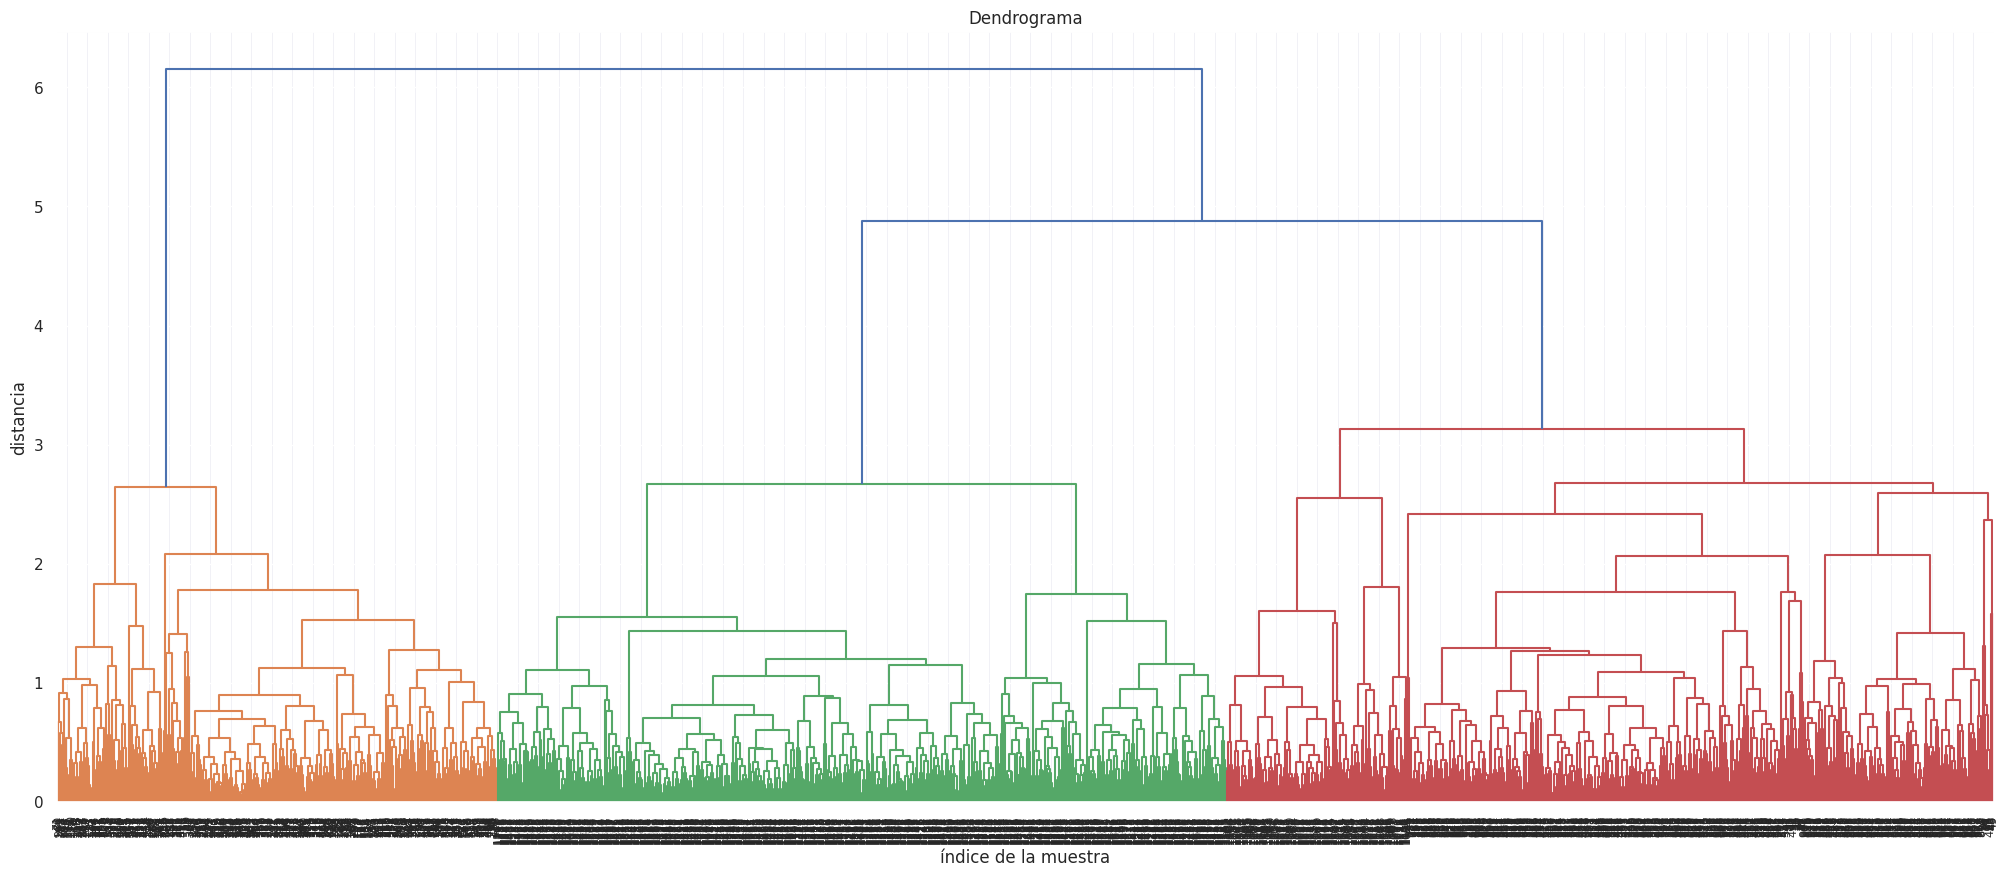

In [224]:
# calculate full dendrogram
plt.figure(figsize=(25, 10))
plt.title('Dendrograma')
plt.xlabel('índice de la muestra')
plt.ylabel('distancia')
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

Summarizing the dendrogram:

Horizontal lines are unions of clusters

The vertical lines indicate which clusters are part of each union.

The heights of the vertical lines indicate the distance that was "covered" when making the union.

Furthermore, the dendrogram allows us to do quite useful things:

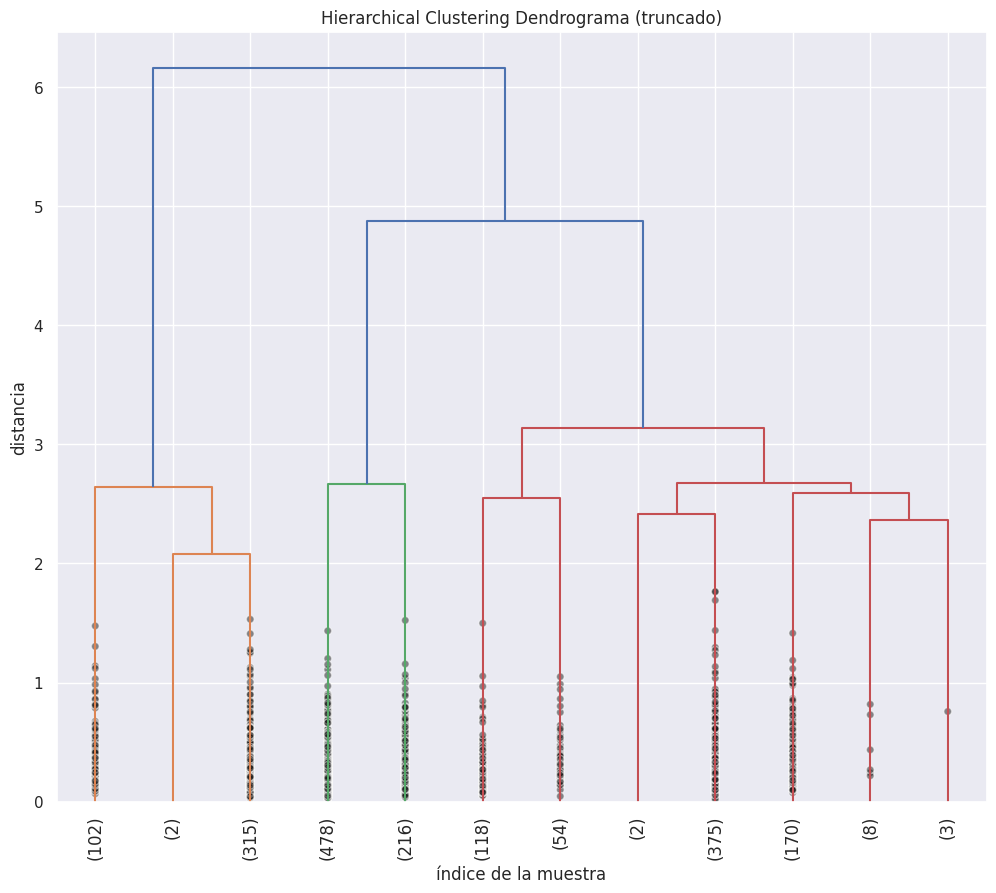

In [225]:
# quedarnos con las últimas p uniones
plt.title('Hierarchical Clustering Dendrograma (truncado)')
plt.xlabel('índice de la muestra')
plt.ylabel('distancia')
dendrogram(
    Z,
    truncate_mode='lastp',  # mostrar solo las últimas p uniones
    p=12,  # definimos p
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.show()

This function calculates the distance between the generated clusters.

In [226]:
def fancy_dendrogram(*args, **kwargs):
    max_d = kwargs.pop('max_d', None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)

    ddata = dendrogram(*args, **kwargs)

    if not kwargs.get('no_plot', False):
        plt.title('Hierarchical Clustering Dendrogram (truncated)')
        plt.xlabel('sample index or (cluster size)')
        plt.ylabel('distance')
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y > annotate_above:
                plt.plot(x, y, 'o', c=c)
                plt.annotate("%.3g" % y, (x, y), xytext=(0, -5),
                             textcoords='offset points',
                             va='top', ha='center')
        if max_d:
            plt.axhline(y=max_d, c='k')
    return ddata

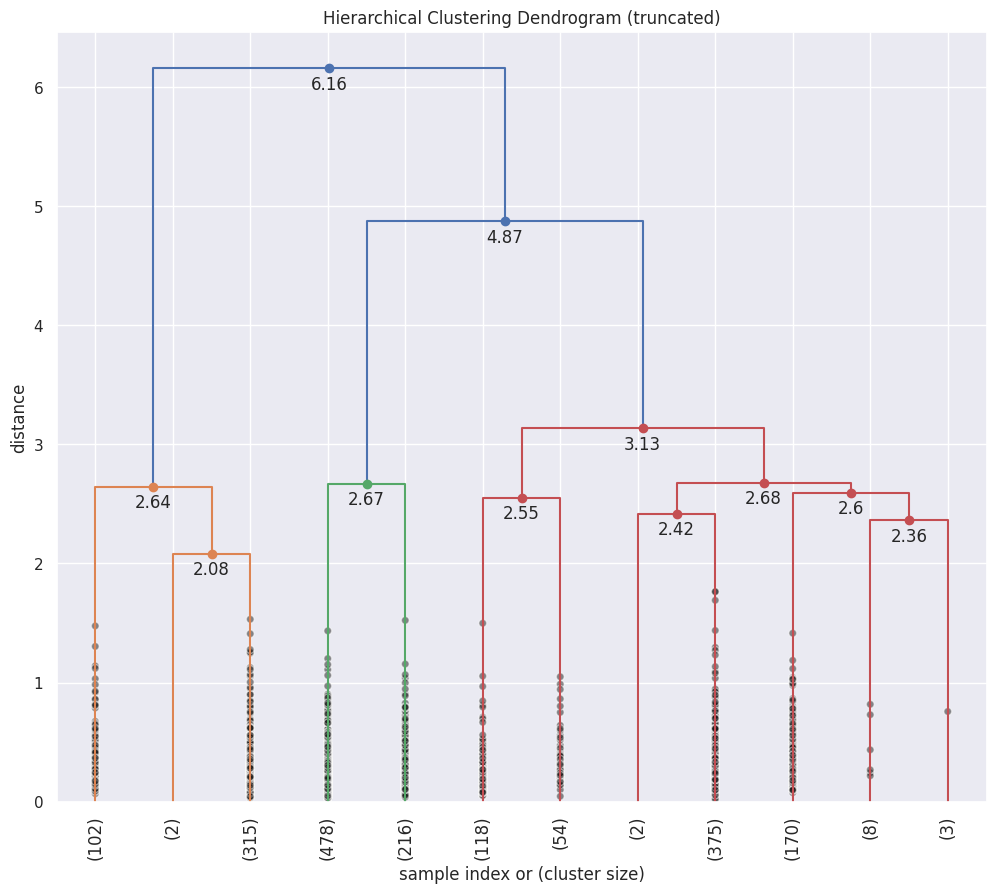

In [227]:
fancy_dendrogram(
    Z,
    truncate_mode='lastp',
    p=12,
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,
    annotate_above=1,  # useful in small plots so annotations don't overlap
)
plt.show()

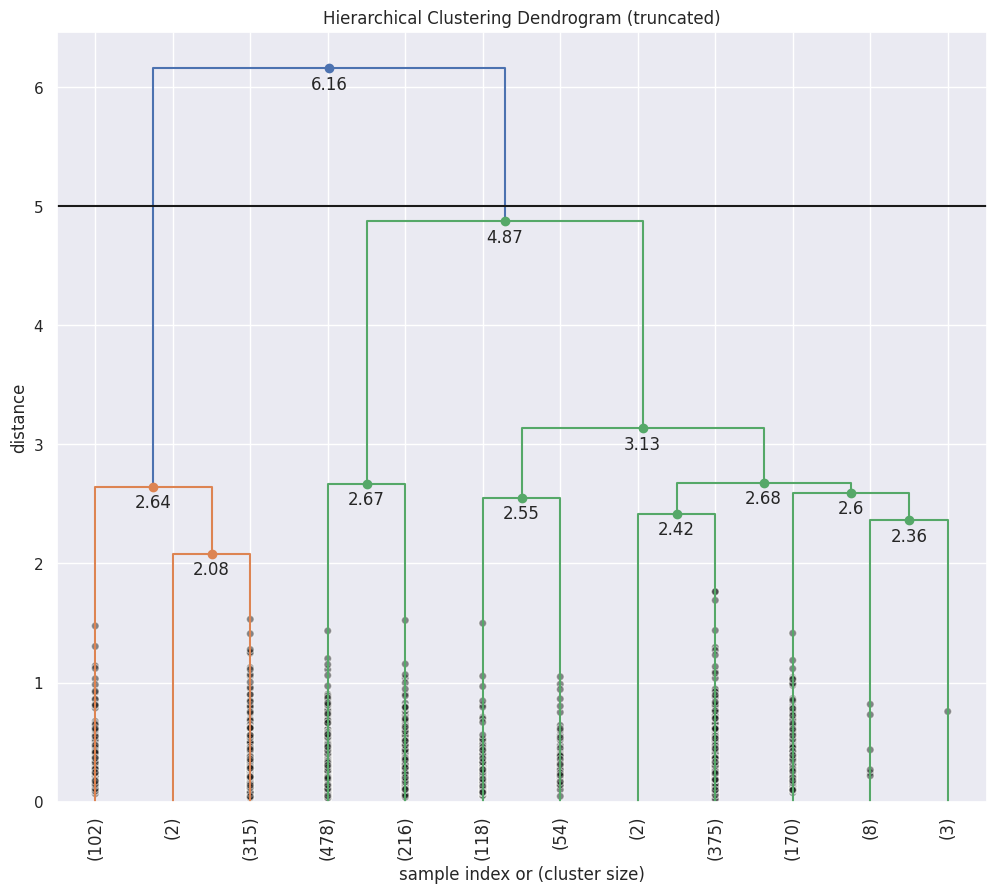

In [228]:
d_max = 5
fancy_dendrogram(
    Z,
    truncate_mode='lastp',
    p=12,
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,
    annotate_above=1,
    max_d=d_max,  # plot a horizontal cut-off line
)
plt.show()

I generate another interesting visualization, which is a "clustermap" of seaborn.

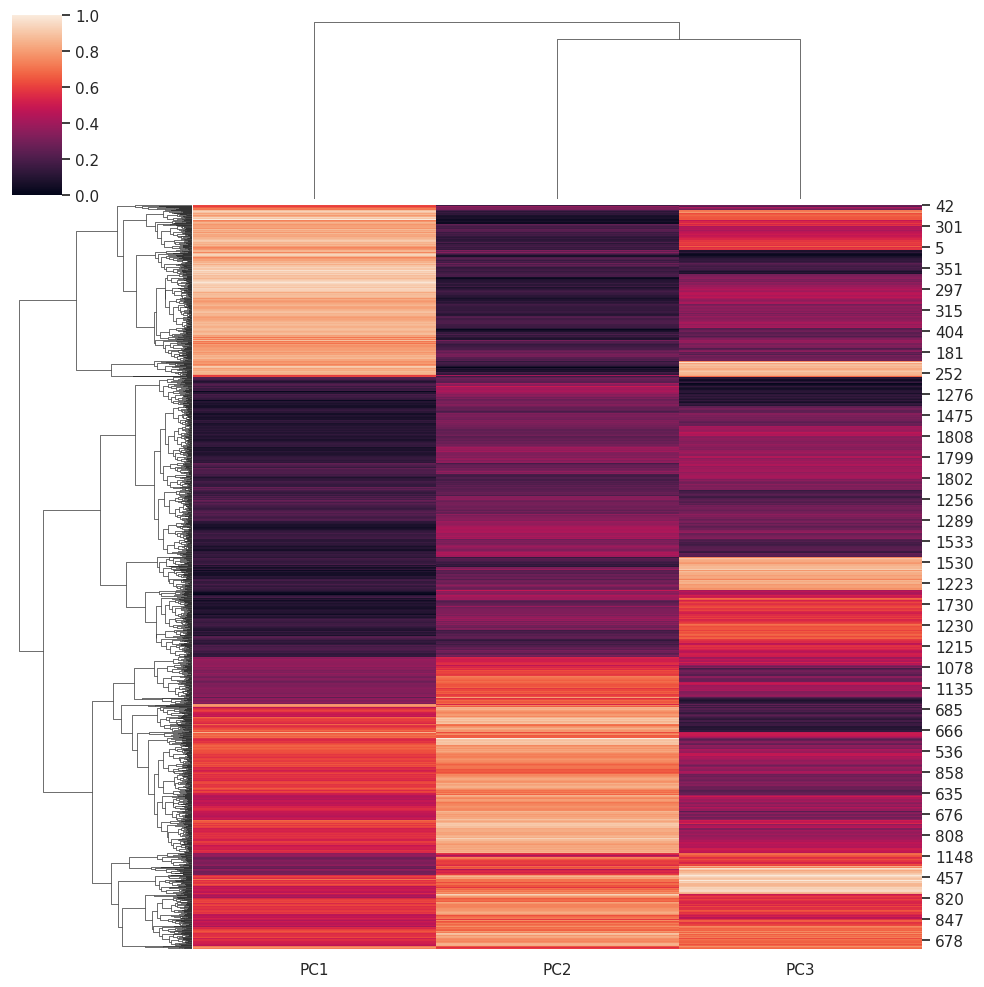

In [229]:
import seaborn as sns
sns.set(color_codes=True)
sns.clustermap(df_pca, standard_scale=1)

To establish which clustering algorithm generated the best results, I use the Silhouette metric to compare quantitatively.


In [230]:
Z = linkage(df_pca, method='average')
cluster_labels = fcluster(Z, 3, criterion='maxclust')
silhouette_avg = silhouette_score(df_pca, cluster_labels)
print("El coeficiente de silueta es silhouette_avg:", silhouette_avg)

El coeficiente de silueta es silhouette_avg: 0.5494577349927826


## K- means

I import the libraries and modules required to work with the data.

In [231]:
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

I cluster the data using the K-means algorithm.

In [232]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(df_pca)
df_pca = pd.DataFrame(data=df_pca, columns=['PC1', 'PC2', 'PC3'])
df_pca['K_Cluster'] = kmeans.labels_
K_cluster_labels = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



I display the result obtained with the assigned parameters.

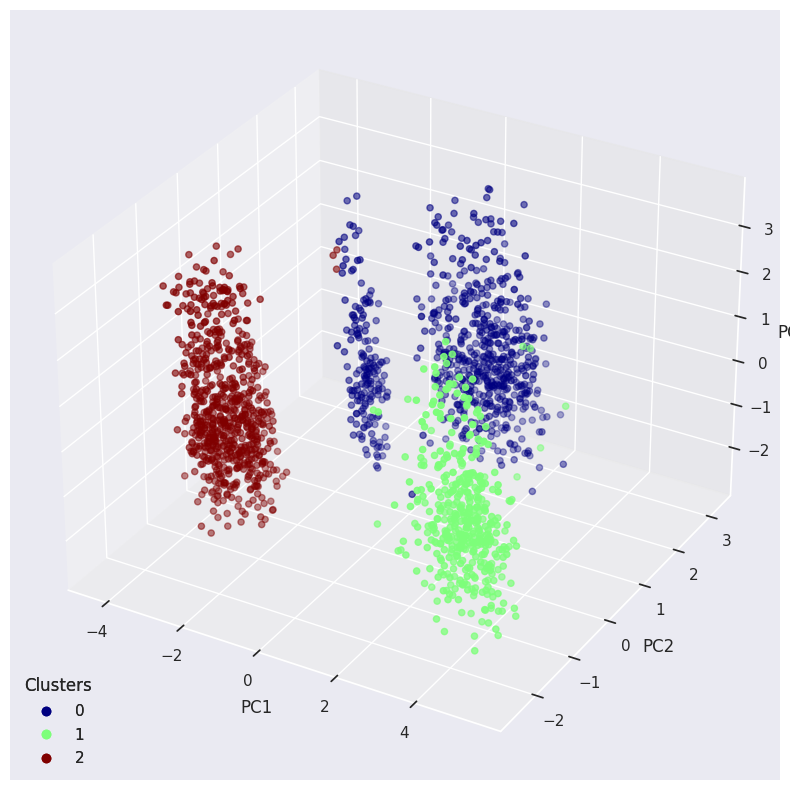

In [233]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(df_pca['PC1'], df_pca['PC2'], df_pca['PC3'], c=df_pca['K_Cluster'], cmap="jet")
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="lower left", title="Clusters")
ax.add_artist(legend1)
plt.show()


The result obtained is not bad but it must be taken into account that the K-means algorithm is designed to work with the Euclidean distance, it does not deal well with data with a high covariance in the data.

To establish which clustering algorithm generated the best results, I use the Silhouette metric to compare quantitatively.

In [234]:
silhouette_avg = silhouette_score(df_pca, K_cluster_labels)
print("El coeficiente de silueta promedio es :", silhouette_avg)

El coeficiente de silueta promedio es : 0.5812225012446055


## DBSCAN

I import the libraries and modules required to work with the data.

In [235]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

I cluster the data using the DBSCAN algorithm

In [236]:
dbscan = DBSCAN (eps= 1.016, min_samples= 5)
dbscan.fit(df_pca[['PC1', 'PC2', 'PC3']])
df_pca['Cluster'] = dbscan.labels_
cluster_labels = dbscan.labels_

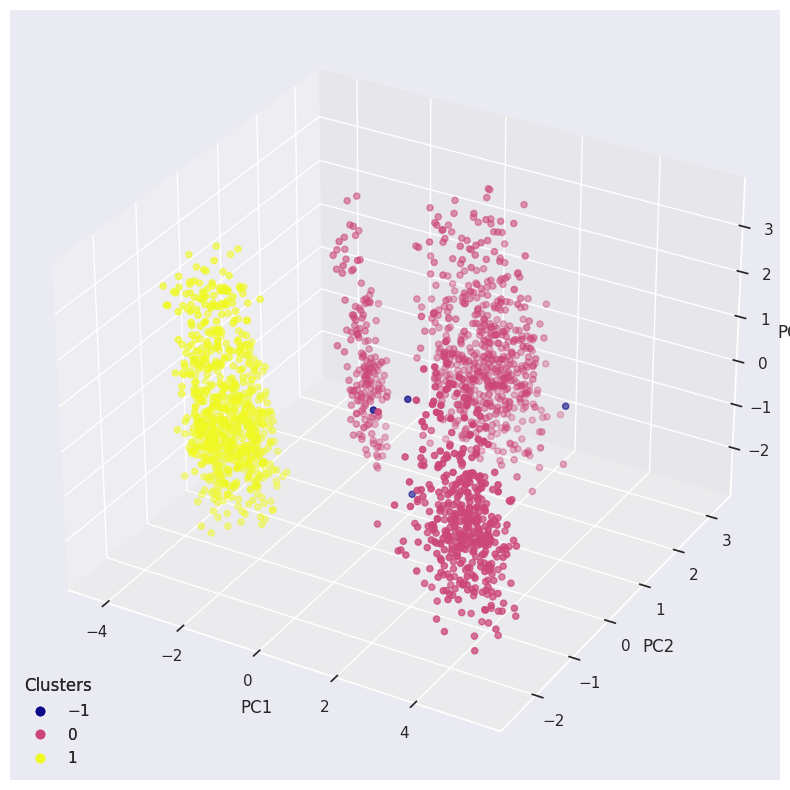

In [237]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(df_pca['PC1'], df_pca['PC2'], df_pca['PC3'], c=df_pca['Cluster'], cmap="plasma")
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="lower left", title="Clusters")
ax.add_artist(legend1)
plt.show()


To establish which clustering algorithm generated the best results, I use the Silhouette metric to compare quantitatively.

In [238]:
silhouette_avg = silhouette_score(df_pca, cluster_labels)
print("El coeficiente de silueta promedio es :", silhouette_avg)

El coeficiente de silueta promedio es : 0.2551051738961985


# 8. Integrate Target into Dataset

I integrate the clustering result as an attribute in the dataset.

In [239]:
Data_clustered = pd.concat([Data, pd.Series(K_cluster_labels, name='cluster_labels')], axis=1)
print(Data_clustered.head())

   Id_employee  Age  Type_contract  Modality  Branch   Salary  Compliance   \
0         1001   45              0         2       2     60.0        18.20   
1         1002   25              1         1       5     36.0        31.75   
2         1003   45              1         0       5     36.0        39.71   
3         1004   38              1         2       3     36.0        23.23   
4         1005   46              0         2       4     36.0         5.41   

   Effectiveness  Quality  Satisfaction  Productivity  Workteam  Complaints  \
0           0.15    10.81          0.85          0.81      0.48          99   
1           0.07    25.45          0.74          0.83      0.69          63   
2           0.14    28.69          0.76          0.74      0.52          66   
3           0.06    13.20          0.75          0.82      0.54          19   
4           0.19     9.44          0.89          0.86      0.50          16   

   High_difficulty  Medium_difficulty  Genre_F  Genre_M 

In [240]:
Data_clustered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1843 entries, 0 to 1842
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Id_employee        1843 non-null   int64  
 1   Age                1843 non-null   int64  
 2   Type_contract      1843 non-null   int64  
 3   Modality           1843 non-null   int64  
 4   Branch             1843 non-null   int64  
 5    Salary            1843 non-null   float64
 6   Compliance         1843 non-null   float64
 7   Effectiveness      1843 non-null   float64
 8   Quality            1843 non-null   float64
 9   Satisfaction       1843 non-null   float64
 10  Productivity       1843 non-null   float64
 11  Workteam           1843 non-null   float64
 12  Complaints         1843 non-null   int64  
 13  High_difficulty    1843 non-null   float64
 14  Medium_difficulty  1843 non-null   float64
 15  Genre_F            1843 non-null   uint8  
 16  Genre_M            1843 

In [241]:
Data_clustered.isnull().mean()*100

Id_employee          0.0
Age                  0.0
Type_contract        0.0
Modality             0.0
Branch               0.0
 Salary              0.0
Compliance           0.0
Effectiveness        0.0
Quality              0.0
Satisfaction         0.0
Productivity         0.0
Workteam             0.0
Complaints           0.0
High_difficulty      0.0
Medium_difficulty    0.0
Genre_F              0.0
Genre_M              0.0
Job level_Junior     0.0
Job level_Semi       0.0
Job level_Senior     0.0
cluster_labels       0.0
dtype: float64

The 'cluster_labels' attribute must be as a numeric type attribute.

In [242]:
Data_clustered['cluster_labels']= Data_clustered['cluster_labels'].astype(int)
Data_clustered

Id_employee  Age  Type_contract  Modality  Branch   Salary  Compliance   \
0            1001   45              0         2       2     60.0        18.20   
1            1002   25              1         1       5     36.0        31.75   
2            1003   45              1         0       5     36.0        39.71   
3            1004   38              1         2       3     36.0        23.23   
4            1005   46              0         2       4     36.0         5.41   
...           ...  ...            ...       ...     ...      ...          ...   
1838         2839   24              1         2       2      9.0        19.07   
1839         2840   29              0         0       3      7.0        24.57   
1840         2841   25              1         0       2     13.0         4.61   
1841         2842   21              1         0       6     13.0        25.53   
1842         2843   22              1         0       3     12.0        22.48   

      Effectiveness  Quality  Satisfaction  Productivity  Workteam  \
0              0.15    10.81          0.85          0.81      0.48   
1              0.07    25.45          0.74          0.83      0.69   
2              0.14    28.69          0.76          0.74      0.52   
3              0.06    13.20          0.75          0.82      0.54   
4              0.19     9.44          0.89          0.86      0.50   
...             ...      ...           ...           ...       ...   
1838           0.96    11.57          0.37          0.39      0.90   
1839           0.91    22.04          0.43          0.46      0.80   
1840           0.95     7.81          0.52          0.26      0.70   
1841           0.99    21.65          0.19          0.87      0.92   
1842           0.98    21.22          0.44          0.55      0.71   

      Complaints  High_difficulty  Medium_difficulty  Genre_F  Genre_M  \
0             99             0.85               0.06        0        1   
1             63             0.57               0.00        0        1   
2             66             0.65               0.11        0        1   
3             19             0.57               0.00        0        1   
4             16             0.55               0.11        0        1   
...          ...              ...                ...      ...      ...   
1838          80             0.58               0.17        1        0   
1839          71             0.58               0.17        1        0   
1840          13             0.58               0.17        1        0   
1841          41             0.58               0.17        1        0   
1842          46             0.58               0.17        1        0   

      Job level_Junior  Job level_Semi  Job level_Senior  cluster_labels  
0                    0               0                 1               1  
1                    0               0                 1               1  
2                    0               0                 1               1  
3                    0               0                 1               1  
4                    0               0                 1               1  
...                ...             ...               ...             ...  
1838                 1               0                 0               2  
1839                 1               0                 0               2  
1840                 1               0                 0               2  
1841                 1               0                 0               2  
1842                 1               0                 0               2  

[1843 rows x 21 columns]

Through this graph, the correlation between the attributes of the dataset with the target attribute was validated, in this case with the “Cluster_labels” attribute.

Text(0.5, 1.0, 'Variables Correlation')

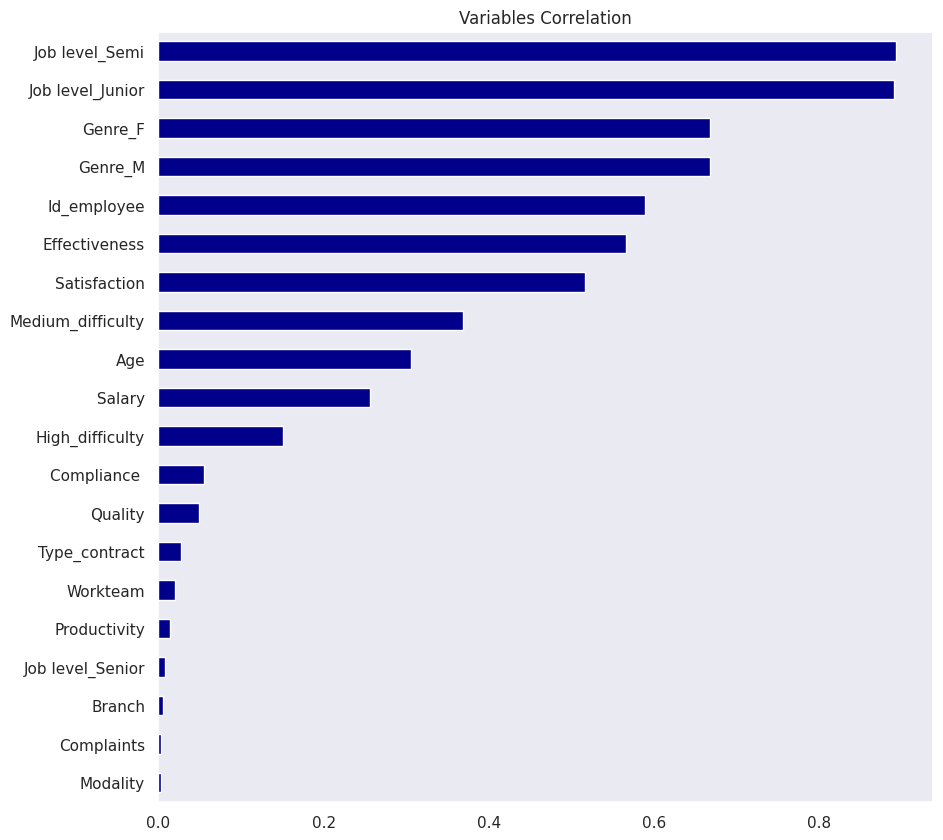

In [243]:
Data_clustered.corr().abs().cluster_labels.drop('cluster_labels').sort_values().plot.barh(color='darkblue',figsize=(10,10))
plt.title('Variables Correlation')

I export the clustered dataset to Excel to have a backup copy of the already clustered data.

In [244]:
Data_clustered.to_excel('DataClustered.xlsx', index = False)

# 9. Classification

## Training and test set partition

We proceed to separate the data set into two parts, one part for training the model called training and another part for evaluating the model called test, with a distribution of 75 - 25 respectively.

In [245]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(
                                        Data_clustered.drop(columns = ["cluster_labels"] ),
                                        Data_clustered["cluster_labels"] ,
                                        test_size=0.25,
                                        random_state = 123)

In [246]:
train_y

1355    2
1145    0
645     0
1142    0
1624    2
       ..
1122    0
1346    2
1406    2
1389    2
1534    2
Name: cluster_labels, Length: 1382, dtype: int64

The indices are reset

In [247]:
train_X.reset_index(drop = True, inplace = True)
test_X.reset_index(drop = True, inplace = True)
train_y.reset_index(drop = True, inplace = True)
test_y.reset_index(drop = True, inplace = True)

## Classification Models


The classification models to be used are imported and declared.

In [248]:
from sklearn.tree import DecisionTreeClassifier   # Árbol de decisión
arbol = DecisionTreeClassifier()


from sklearn.ensemble import RandomForestClassifier   # Random forest
random_forest = RandomForestClassifier()

from sklearn.ensemble import GradientBoostingClassifier  # Gradient Boosting
gradient_boosting = GradientBoostingClassifier()

from sklearn.preprocessing import StandardScaler     # importamos StandardScaler para realizar la estandarización cuando sea necesaria
from sklearn.feature_selection import RFECV, SelectKBest, f_classif  # importanmos RFECV y SeleckBest que los usaré para la selección de variables

from sklearn.linear_model import LogisticRegression
logreg_rfecv = Pipeline(steps=[("scaler",StandardScaler()),
                               ("rfecv",RFECV(estimator=LogisticRegression())),   #Aquí usamos regresión logística usando la selección RFECV
                               ("logreg",LogisticRegression())
                              ]
                       )

from sklearn.neighbors import KNeighborsClassifier
neighbors = Pipeline(steps=[("scaler",StandardScaler()),  # KNeighbors sin realizar selección de variables.
                            ("knn",KNeighborsClassifier())
                          ]
                   )

from sklearn.svm import SVC
svm = Pipeline(steps=[("scaler",StandardScaler()), # Support Vector Machine, kernel es brf por defecto
                      ("svm",SVC())
                     ]
              )

## Hyperparameters

The hyperparameters to use for each model are described.

In [249]:
grid_arbol = {"max_depth":list(range(1,11))}# Profundidades de 1 a 10

In [250]:
grid_random_forest = {"n_estimators": [150],

                     "max_depth": [3,5,10,15,20],

                     "max_features": ["sqrt", 3, 4]}

In [251]:
grid_gradient_boosting = {"loss": ["deviance"],
                          "learning_rate": [0.05, 0.1, 0.5], # Una learning_rate alta
                                                             # junto con n_estimators alta puede dar sobreajuste.

                          "n_estimators": [20,50,100,200], # En GBT un número
                                                           # elevado de árboles puede darnos sobreajuste.

                          "max_depth": [1,2,3,4,5], # En boosting, los árboles utilizados deben tener poca
                                                    # profundidad ya que van rectificandose poco a poco de forma aditiva.

                          "subsample": [1.0, 0.8, 0.5], # Lo usamos para evitar el sobreentrenamiento

                          "max_features": ["sqrt", 3, 4], }

In [252]:
grid_logreg_rfecv = {"rfecv__step": [1],
                     "rfecv__cv": [5],

                     "logreg__penalty": ["l1","l2"], # Regularizaciones L1 y L2 para evitar overfitting.
                     "logreg__C": [0.1, 0.8, 5.0], # Con este parámetro elegimos la fuerza de regulación
                     "logreg__fit_intercept": [True],

                     "logreg__max_iter": [50,100,500],

                     "logreg__solver": ["liblinear"]
                    }

In [253]:
grid_neighbors = {"knn__n_neighbors": [3,5,7,9,11],
                  "knn__weights": ["uniform","distance"]  # Pondera o no las clasificaciones en
                                                          # función de la inversa de la distancia a cada
                                                          # vecino
                  }

In [254]:
grid_svm = {"svm__C": [0.1, 5.0, 50.0],
            "svm__kernel": ["rbf"],
            "svm__gamma": [0.001, 1, 10.0]
           }

## Grid Search y K-Folds



I import the GridSearchCV class from the sklearn.model_selection library, which is used to tune the hyperparameters of a machine learning model by exhaustively searching a grid of hyperparameter values.

In [255]:
from sklearn.model_selection import GridSearchCV

In [256]:
gs_arbol = GridSearchCV(arbol,
                        grid_arbol,
                        cv=10,
                        scoring="f1_micro",
                        verbose=1,
                        n_jobs=-1)

gs_random_forest = GridSearchCV(random_forest,
                                grid_random_forest,
                                cv=10,
                                scoring='f1_micro',
                                verbose=1,
                                n_jobs=-1)

gs_gradient_boosting = GridSearchCV(gradient_boosting,
                                    grid_gradient_boosting,
                                    cv=10,
                                    scoring='f1_micro',
                                    verbose=1,
                                    n_jobs=-1)

gs_logreg_rfecv = GridSearchCV(logreg_rfecv,
                               grid_logreg_rfecv,
                               cv=10,
                               scoring='f1_micro',
                               verbose=1,
                               n_jobs=-1)

gs_neighbors = GridSearchCV(neighbors,
                            grid_neighbors,
                            cv=10,
                            scoring='f1_micro',
                            verbose=1,
                            n_jobs=-1)

gs_svm = GridSearchCV(svm,
                      grid_svm,
                      cv=10,
                      scoring='f1_micro',
                      verbose=1,
                      n_jobs=-1)

In a dictionary I organize the classification models with their respective key

In [257]:
todos_los_grid_searchs = {"gs_arbol":gs_arbol,
                          "gs_random_forest":gs_random_forest,
                        "gs_svm":gs_svm,

}

Through a "for" loop, the models specified in the "all_grid_searchs" dictionary are iterated, taking into account the assigned hyperparameters. Each model fits the training set and returns the best values ​​found.

In [258]:
for nombre, grid_search in todos_los_grid_searchs.items():
    print("Haciendo Grid Search de %s..." % nombre)
    grid_search.fit(train_X, train_y)

Haciendo Grid Search de gs_arbol...
Fitting 10 folds for each of 10 candidates, totalling 100 fits
Haciendo Grid Search de gs_random_forest...
Fitting 10 folds for each of 15 candidates, totalling 150 fits
Haciendo Grid Search de gs_svm...
Fitting 10 folds for each of 9 candidates, totalling 90 fits


A tuple is generated with the classification models and the best result obtained through gridsearch for each model.

In [259]:
mejor_score_de_cada_gridsearch = [(nombre_modelo, grid_search.best_score_) # Generamos una tupla
                                  for nombre_modelo, grid_search           # por cada par clave-valor
                                  in todos_los_grid_searchs.items()]       # del diccionario

The tuple is displayed

In [260]:
mejor_score_de_cada_gridsearch

[('gs_arbol', 0.9927588364091336),
 ('gs_random_forest', 0.994927536231884),
 ('gs_svm', 0.9942028985507246)]

A new dataframe is generated with the tuple data, then the data is ordered and displayed.

In [261]:
mejor_score_de_cada_gridsearch_df = pd.DataFrame(mejor_score_de_cada_gridsearch,
                                                 columns=["GridSearchCV", "Mejor score"])

mejor_score_de_cada_gridsearch_df_ordenado = (mejor_score_de_cada_gridsearch_df
                                              .sort_values(by="Mejor score", ascending=False)
                                             )

mejor_score_de_cada_gridsearch_df_ordenado

GridSearchCV  Mejor score
1  gs_random_forest     0.994928
2            gs_svm     0.994203
0          gs_arbol     0.992759

The dictionary object "all_grid_searchs" corresponding to the Random Forest algorithm is selected and assigned to the variable best_gridsearch_classes.

In [262]:
mejor_gridsearch_clas = todos_los_grid_searchs["gs_random_forest"]

The best estimator is applied to the target "gs_random_forest" to obtain better results

In [263]:
mejor_pipeline = mejor_gridsearch_clas.best_estimator_
mejor_pipeline

RandomForestClassifier(max_depth=5, n_estimators=150)

In [264]:
mejor_pipeline.fit(train_X, train_y)

RandomForestClassifier(max_depth=5, n_estimators=150)

The f1 score metric was used to evaluate the model.

In [265]:
from sklearn.metrics import f1_score
f1_en_test = f1_score(y_true = test_y, y_pred = mejor_pipeline.predict(test_X), average="micro")
print("El modelo tiene un f1 en el conjunto de test de %s" % f1_en_test)

El modelo tiene un f1 en el conjunto de test de 0.9956616052060737


The Acuraccy metric was used to evaluate the model.

In [266]:
from sklearn.metrics import accuracy_score
accuracy_en_test = accuracy_score(y_true = test_y,y_pred = mejor_pipeline.predict(test_X))
print("El modelo tiene un accuracy en el conjunto de test de %s" % accuracy_en_test)

El modelo tiene un accuracy en el conjunto de test de 0.9956616052060737


The confusion matrix was built for the selected model with the best result obtained according to the gridsearch.

In [267]:
from sklearn.metrics import confusion_matrix
matriz_confusion = confusion_matrix(y_true = test_y,
                                    y_pred = mejor_pipeline.predict(test_X)
                                   )
matriz_confusion

array([[165,   0,   0],
       [  1, 111,   0],
       [  1,   0, 183]])

In [268]:
matriz_confusion_df = pd.DataFrame(matriz_confusion)

# Y nombramos lo que son las columnas y las filas:
matriz_confusion_df.columns.name = "Foretold"
matriz_confusion_df.index.name = "Actual"
matriz_confusion_df

Foretold    0    1    2
Actual                 
0         165    0    0
1           1  111    0
2           1    0  183

The confusion matrix graph is generated

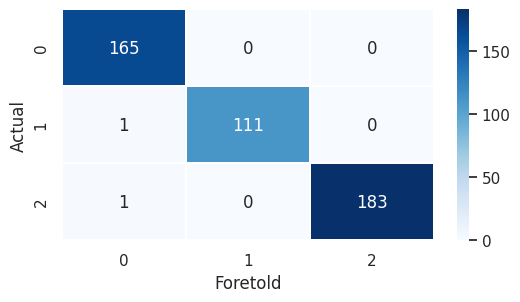

In [269]:
plt.figure(figsize=(6,3))
sns.heatmap(matriz_confusion_df,
            annot=True,
            cmap="Blues",linewidths=.10, fmt= '.0f')
pass